<img src="Ser-SAM.jpg" width="700" height="500" align="center"/>

## A Tool for Estimating Photovoltaic Performance Under Arbitrary Illumination Conditions
<br/><br/>
_Austin M. Kay$^{\text{1}}$, Maura Fitzsimons$^{\text{1}}$, Gregory Burwell$^{\text{1}}$, Paul Meredith$^{\text{1}}$, Ardalan Armin$^{\text{1}}$, & Oskar J. Sandberg$^{\text{1}}$_

$^{\text{1}}$Sustainable Advanced Materials (Sêr-SAM), Department of Physics, Swansea University, Singleton Park, Swansea SA2 8PP, United Kingdom

__Email__: (A. M. Kay) 954708@swansea.ac.uk; o.j.sandberg@swansea.ac.uk; ardalan.armin@swansea.ac.uk;
<br/><br/>
### Synopsis
<br/><br/>
This computational tool was created to estimate the performance of a photovoltaic devices under arbitrary illumination conditions. It was used to support the results of _The Thermodynamic Limit of Indoor Photovoltaics Based on Energetically-Disordered Molecular Semiconductors_ by the Authors, available at https://doi.org/10.1002/solr.202300277. The default spectra that the tool has been made with are the 'warm white' 2700K LED, the 'cool white' 4000K LED, the CIE Standard Illuminant LED-B4, and the standard AM1.5G spectrum for sunlight. Additional specta can be added as new sheets in the "Spectra.xlsx" Excel file. The tool can be used to estimate performance using either a simulated photovoltaic external quantum efficiency ($\mathrm{EQE}_\mathrm{PV}$) spectrum (including step functions, sub-gap Urbach tails, and detailed models for organic semiconductor absorption), or an experimentally-determined $\mathrm{EQE}_\mathrm{PV}$ spectrum (which must be saved in an Excel file in the "EQE_Spectra" folder); the latter will give a realistic estimate for the photovoltaic performance of real devices.
<br/><br/>
&emsp;&emsp;&emsp;&emsp; Two types of simulation can be performed with this tool: (i) figures-of-merit versus the optical gap, and (ii) figures-of-merit versus the intensity of the incident light. For both simulated and experimental $\mathrm{EQE}_\mathrm{PV}$, non-radiative open-circuit voltage losses can be included in the simulations using different models, including an emprical model contributed by Maura Fitzsimons. These losses are explored further in the manuscript this computational tool accompanies.
<br/><br/>
&emsp;&emsp;&emsp;&emsp; The following content may be broken into four main sections, followed by the user interface. Firstly, the theoretical background supporting the tool is outlined (alongside the functions that implement it) in [Section 1](#Theoretical_Background). Following this, in [Section 2](#Loading_Spectra), the irradiance spectra are loaded into the script and converted to photon flux spectra. Next, in [Section 3](#Making_Interface), the widgets needed to create the User Interface are defined, linked, and compiled. Following this, in [Section 4](#Support), additional tools used to support the code's operation are defined, including an interpolating function. Finally, in [Section 5](#Interface), the user interface is presented; __to quickly load and use the user interface, select "Cell $\to$ Run All" from the top of the screen__.
<br/><br/>
&emsp;&emsp;&emsp;&emsp; While every care has been taken to ensure no faults or bugs are present in this tool, we would like to correct any issues users may have - please report these to (A.M. Kay) 954708@swansea.ac.uk. The most up-to-date version of this tool (and its manual) will always be available at https://github.com/Austin-M-Kay.

<a id="Table_of_Contents"></a>
### Table of Contents
[1. Theoretical Background](#Theoretical_Background)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.1. Short-Circuit Current Density](#J_sc)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.2. Dark Saturation Current Density](#J_0)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.3. Open-Circuit Voltage](#V_oc)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.4. Fill Factor](#FF)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.5. Power Conversion Efficiency](#PCE)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.6. Lux Calculation](#Lux_Calculation)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.7. Band Filling](#BF_Theory)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [1.8. Bibliography](#Bibliography)
<br/><br/>
[2. Loading in Spectra](#Loading_Spectra)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [2.1. Creating a Pandas Data Frame](#Storing_Spectra)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [2.2. Determining Photon Flux](#Determining_Flux)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [2.3. Determining Total Light Power and Lux](#Determining_Lux)
<br/><br/>
[3. Prerequisites for a User Interface](#Making_Interface)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [3.1. EQE Spectrum Loading Tool](#EQE_Loader)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.1.1. Determinining EQE Spectra File Paths](#Determining_File_Paths)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.1.2. EQE Spectrum Selection Widgets](#Select_Spectrum)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.1.3. Data Customisation Widgets](#Data_Customisation)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.1.4. Data Storing Functions](#Data_Storing)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [3.2. Spectral Tailoring](#Lux_Customisation)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.2.1. Widgets for Superimposing Spectra](#Superimposing_Spectra)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [3.2.2. Widgets for Customising Light Intensity](#Customising_Intensity)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [3.3. Data Analyser](#Data_Analyser)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [3.4. One-Sun Figures-of-Merit Calculator](#One_Sun_Funcs)
<br/><br/>
[4. Supporting Python Tools](#Support)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.1. Interpolator](#Interpolator)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.2. Non-Radiative Loss Estimation](#NR_Loss_Estimation)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.2.1. Non-Radiative Loss Using Prior Models](#Fitting_NR_Loss_Estimation)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.2.2. Non-Radiative Loss Using Parabolic Model](#Fitting_NR_Loss_Estimation_Parabola)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.3. Graph Lables](#Curve_Labels)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.4. Data Compiler](#Data_Compiler)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.5. Sub-Gap Photovoltaic Quantum Efficiency Simulator](#EQE_Simulator)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.5.1. Step Function Photovoltaic Quantum Efficiency Simulator](#SQ_EQE_Simulator)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.5.2. Urbach Tail Photovoltaic Quantum Efficiency Simulator](#Urbach_EQE_Simulator)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.5.3. Organic Semiconductor Photovoltaic Quantum Efficiency Simulator](#SE_EQE_Simulator)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.6. Data Saving and Copying Tools](#Data_Saving)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.6.1. Saving Data for Optical Gap-Dependent Simulations](#E_opt_Data_Saving)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.6.2. Saving Data for Intensity-Dependent Simulations](#I_Data_Saving)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.6.3. Copying Data for Optical Gap-Dependent Simulations](#E_opt_Data_Copying)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.6.4. Copying Data for Intensity-Dependent Simulations](#I_Data_Copying)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [4.7. Control Functions](#ControlFunctions)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.7.1. Controlling in the Simulated EQE Case](#ControlFunctionSimEQE)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.7.2. Controlling in the Experimental EQE Case](#ControlFunctionExpEQE)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [4.7.3. Spectrum Analysing Tab Generator](#Spectrum_Analysing_Tab_Maker)
<br/><br/>
[5. The User Interface](#Interface)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.1. Simulated EQE Interface](#PCE_Interface)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [5.1.1. Overall Inputs](#Overall_Inputs)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [5.1.2. Power Conversion Efficiency-Simulating Interface for Varied Optical Gaps](#PCE_Interface_E_opt)
<br/><br/>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; [5.1.2. Power Conversion Efficiency-Simulating Interface for Varied Irradiances](#PCE_Interface_I_light)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.2. EQE-Spectrum Analysing Interface](#EQE_Analysing_Interface)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.3. Bulk Analysis Interface](#Bulk_Analysis_Interface)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.4. Band Filling Control](#BF)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.5. Compiling Components of the User Interface](#Compiling_UI)
<br/><br/>
&emsp;&emsp;&emsp;&emsp; [5.6. The Interface](#The_Actual_Interface)

<a id="Theoretical_Background"></a>
## 1. Theoretical Background
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In the following section, the theoretical background is interwoven with accompanying Python functions, ultimately culminating in the calculation of the power conversion efficiency, $\mathrm{PCE}$. 
<a id="J_sc"></a>
### 1.1. Short-Circuit Current Density
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
To begin, the short-circuit current density, $J_\mathrm{sc}$ is defined as [[1](#Ref_Nelson),[2](#Ref_Wurfel)]
<br/><br/>
<a id="J_sc_equation"></a>
$$\tag{1}
J_\mathrm{sc} = q\int_0^\infty \mathrm{EQE}_\mathrm{PV}(E)\cdot\it{\Phi}_\mathrm{source}(E)\,\mathrm{d}E,
$$
<br/><br/>
where $q$ is the elementary charge, $\mathrm{EQE}_\mathrm{PV}(E)$ is the photovoltaic external quantum efficiency (the ratio of free charge carriers out to the number of photons in) at a given photon energy $E$, and $\it{\Phi}_\mathrm{source}(E)$ is the spectral photon flux of the incident light. To implement this equation into the code, the following Python function is defined for evaluating the short-circuit current density. This function utilises an in-built funtion from the SciPy library, "simps", which evaluates an integral numerically using Simpson's rule.
<br/><br/>

In [1]:
from scipy.integrate import simps

<br/><br/>
Furthermore, the elmentary charge of the electron $q$ is imported from the SciPy library using:
<br/><br/>

In [2]:
from scipy.constants import e

<br/><br/>
These components are combined to define the following function for evaluating the short-circuit current density - the input parameters for this function are a series of wavelengths, the corresponding $\mathrm{EQE}_\mathrm{PV}$ values, and the corresponding photon fluxes. The latter two are expected to be provided at the same wavelengths, whether that be measured or interpolated. 
<br/><br/>

In [3]:
def Short_Circuit_Current_Density_Calaculator( Wavelengths , EQEs , Photon_Fluxes ):

    """This function calculates the short-circuit current density using an EQE_PV spectrum (unitless), its wavelengths (in
    
    nm), and the spectral photon flux of the incident light (in units of mW/cm2/nm). The dimension of each input should be 
    
    the same; i.e., the photon flux and EQE_PV should be provided at the same wavelengths. These quantities are also
    
    expected to be stored in NumPy arrays, such that their product may readily be taken. If this is not the case, and lists 
    
    or tuples are give, this function will convert the lists or tuples to NumPy arrays."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Data Type of Input Data
    #-----------------------------------------------------------------------------------------------------------------------
    
    Wavelengths_Type = type( Wavelengths ).__name__ 
    
    EQE_Type = type( EQEs ).__name__ 
    
    Flux_Type = type( Photon_Fluxes ).__name__ 
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Correct Data Type If Need Be
    #-----------------------------------------------------------------------------------------------------------------------

    if Wavelengths_Type == 'list' or EQE_Type == 'list' or Flux_Type == 'list':
           
        Wavelengths = array( Wavelengths )
        
        EQEs = array( EQEs )
        
        Photon_Fluxes = array( Photon_Fluxes )
            
    if Wavelengths_Type == 'tuple' or EQE_Type == 'tuple' or Flux_Type == 'tuple':
           
        Wavelengths = array( Wavelengths )
        
        EQEs = array( EQEs )
        
        Photon_Fluxes = array( Photon_Fluxes )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Evaluate Short-Circuit Current Density and Return Value
    #-----------------------------------------------------------------------------------------------------------------------
    
    return e * simps( y = EQEs * Photon_Fluxes , x = Wavelengths )

<a id="J_0"></a>
### 1.2. Dark Saturation Current Density
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The dark saturation current density (in the radiative limit), $J_0^\mathrm{rad}$, holds a very similar definition to the short-circuit current density,
<br/><br/>
<a id="J_0_equation"></a>
$$\tag{2}
J_0^\mathrm{rad} = q\int_0^\infty \mathrm{EQE}_\mathrm{PV}(E)\cdot\it{\Phi}_\mathrm{bb}(E)\,\mathrm{d}E,
$$
<br/><br/>
where the Planck black-body radiation spectrum (i.e., the number of unpolarised photons radiated per unit area per unit time per energy interval into a hemispherical solid angle) is given by
<br/><br/>
<a id="Planck"></a>
\begin{equation}\tag{3}
\it{\Phi_{\mathrm{bb}}}(E) = \frac{2\pi}{h^3c^2}\frac{E^2}{\exp\left(\frac{E}{k_\mathrm{B}T}\right) - 1}.
\end{equation}
<br/><br/>
where $h$ is the Planck constant, $k_\mathrm{B}$ is the Boltzmann constant, $T$ is the temperature, and the Bose-Einstein distribution has been approximated as the Maxwell-Boltzmann approximation to obtain the right-hand side (valid for $E>3k_\mathrm{B}T$). As the spectra are usually provided in terms of photon wavelength rather than energy, it is useful to instead define the spectral photon flux density as
<br/><br/>
<a id="Planck2"></a>
$$\tag{4}
\it{\Phi}_\mathrm{Planck}(\lambda)\,\mathrm{d}\lambda = \Phi_\mathrm{Planck}(E)\,\mathrm{d}E=\Phi_\mathrm{Planck}(E)\,\left|\frac{\mathrm{d}E}{\mathrm{d}\lambda}\right|\mathrm{d}\lambda.
$$
<br/><br/>
Then, as $E=\frac{hc}{\lambda}\Rightarrow |d_\lambda E|=\frac{hc}{\lambda^2}$, Equation ([4](#Planck2)) gives
<br/><br/>
<a id="Planck3"></a>
$$\tag{5}
\it{\Phi}_\mathrm{Planck}(\lambda) =\frac{2\pi c}{\lambda^4}\frac{1}{\exp\left(\frac{hc}{\lambda k_\mathrm{B}T}\right)-1}.
$$
<br/><br/>
Both forms of the Planck spectrum are implemented into the code through the following functions:
<br/><br/>

In [4]:
from numpy import *
from scipy.constants import e, h, c, k

def Planck_Photon_Flux_Energy( Photon_Energy , Temperature ):
    
    """At a given photon energy (in eV) and temperature (in K), determine the photon flux as defined by the Planck spectrum
    
    in the limit that the Maxwell-Boltzmann approximation is valid. Give this flux in units of milli-#photons/cm2/s/ev."""
    
    Pre_Factor = 2 * pi * ( e * Photon_Energy ) ** 2 / h ** 3 / c ** 2  # Units are #photons/m2/s/J
    
    Pre_Factor = Pre_Factor * 1e-4 / e # Convert to units of #photons/cm2/s/eV
    
    return 1e3 * Pre_Factor / ( exp( e * Photon_Energy / k / Temperature ) - 1 )

def Planck_Photon_Flux_Wavelength( Wavelength , Temperature ):
    
    """At a given photon wavelength (in nm) and temperature (in K), determine the photon flux as defined by the Planck 
    
    spectrum in the limit that the Maxwell-Boltzmann approximation is valid. Give this flux in units of 
    
    milli-#photons/cm2/s/nm."""
    
    Pre_Factor = 2 * pi * c / (1e-9 * Wavelength ) ** 4 * 1e-4 * 1e-9
        
    return 1e3 * Pre_Factor / ( exp( h * c / ( 1e-9 * Wavelength * k * Temperature  ) ) - 1 )

<br/><br/>
Using these functions for the Planck black-body flux, the photon flux can be determined at a given temperature and wavelength/energy. Using these values, the dark saturation current in the radiative limit can be determined using the following function:
<br/><br/>

In [5]:
def Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( Wavelengths , EQE_Spectrum , Photon_Flux_Spectrum ):

    """Compute the dark saturation current density (in mA/cm2) using the wavelengths (in nm) that the input EQE_PV spectrum 
    
    (unitless) and with the input photon flux spectrum (in units of mW/cm2/nm) are given at. The EQE spectrum and the photon
    
    flux spectrum are expected to already be interpolated, such that the values are given at the same points. They are also
    
    expected to be stored in NumPy arrays, such that their product may readily be taken."""
        
    # SciPy's in-built function "simps" has been used to numerically integrating x and y data using Simpson's Rule
    
    return e * simps( y = EQE_Spectrum * Photon_Flux_Spectrum , x = Wavelengths )

<br/><br/>
The dark saturation in the non-radiative limit is given by $J_0 = \frac{J_0^\mathrm{rad}}{\mathrm{EQE}_\mathrm{EL}}$, where the electroluminscent external quantum efficiency, $\mathrm{EQE}_\mathrm{EL}$, relates to the non-radiative open-circuit voltage loss, $\Delta V_\mathrm{oc}^\mathrm{nr}$, via $\mathrm{EQE}_\mathrm{EL}=\exp\left(-\frac{q\Delta V_\mathrm{oc}^\mathrm{nr}}{k_\mathrm{B}T}\right)$. The dark saturation current is evaluated using the following function:
<br/><br/>

In [6]:
def Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_rad , Delta_V_oc_nr , Temperature ):

    """Determine the dark saturation current density using dark saturation current in the radiaitive limit, the temperature,
    
    and the non-radiative open circuit voltage loss."""
            
    return J_0_rad * exp( e * Delta_V_oc_nr / k / Temperature )

<a id="V_oc"></a>
### 1.3. Open-Circuit Voltage
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
To express the open circuit voltage $V_\mathrm{oc}$ in terms of the current densities, the ideal diode equation is first assumed (with ideal factor $m=1$). This gives the total current density for a solar cell under illumination $J_\mathrm{light}$ as [[1](#Ref_Nelson)]
<br/><br/>
<a id="ideal"></a>
$$\tag{6}
J_\mathrm{light}(V_\mathrm{app})=J_0\left[\exp\left(\frac{qV_\mathrm{app}}{k_\mathrm{B}T}\right)-1\right]-J_\mathrm{sc}.
$$
<br/><br/>
Here, $V_\mathrm{app}$ is the applied voltage, the short circuit current density is defined in Equation ([1](#J_sc_equation)), and the dark saturation current is defined in Equation ([2](#J_0_equation)). A function for determining the total current density using this equation is defined as:
<br/><br/>

In [7]:
def Total_Current_Density( Applied_Voltage , Dark_Saturation_Current , Short_Circuit_Current , Temperature ):
    
    """Calculate the total current density using the dark saturation current density, the short-circuit current density,
    
    the open-circuit voltage, the temperature, and the constants e and k, being the elementary charge and the Boltzmann 
    
    constant, resepectively."""
    
    return Dark_Saturation_Current * ( exp( e * Applied_Voltage / k / Temperature ) - 1 ) - Short_Circuit_Current

Under open-circuit conditions where $V_\mathrm{app}=V_\mathrm{oc}$, there is no net current generated by the diode ($J_\mathrm{light}=0$). Consequently,
<br/><br/>
<a id="open_circuit"></a>
$$\tag{7}
V_\mathrm{oc}=\frac{k_\mathrm{B}T}{q}\ln\left[\frac{J_\mathrm{sc}}{J_0}+1\right].
$$
<br/><br/>
The following function is used by the script to calculate the open-circuit voltage:
<br/><br/>

In [8]:
def Open_Circuit_Voltage( Short_Circuit_Current , Dark_Saturation_Current , Temperature ):
    
    """Determine the open-circuit voltage under the assumption of an ideal diode. The units of the input current densities
    
    aren't important, they just need to be the same such that their ratio is unitless. The temperature should be in 
    
    Kelvin."""
    
    return k * Temperature / e * log( Short_Circuit_Current / Dark_Saturation_Current + 1 )

<br/><br/>
As stated above, non-radiative open-circuit voltage losses ($\Delta V_\mathrm{oc}^\mathrm{nr}$) may be accounted for using the electroluminescent quantum efficiency
<br/><br/>
<a id="nr_loss"></a>
$$\tag{8}
V_\mathrm{oc}=\frac{k_\mathrm{B}T}{q}\ln\left[\frac{J_\mathrm{sc}}{J_0^\mathrm{rad}}\mathrm{EQE}_{\mathrm{EL}}+1\right],
$$
<br/><br/>
where $\mathrm{EQE}_\mathrm{EL}=\exp\left(-\frac{q\Delta V_\mathrm{oc}^\mathrm{nr}}{k_\mathrm{B}T}\right)$.
<br/><br/>

<a id="FF"></a>
### 1.4. Fill Factor
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The fill factor $\mathrm{FF}$ is defined as the ratio of the power generated at the maximum power point to the maximum power that could be generated [[2](#Ref_Wurfel)],
<br/><br/>
<a id="FF_eq"></a>
$$\tag{9}
\mathrm{FF}=\frac{J_\mathrm{mpp}V_\mathrm{mpp}}{J_\mathrm{sc}V_\mathrm{oc}}.
$$
<br/><br/>
Here $J_\mathrm{mpp}$ is the current density at the maximum power point (mpp), where the applied voltage is $V_\mathrm{mpp}$. This maximum power point is situated at the stationary point that satisfies
<br/><br/>
<a id="mpp_def"></a>
$$\tag{10}
\left.\frac{\partial P}{\partial V_\mathrm{app}}\right|_{V=V_\mathrm{mpp}} = \left.\frac{\partial(J_\mathrm{light} V_\mathrm{app}) }{\partial V_\mathrm{app}}\right|_{V=V_\mathrm{mpp}} = J_\mathrm{light}(V_\mathrm{mpp}) + \frac{qV_\mathrm{mpp}}{k_\mathrm{B}T} J_0 \exp\left( \frac{qV_\mathrm{mpp}}{k_\mathrm{B}T}\right) = 0.
$$
<br/><br/>
Collecting terms and rearranging gives
<br/><br/>
<a id="V_mpp"></a>
$$\tag{11}
\left(1+\frac{qV_\mathrm{mpp}}{k_\mathrm{B}T}\right)\exp\left( \frac{qV_\mathrm{mpp}}{k_\mathrm{B}T}\right)=\frac{J_\mathrm{sc}}{J_0}+1.
$$
<br/><br/>
Making use of the definition of the open-circuit voltage gives:
<br/><br/>
<a id="V_mpp2"></a>
$$\tag{12}
\left(1+\frac{qV_\mathrm{mpp}}{k_\mathrm{B}T}\right)\exp\left(1+\frac{qV_\mathrm{mpp}}{k_\mathrm{B}T}\right)=\exp\left(1+\frac{qV_\mathrm{oc}}{k_\mathrm{B}T}\right).
$$
<br/><br/>
This equation can be solved (numerically) using the Lambert W function [[3](#Ref_Valluri)], $x=W[y]$, which is defined as the solution to the equation $y=xe^x$. Using this gives
<br/><br/>
<a id="V_mpp3"></a>
$$\tag{12}
V_\mathrm{mpp}=\frac{k_\mathrm{B}T}{q}\left\{W\left[\exp\left(1+\frac{qV_\mathrm{oc}}{k_\mathrm{B}T}\right)\right]-1\right\}.
$$
<br/><br/>
This equation is implemented into the code using the following function:
<br/><br/>

In [9]:
from scipy.special import lambertw as W     # Preliminary import of the Lambert W function

def Maximum_Power_Point_Voltage( Open_Circuit_Voltage , Temperature ):
    
    """Determine the voltage that gives the maximum power using the open circuit voltage V_oc in volts and the temperature
    
    in Kelvin. This voltage is evaluated using the Lambwert W function."""
    
    kT = k * Temperature / e
    
    return kT * ( W( exp( 1 + Open_Circuit_Voltage / kT ) ) - 1 ).real # Want real number (shouldn't be complex part anyway)

<br/><br/>
With the voltage that gives the maximum power point defined, the current density at this point can be calculated using Equation ([6](#ideal)) with $V_\mathrm{app}=V_\mathrm{mpp}$. A function for calculating $J_\mathrm{mpp}$ is defined below:
<br/><br/>

In [10]:
def Maximum_Power_Point_Current_Density( Maximum_Power_Point_Voltage, Dark_Saturation_Current, Short_Circuit_Current, 
                                        
                                        Temperature ):
    
    """Determine the current density at the maximum power point in the units of J_0 and J_sc (should be the same) at the 
    
    voltage that gives the maximum power point V_mpp (in V)."""
    
    return Total_Current_Density( Maximum_Power_Point_Voltage, Dark_Saturation_Current, Short_Circuit_Current, 
                                 
                                 Temperature )

<br/><br/>
With the voltage and current at the maximum power point now determined, the maximum power output can be computed using $P_\mathrm{mpp}=J_\mathrm{mpp}V_\mathrm{mpp}$. This is encoded in its own function:
<br/><br/>

In [11]:
def Maximum_Power_Output( Maximum_Power_Point_Voltage , Maximum_Power_Point_Current_Density ):
    
    """Determine the absolute value of power output at the maximum power point using the voltage and current at this 
    
    point. This quantity will have the units of J_mpp * V_mpp, e.g., mW/cm2."""
    
    return abs( Maximum_Power_Point_Voltage * Maximum_Power_Point_Current_Density )

<br/><br/>
The fill factor $\mathrm{FF}$ is then given by the ratio of the power generated at the maximum power point to the product of the short-circuit current density and the open-circuit voltage,
<br/><br/>
<a id="FF_equa"></a>
$$\tag{13}
\mathrm{FF} = \frac{P_\mathrm{mpp}}{J_\mathrm{sc}V_\mathrm{oc}}.
$$
<br/><br/>
Equation ([13](#FF_equa)) is implemented into the code using the following function:
<br/><br/>

In [12]:
def Fill_Factor( Maximum_Power_Point_Current_Density , Short_Circuit_Current_Density , Open_Circuit_Voltage ):
    
    """Calculate the fill factor using the maximum power point power, the short-circuit current density, and the open 
    
    circuit voltage. The units of the power at the maximum power point are expected to equal those of the product of  the
    
    short-circuit current density and the open circuit votlage, such that the fill factor is a unitless quantity with a 
    
    value between nought and one."""
    
    return abs( Maximum_Power_Point_Current_Density / Short_Circuit_Current_Density / Open_Circuit_Voltage )

<a id="PCE"></a>
### 1.5. Power Conversion Efficiency
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The power conversion efficiency $\mathrm{PCE}$ is given by
<br/><br/>
<a id="PCE_equation"></a>
$$\tag{14}
\mathrm{PCE} = \frac{P_\mathrm{mpp}}{P_\mathrm{source}},
$$
<br/><br/>
where the power of the incident light per unit area, $P_\mathrm{source}$, is given by the integrated spectral irradiance,
<br/><br/>
<a id="P_light"></a>
$$\tag{15}
P_\mathrm{light}=\int_0^\infty E\it{\Phi}_\mathrm{source}(E)\,\mathrm{d}E.
$$
<br/><br/>
Equations ([14](#PCE_equation)) and ([15](#P_light)) are implemented into the code using the following functions:
<br/><br/>

In [13]:
def Power_Conversion_Efficiency( Maximum_Power_Point_Current_Density , Light_Power ):
    
    """Calculate the power conversion efficiency using the maximum power point power and the power of the incident light. 
    
    The units of the power at the maximum power point are expected to equal those of the power of the light, such that the 
    
    power conversion efficicency is a unitless quantity with a value between nought and one."""
    
    return abs( Maximum_Power_Point_Current_Density / Light_Power )

def Light_Power( Wavelengths , Irradiances ):
    
    """Determine the total light power of an irradiance spectrum."""
    
    return simps( Irradiances , x = Wavelengths )

<a id="Lux_Calculation"></a>
### 1.6. Lux Calculation
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
For an irradiance spectrum $I_\mathrm{source}(E)=E\it{\Phi}_{\mathrm{source}}$, with units of power per unit energy per energy interval (or wavelength interval), the illuminance $L_\mathrm{source}$ (in units of lumens per unit area) is given by [[4](#Ref_Sze)]
<br/><br/>
<a id="L_light"></a>
$$\tag{16}
L_\mathrm{source}=L_0\int_0^\infty V(E)I_\mathrm{source}(E)\,\mathrm{d}E,
$$
<br/><br/>
where $V(E)$ is the luminous efficiency at a given photon energy and $L_0 = 683\,\mathrm{lm}\cdot\mathrm{W}^{-1}$ is a constant; here $\mathrm{lm}$ is the lumen, the unit of luminous flux. By normalising an irradiance spectrum to its total power $P_\mathrm{light}$ as defined in Equation ([15](#P_light)), then a spectrum's value in lux can be related to its value in power per unit aread via
<br/><br/>
<a id="Lux"></a>
$$\tag{17}
L_\mathrm{source}=\mathcal{K}P_\mathrm{source},
$$
<br/><br/>
where the constant of proportionality $\mathcal{K}= L_0\int_0^\infty V(E)I_\mathrm{source}(E)\,\mathrm{d}E$ holds a unique value for each irradiance spectrum. Once determined, scaling lux values is becomes simple as the constant of proportionality between a given lux value and the corresponing irradiance value is known. Equations for determining lux constants and lux values are defined below: 
<br/><br/>

In [14]:
def Lux_Constant( Wavelengths , Irradiances , Luminous_Efficiencies ):
    
    """For a given irradiance spectrum, compute the constant of proportionality using the luminous efficiencies (which 
    
    are assumed to be at the same wavelengths). All quantities should be stored in arrays, such that their products may be
    
    readily computed. The Irradiances are expected to be normalised to the total irradiance. """
    
    return 683 * simps( y = Luminous_Efficiencies * Irradiances , x = Wavelengths )
    
def Lux_Value( Constant_of_Proportionality , Total_Irradiance_Value ):
    
    """Determine a spectrum's lux using the constant of proportionality for a given spectrum, and its total irradiance."""
    
    return Constant_of_Proportionality * Total_Irradiance_Value

<a id="BF_Theory"></a>
### 1.7. Band Filling
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The model for photovoltaic performance when sub-gap absorption is present can be further enhanced by accounting for band-filling effects. [[5](#Ref_Atwater)] Under some applied voltage, the Fermi levels of electrons and holes will differ from the intrinsic Fermi level of a semiconductor, resulting in a quasi-Fermi level splitting. In this case, the quasi-Fermi levels of electrons and holes may overlap with sub-gap tail states, such that they become populated. Depending on the relative energetics, a incoming photon may be absorbed by the semiconductor, or it may prompt a stimulated emission process. By accounting for band-filling, Wong, Omelchenko and Atmwater corrected the absorption coefficient as
<br/><br/>
$$\tag{18}
\alpha(E, V_{\mathrm{oc}})=\alpha(E, 0)\,\Delta f(E,V_{\mathrm{oc}}),
$$
<br/><br/>
where the correction function $\Delta f(E,V_{\mathrm{oc}})$ is defined by
<br/><br/>
$$\tag{19}
\Delta f(E,V_{\mathrm{oc}}) = \tanh\left(
\frac{E-q V_{\mathrm{oc}}}{4k_{\mathrm{B}}T}
\right)
$$
<br/><br/>
Note that we have taken the quasi-Fermi level splitting to be the open-circuit voltage ($V_{\mathrm{oc}}$) of the device. Combining this with the general form of the spectral photon density of a black-body described by Würfel (which accounts for the chemical potential of non-thermal radiation) [[2](#Ref_Wurfel),[6](#Ref_Wurfel2)], 
<br/><br/>
$$\tag{20}
\it{\Phi_{\mathrm{bb}}}(E,V_{\mathrm{oc}}) = \frac{2\pi}{h^3c^2}\frac{E^2}{\exp\left(\frac{E-qV_{\mathrm{oc}}}{k_\mathrm{B}T}\right) - 1}
\approx\it{\Phi_{\mathrm{bb}}}(E,0)
\frac{\exp\left(\frac{qV_{\mathrm{oc}}}{kT}\right)}{1-\exp\left(\frac{qV_\mathrm{oc}-E}{kT}\right)}.
$$
<br/><br/>
Then the effective dark saturation current density ($J_0^{\mathrm{eff}}$) in the case where band-filling is present may be written as:
<br/><br/>
$$\tag{21}
J_0^{\mathrm{eff}}=\frac{q}{\mathrm{EQE}_{\mathrm{EL}}}\int_0^\infty \alpha(E,0)\,\it{\Phi_{\mathrm{bb}}}(E,0)\,\frac{1}{\left[1+\exp⁡\left(\frac{qV_{\mathrm{oc}}-E}{2kT}\right) \right]^2}\,\mathrm{d}E
$$
<br/><br/>
On the other hand, the effective short-circuit current density ($J_{\mathrm{sc}}^{\mathrm{eff}}$) is evaluated using:
<br/><br/>
$$\tag{22}
J_{\mathrm{sc}}^{\mathrm{eff}}=q\int_0^\infty \alpha(E,0)\,\it{\Phi_{\mathrm{source}}}(E)\,\tanh\left(
\frac{E-q V_{\mathrm{oc}}}{4k_{\mathrm{B}}T}\right)\,\mathrm{d}E.
$$
<br/><br/>
The absorption coefficient correction factor ($\Delta f(E, V_{\mathrm{oc}})$) is calculated by the script using:
<br/><br/>

In [15]:
def Absorption_Correction( Energy, V_oc, kT ):
    
    """Determine the absorption coefficient correction factor that accounts for band filling effects, as described by
    
    Wong, Omelchenko, and Atwater. Do this using the photon energy (in eV), the quasi-Fermi level splitting/open-circuit 
    
    voltage (V_oc in V), and the thermal energy kT in eV."""
    
    return tanh( ( Energy - V_oc ) / 4 / kT ) 

<br/><br/>
While the full correction factor for the dark saturation current density is determined using:
<br/><br/>

In [16]:
def J_0_Evalutation_Correction( Energy, V_oc, kT ):
    
    """Determine the absorption coefficient correction factor that accounts for band filling effects, as described by
    
    Wong, Omelchenko, and Atwater. Do this using the photon energy (in eV), the quasi-Fermi level splitting/open-circuit 
    
    voltage (V_oc in V), and the thermal energy kT in eV."""
    
    x = ( Energy - V_oc ) / kT
    
    return 1 / ( 1 + exp( - x / 2 ) ) ** 2 

<a id="Bibliography"></a>
### 1.8. Bibliography
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
<a id="Ref_Nelson"></a>
[1] Nelson, J.A., The Physics of Solar Cells. 2003: World Scientific Publishing Company.
<br/><br/>
<a id="Ref_Wurfel"></a>
[2] Würfel, P. and U. Würfel, Physics of Solar Cells: From Basic Principles to Advanced Concepts. 2016: John Wiley & Sons.
<br/><br/>
<a id="Ref_Valluri"></a>
[3] Valluri, S.R., D.J. Jeffrey, and R.M. Corless, Some Applications of the Lambert W Function to Physics. Canadian Journal of Physics, 2000. 78(9): p. 823-831.
<br/><br/>
<a id="Ref_Sze"></a>
[4] Sze, S.M., Y. Li, and K.K. Ng, Physics of Semiconductor Devices. Fourth Edition ed. 2021: John Wiley & Sons, Inc.
<br/><br/>
<a id="Ref_Atwater"></a>
[5] Wong, J., Omelchenko, S., and Atwater, H., Impact of Semiconductor Baand Tails and Band Filling on Photovoltaic Efficiency Limits. ACS Energy Letters 2021 6 (1), 52-57. DOI: 10.1021/acsenergylett.0c02362
<br/><br/>
<a id="Ref_Wurfel2"></a>
[6] Würfel, P., The Chemical Potential of Radiation (1982) J. Phys. C: Solid State Phys. 15 3967. DOI 10.1088/0022-3719/15/18/012




<a id="Loading_Spectra"></a>
## 2. Loading in Spectra
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the necessary spectra are loaded in. To begin, the tools for loading data are imported:
<br/><br/>

In [17]:
from os import getcwd, path, listdir

<br/><br/>
Following this, the current working directory in which this script is saved is identified the "getcwd" function:
<br/><br/>

In [18]:
Current_Working_Directory = getcwd()

<br/><br/>
The spectra should be stored in the "Spectra" folder of the current directory. The path to this folder is created using by appending the string "Spectra" to the current working directory:
<br/><br/>

In [19]:
Spectra_Folder_Path = path.join( Current_Working_Directory , "Spectra" )

<br/><br/>
The content of the spectra folder is then identified using the function "listdir". This will produce a list of all the files saved in that folder, where each file is callable using its string:
<br/><br/>

In [20]:
Spectra_Folder_Contents = listdir( Spectra_Folder_Path )

<br/><br/>
For each of the files in the list, the path needed to reach that file (which will be useful later) is now defined. These paths are stored in a Python dictionary wherein each element is stored according to a string (in this case, the file's name): 
<br/><br/>

In [21]:
File_Path_Dictionary = { File_Name :
                       
    path.join( Spectra_Folder_Path , File_Name )
                       
    for File_Name in Spectra_Folder_Contents }

<br/><br/>
The paths to the files containing the air-mass (AM), light-emitting diode (LED), flourescent source (FL), and real spectra are determined using:
<br/><br/>

In [22]:
AM_Spectra_Path = File_Path_Dictionary[ 'AM_Spectra.xlsx' ]

LED_Spectra_Path = File_Path_Dictionary[ 'LED_Spectra.xlsx' ]

FL_Spectra_Path = File_Path_Dictionary[ 'FL_Spectra.xlsx' ]

Position_Dep_Spectra_Path = File_Path_Dictionary[ 'Real_Position_Dep_Spectra.xlsx' ]

Time_Dep_Spectra_Path = File_Path_Dictionary[ 'Real_Time_Dep_Spectra.xlsx' ]

<a id="Storing_Spectra"></a>
### 2.1. Creating a Pandas Data Frame
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
A Python module, Pandas, is now used to create a "data frame" - which can be used to select data from a large array using row number and/or column title. To begin with, the necessary modules are loaded:
<br/><br/>

In [23]:
from pandas import ExcelFile, read_excel

<br/><br/>
Pandas' "ExcelFile" function is now applied to load-in the spectra and store them in a data frame. To do this, the file path defined in the previous section is now called from the file path dictionary:   
<br/><br/>

In [24]:
AM_Spectra = ExcelFile( AM_Spectra_Path )

LED_Spectra = ExcelFile( LED_Spectra_Path )

FL_Spectra = ExcelFile( FL_Spectra_Path )

Position_Dep_Spectra = ExcelFile( Position_Dep_Spectra_Path )

Time_Dep_Spectra = ExcelFile( Time_Dep_Spectra_Path )

<br/><br/>
Following this, the sheet names (i.e., all the spectra types saved in the file) are determined using:
<br/><br/>

In [25]:
AM_Sheet_Names = AM_Spectra.sheet_names 

LED_Sheet_Names = LED_Spectra.sheet_names 

FL_Sheet_Names = FL_Spectra.sheet_names 

Position_Dep_Sheet_Names = Position_Dep_Spectra.sheet_names 

Time_Dep_Sheet_Names = Time_Dep_Spectra.sheet_names 

<br/><br/>
All of these available spectra are stored in a single list (for later use like, e.g., spectra superposition):
<br/><br/>

In [26]:
AM_LED_Sheet_Names = AM_Sheet_Names + LED_Sheet_Names + FL_Sheet_Names + Position_Dep_Sheet_Names + Time_Dep_Sheet_Names

<br/><br/>
For each of the sheet names in the Excel files, the data is stored in an individual data frame - these data frames are then stored in a dictionary (where each spectrum's data is stored according to its name). The first row in each sheet is to be skipped (hence 'skiprows = 1') and each column has two headers (name and unit - 'header = [0, 1]').
<br/><br/>

In [27]:
# Start with AM data:

Data_Frames_Dictionary = { Sheet_Name : 
                         
    AM_Spectra.parse( 
       
        Sheet_Name,
                     
        skiprows = 1, 
                     
        header = [ 0 , 1 ] ) 
                         
    for Sheet_Name in AM_Sheet_Names }

# Then store LED data:

Data_Frames_Dictionary = Data_Frames_Dictionary | { Sheet_Name : 
                         
    LED_Spectra.parse( 
       
        Sheet_Name,
                     
        skiprows = 1, 
                     
        header = [ 0 , 1 ] ) 
                         
    for Sheet_Name in LED_Sheet_Names }

# Then store FL data:

Data_Frames_Dictionary = Data_Frames_Dictionary | { Sheet_Name : 
                         
    FL_Spectra.parse( 
       
        Sheet_Name,
                     
        skiprows = 1, 
                     
        header = [ 0 , 1 ] ) 
                         
    for Sheet_Name in FL_Sheet_Names }

# Then store real position-dependent data:

Data_Frames_Dictionary = Data_Frames_Dictionary | { Sheet_Name : 
                         
    Position_Dep_Spectra.parse( 
       
        Sheet_Name,
                     
        skiprows = 1, 
                     
        header = [ 0 , 1 ] ) 
                         
    for Sheet_Name in Position_Dep_Sheet_Names }

# Then store real time-dependent data:

Data_Frames_Dictionary = Data_Frames_Dictionary | { Sheet_Name : 
                         
    Time_Dep_Spectra.parse( 
       
        Sheet_Name,
                     
        skiprows = 1, 
                     
        header = [ 0 , 1 ] ) 
                         
    for Sheet_Name in Time_Dep_Sheet_Names }

<br/><br/>
With the data now loaded in, it can be used. Firstly, the minimum and maximum wavelengths are determined and stored in a dictionary:
<br/><br/>

In [28]:
Minimum_Spectra_Wavelengths = { Sheet_Name :
                              
    min( Data_Frames_Dictionary[ Sheet_Name ].loc[ : ,  'Wavelength' ].values )
                              
    for Sheet_Name in AM_LED_Sheet_Names }

Maximum_Spectra_Wavelengths = { Sheet_Name :
                              
    max( Data_Frames_Dictionary[ Sheet_Name ].loc[ : ,  'Wavelength' ].values )
                              
    for Sheet_Name in AM_LED_Sheet_Names }

<br/><br/>
In the final part of this section, the irradiance spectra are plotted, starting with the standard air-mass spectra:
<br/><br/>

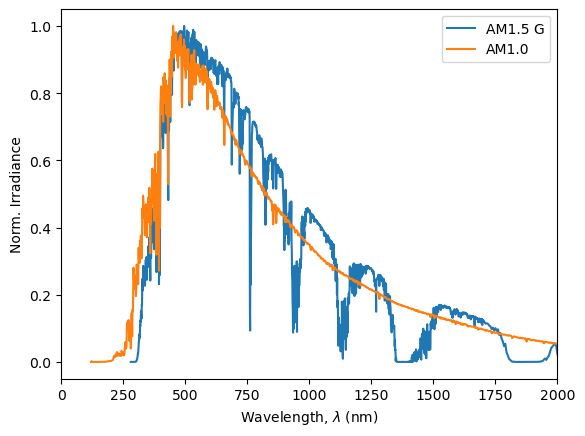

In [29]:
import matplotlib.pyplot as plt

# plt.figure( dpi = 200 )       # Un-hash and increase dpi for better quality

for Sheet_Name in AM_Sheet_Names:
    
    Data = Data_Frames_Dictionary[ Sheet_Name ]
    
    xs = Data.loc[ : ,  'Wavelength' ].values
    
    ys = Data.loc[ : ,  'Intensity per wavelength' ].values

    ys = array( [ abs( y[ 0 ] ) for y in ys ] )
        
    plt.plot( xs, ys / max( ys ), label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Norm. Irradiance' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ 0 , 2000 ] )

plt.show()

<br/><br/>
Following this, all the LED spectra are plotted using:
<br/><br/>

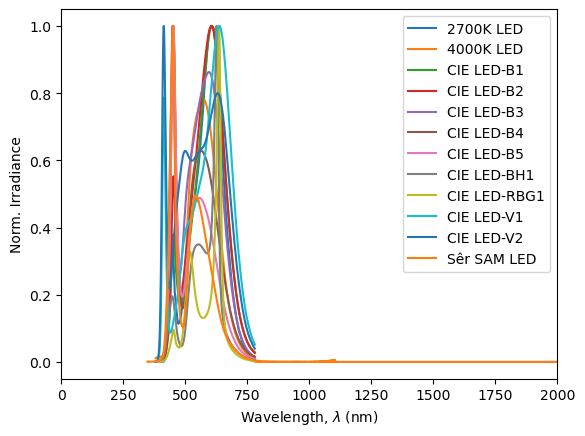

In [30]:
for Sheet_Name in LED_Sheet_Names:
    
    Data = Data_Frames_Dictionary[ Sheet_Name ]
    
    xs = Data.loc[ : ,  'Wavelength' ].values
    
    ys = Data.loc[ : ,  'Intensity per wavelength' ].values

    ys = array( [ abs( y[ 0 ] ) for y in ys ] )
        
    plt.plot( xs, ys / max( ys ), label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Norm. Irradiance' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ 0 , 2000 ] )

plt.show()

<br/><br/>
Following this, the fluorescent source are plotted using:
<br/><br/>

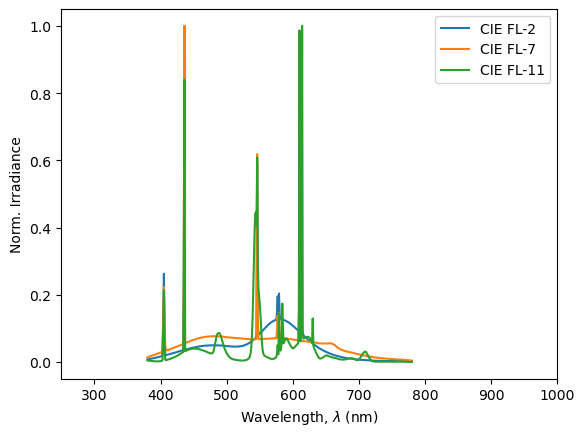

In [31]:
for Sheet_Name in FL_Sheet_Names:
    
    Data = Data_Frames_Dictionary[ Sheet_Name ]
    
    xs = Data.loc[ : ,  'Wavelength' ].values
    
    ys = Data.loc[ : ,  'Intensity per wavelength' ].values

    ys = array( [ abs( y[ 0 ] ) for y in ys ] )
        
    plt.plot( xs, ys / max( ys ), label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Norm. Irradiance' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ 250 , 1000 ] )

plt.show()

<br/><br/>
The real position-dependent spectra from Seunarine et al. is then plotted using: 
<br/><br/>

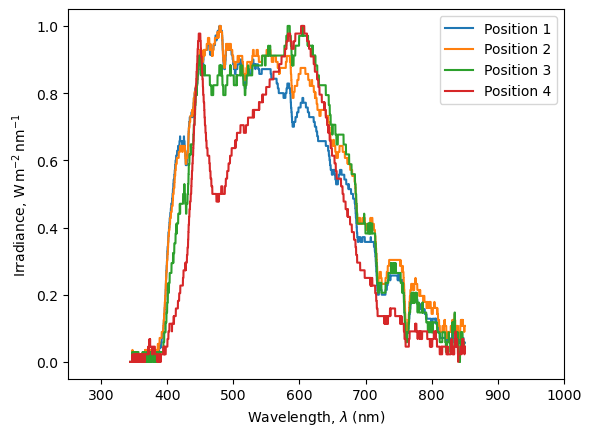

In [32]:
for Sheet_Name in Position_Dep_Sheet_Names:
    
    Data = Data_Frames_Dictionary[ Sheet_Name ]
    
    xs = Data.loc[ : ,  'Wavelength' ].values
    
    ys = Data.loc[ : ,  'Intensity per wavelength' ].values

    ys = array( [ abs( y[ 0 ] ) for y in ys ] )
        
    plt.plot( xs, ys / max( ys ), label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Irradiance, $\mathrm{W}\,\mathrm{m}^{-2}\,\mathrm{nm}^{-1}$' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ 250 , 1000 ] )

plt.show()

<br/><br/>
Additionally, the real time-dependent spectra from Seunarine et al. is plotted using: 
<br/><br/>

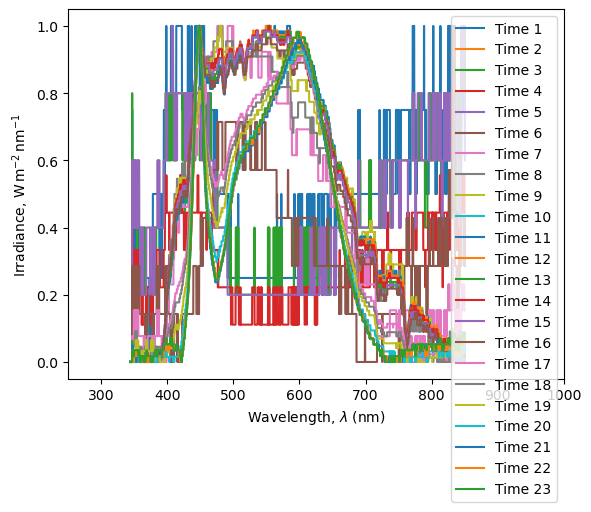

In [33]:
for Sheet_Name in Time_Dep_Sheet_Names:
    
    Data = Data_Frames_Dictionary[ Sheet_Name ]
    
    xs = Data.loc[ : ,  'Wavelength' ].values
    
    ys = Data.loc[ : ,  'Intensity per wavelength' ].values

    ys = array( [ abs( y[ 0 ] ) for y in ys ] )
        
    plt.plot( xs, ys / max( ys ), label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Irradiance, $\mathrm{W}\,\mathrm{m}^{-2}\,\mathrm{nm}^{-1}$' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ 250 , 1000 ] )

plt.show()

<a id="Determining_Flux"></a>
### 2.2. Determining Photon Flux
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
To determine the photon flux corresponding to a particular irradiance value, the following function is defined to determine the photon energy at a given wavelength:

In [34]:
def Energy_Wavelength_Converter( Energy_or_Wavelength ):
    
    """Convert from photon energy to wavelength or vice versa"""
    
    return h * c / ( e * Energy_or_Wavelength * 1e-9 )

<br/><br/>
Following this, for each sheet of the Excel files, the photon fluxes and irradiances are determined, then stored in a dictionary which will be used by the script to determine figures-of-merit.
<br/><br/>

In [35]:
Photon_Irradiance_Spectra = {}

Photon_Flux_Spectra = {}

for Sheet_Name in AM_LED_Sheet_Names:
    
    Wavelengths = [ Value[ 0 ] for Value in Data_Frames_Dictionary[ Sheet_Name ].loc[ : ,  'Wavelength' ].values ]
    
    Irradiances = [ Value[ 0 ] for Value in Data_Frames_Dictionary[ Sheet_Name ].loc[ : ,  'Intensity per wavelength' ].values ]
    
    Fluxes = [ 0.1 * Irradiances[ i ] / e / Energy_Wavelength_Converter( Wavelengths[ i ] ) for i in range( len( Wavelengths ) ) ]
          
    Photon_Irradiance_Spectra[ Sheet_Name ] = array( [ Wavelengths , Irradiances ] )
    
    Photon_Flux_Spectra[ Sheet_Name ] = array( [ Wavelengths , Fluxes ] )

<br/><br/>
These photon flux spectra are then plotted below:
<br/><br/>

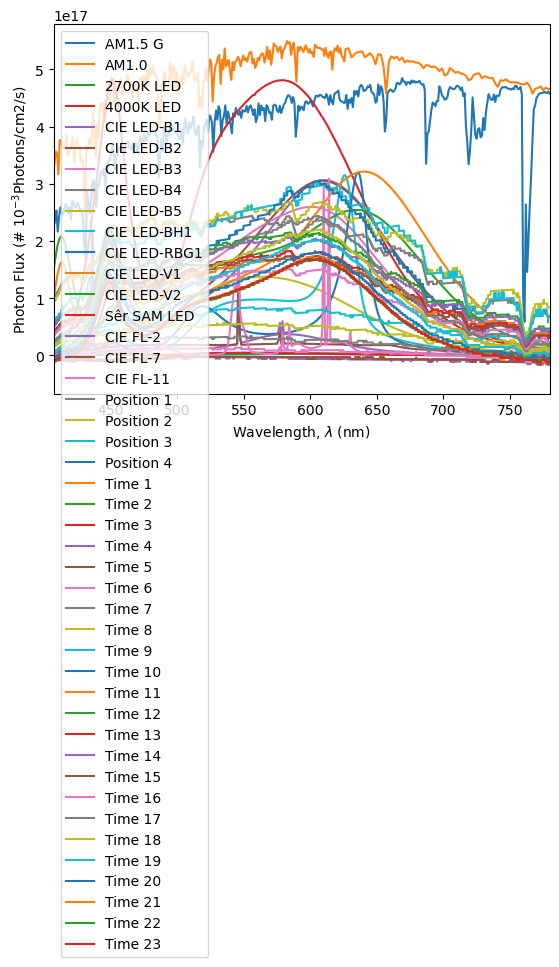

In [36]:
import matplotlib.pyplot as plt

# plt.figure( dpi = 200 )      # Un-hash and increase dpi for better quality

for Sheet_Name in AM_LED_Sheet_Names:
        
    plt.plot( Photon_Flux_Spectra[ Sheet_Name ][ 0 , : ], Photon_Flux_Spectra[ Sheet_Name ][ 1 , : ] , label = Sheet_Name )
    
plt.legend()

plt.ylabel( 'Photon Flux (# $10^{-3}$Photons/cm2/s)' )

plt.xlabel( 'Wavelength, $\lambda$ (nm)' )

plt.xlim( [ max( Minimum_Spectra_Wavelengths.values() ) , min( Maximum_Spectra_Wavelengths.values() ) ] )

plt.show()

<a id="Determining_Lux"></a>
### 2.3. Determining Total Light Power and Lux
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The powers densities associated with these spectra are determined using Equation ([15](#P_light)), where all the imported irradiance spectra have units of $\mathrm{W}\cdot\mathrm{m}^{-2}\cdot\mathrm{nm}^{-1}$. Integrating these irradiance spectra therefore gives a total incident power in units of $\mathrm{W}\cdot\mathrm{m}^{-2}$ and so, an addional scale factor of $10^{-1}$ is included to convert to units of $\mathrm{mW}\cdot\mathrm{cm}^{-2}$ in the following calculations:
<br/><br/>

In [37]:
P_lights = { Sheet_Name : 
            
    Light_Power( Photon_Irradiance_Spectra[ Sheet_Name ][ 0 ] , Photon_Irradiance_Spectra[ Sheet_Name ][ 1 ] ) / 10 
    
    for Sheet_Name in AM_LED_Sheet_Names }

<br/><br/>
Each of the photon flux spectra is then normalised to its power density and stored in a dictionary using:
<br/><br/>

In [38]:
Normalised_Photon_Flux_Spectra = {}

for Sheet_Name in AM_LED_Sheet_Names:
    
    Wavelengths , Fluxes = Photon_Flux_Spectra[ Sheet_Name ]
    
    Normalised_Photon_Flux_Spectra[ Sheet_Name ] = array( [ Wavelengths , Fluxes / P_lights[ Sheet_Name ] ] )

<br/><br/>
The luminous efficiency data is loaded in using the following code:
<br/><br/>

In [39]:
Luminous_Efficiency_File_Name = 'Luminous_Efficiency_Data.xlsx'

Luminous_Efficiency_Data = ExcelFile( 
    
    path.join( 
        
        Current_Working_Directory, 
        
        Luminous_Efficiency_File_Name ) )

<br/><br/>
This file contains luminous efficiency spectra for each of the three light cones that form the human eye: L - long wavelengths (red), M - medium wavelengths (green), and S - short wavelengths (blue). The available spectra (inferred from the sheet names) are given user-friendly names using the following dictionary:
<br/><br/>

In [40]:
V_Names = { '2_Deg_V' : 'V 2-deg',
           
           '10_Deg_V' : 'V 10-deg' }

<br/><br/>
The spectra are then parsed into individual dictionaries using: 
<br/><br/>

In [41]:
Luminous_Efficiency_Dictionary = { V_Names[ Sheet_Name ] : 
                         
    Luminous_Efficiency_Data.parse( 
       
        Sheet_Name ) 
                         
    for Sheet_Name in Luminous_Efficiency_Data.sheet_names }

<br/><br/>
For each of these data frames, invalid numbers are removed using:
<br/><br/>

In [42]:
for Key in list( Luminous_Efficiency_Dictionary.keys() ):
    
    Luminous_Efficiency_Dictionary[ Key ] = Luminous_Efficiency_Dictionary[ Key ].dropna()

<br/><br/>
These luminous efficiency spectra are then plotted as a function of photon energy using:
<br/><br/>

Text(0.5, 0, 'Photon Energy, $E$ (eV)')

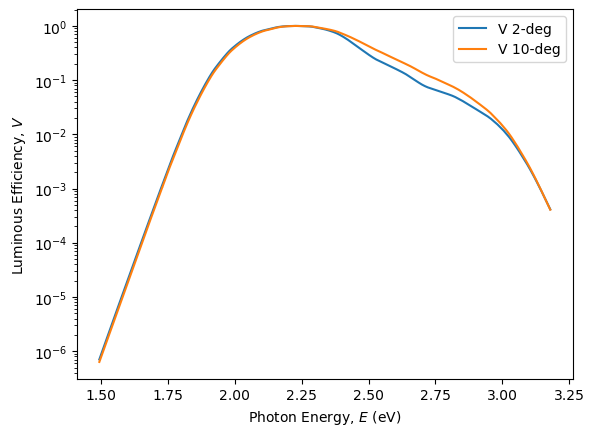

In [43]:
# plt.figure( dpi = 200 )      # Un-hash to increase dpi for better quality

for Key in list( Luminous_Efficiency_Dictionary.keys() ):
    
    Data = Luminous_Efficiency_Dictionary[ Key ]
    
    plt.plot( h * c / ( e*  1e-9 * Data[ Data.columns[ 0 ] ] ) , Data[ Data.columns[ 1 ] ] , label = Key )
    
plt.legend()
plt.yscale( 'log' )
plt.ylabel( 'Luminous Efficiency, $V$' )
plt.xlabel( 'Photon Energy, $E$ (eV)')

<br/><br/>
Each of these dictionaries contain a finite amount of data - extrapolation will be needed to estimate the luminous efficiency outside the data set. This extrapolation is modelled as a Gaussian with respect to the photon energy $E$ of the form:
<br/><br/>
<a id="Gaussian"></a>
$$\tag{23}
V(E)= e^{a_0E^2+b_0E+c_0}\propto e^{[A-BE]^2}.
$$
<br/><br/>
All parameters are boundless bar the coefficient of the quadratic term, $a_0$, which is forced to be negative such that the natural logarithm of the luminous efficiency is an inverse parabola. The parameter $c_0$ will relate to the amplitude the Gaussian will take at $E=0$. In terms of the photon wavelength, this model takes the form
<br/><br/>
<a id="Gaussian"></a>
$$\tag{24}
V(E)= \exp\left(\frac{a_0h^2c^2}{\lambda^2}+\frac{b_0hc}{\lambda}+c_0\right),
$$
<br/><br/>
where $a_0h^2c^2$ must have units of length-squared, $b_0hc$ must have units of length, and $c_0$ must be unitless.
<br/><br/>
&emsp;&emsp;&emsp;&emsp; To perform the curve fitting, the curve fit function is imported from the SciPy module:
<br/><br/>

In [44]:
from scipy.optimize import curve_fit 

<br/><br/>
To fit the data, the natural logarithm will be taken, such that the data will be fit with a quadratic model of the form:
<br/><br/>

In [45]:
def Quadratic( x , a_0 , b_0 , c_0 ):
    
    """A model for a quadratic line with coefficients a_0, b_0, and c_0."""
    
    return a_0 * x ** 2 + b_0 * x + c_0 

<br/><br/>
The User can change the number of data points that should be fit with the model below:
<br/><br/>

In [46]:
Number_of_Data_Points_to_Fit = 30

<br/><br/>
The parameters used in these Gaussian fittings are to be stored in the following dictionary:
<br/><br/>

In [47]:
Gaussian_Fit_Parameter_Dictionary = {}

<br/><br/>
Using the first and last data points (default thirty - user can modify), the natural logarithm of the luminous efficiency spectra are fit with the above model using the following function:
<br/><br/>

In [48]:
def Luminous_Efficiency_Extrapolater( Number_of_Data_Points_to_Fit , Wavelengths , Luminous_Efficiencies ):
    
    """For a given data set, extraploate the first and last portion of the luminous efficiencies using the wavelengths. The
    
    wavelengths should be in units of nm and ascending."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Prerequisite Data Sorting
    #-----------------------------------------------------------------------------------------------------------------------
    
    Energies = h * c / ( e * 1e-9 * Wavelengths )
    
    Energies_Flipped = Energies[ ::-1 ] # Flip the array so thei
    
    ln_Luminous_Efficiencies = log( Luminous_Efficiencies )
    
    ln_Luminous_Efficiencies_Flipped = ln_Luminous_Efficiencies[ ::-1 ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Fit First Tail
    #-----------------------------------------------------------------------------------------------------------------------
    
    Optimal_Parameters_1 , Optimal_Parameter_Errors_1 = curve_fit( 
    
        Quadratic, 
    
        Energies_Flipped[ :Number_of_Data_Points_to_Fit ],
    
        ln_Luminous_Efficiencies_Flipped[ :Number_of_Data_Points_to_Fit ],
        
        bounds = ( ( -inf ,  -inf , -inf ) , ( 0 , inf , inf ) ) )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Fit Second Tail
    #-----------------------------------------------------------------------------------------------------------------------
    
    Optimal_Parameters_2 , Optimal_Parameter_Errors_2 = curve_fit( 
    
        Quadratic, 
    
        Energies_Flipped[ -Number_of_Data_Points_to_Fit: ],
    
        ln_Luminous_Efficiencies_Flipped[ -Number_of_Data_Points_to_Fit: ],
    
        bounds = ( ( -inf ,  -inf , -inf ) , ( 0 , inf , inf ) ) )
    
    Scale_Factors = [ ( h * c / ( e * 1e-9 ) ) ** 2 , ( h * c / ( e * 1e-9 ) ) , 1 ]
    
    return Scale_Factors * Optimal_Parameters_1 , Scale_Factors * Optimal_Parameters_2

<br/><br/>
For each of the available spectra, the tails are now extrapolated and plotted using: <br/><br/>
<br/><br/>

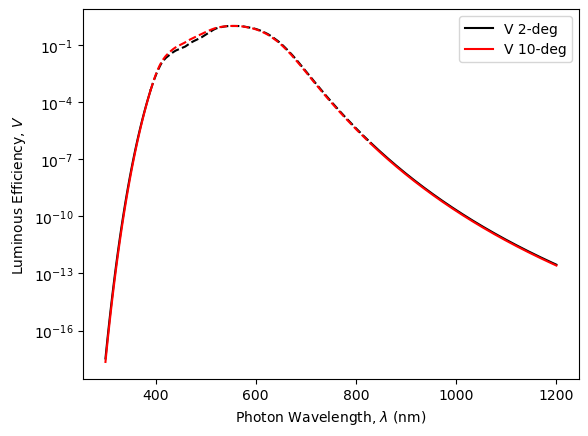

In [49]:
Colours = [ 'k' , 'r' , 'g' , 'b' , 'c' , 'm' , 'y' ]

# plt.figure( dpi = 200 )    # Un-hash and increase dpi for better quality

for Key in list( Luminous_Efficiency_Dictionary.keys() ):
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Specify Curve Colour
    #-----------------------------------------------------------------------------------------------------------------------
    
    Index = list( Luminous_Efficiency_Dictionary.keys() ).index( Key )

    Curve_Colour = Colours[ Index % 7 ]
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Load Data
    #-----------------------------------------------------------------------------------------------------------------------
    
    Data = Luminous_Efficiency_Dictionary[ Key ]
    
    Wavelength_Data = Data[ Data.columns[ 0 ] ]
    
    Luminous_Efficiency_Data = Data[ Data.columns[ 1 ] ]
    
    Lower_Plotting_Wavelengths = linspace( 300 , min( Wavelength_Data ) , 101 )

    Upper_Plotting_Wavelengths = linspace( max( Wavelength_Data ) , 1200 , 201 )

    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Extrapolation Parameters and Store Them
    #-----------------------------------------------------------------------------------------------------------------------
        
    Optimal_Parameters_1 , Optimal_Parameters_2 = Luminous_Efficiency_Extrapolater( 
        
        Number_of_Data_Points_to_Fit,
        
        Wavelength_Data, 
        
        Luminous_Efficiency_Data )
    
    Gaussian_Fit_Parameter_Dictionary[ Key ] = [ Optimal_Parameters_1 , Optimal_Parameters_2 ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Plot and Simulate
    #-----------------------------------------------------------------------------------------------------------------------
    
    plt.plot( Lower_Plotting_Wavelengths , exp( 
        
        Quadratic( 
            
            1 / Lower_Plotting_Wavelengths, 
            
            * Optimal_Parameters_2 ) ),
            
        Curve_Colour )
    
    plt.plot( Upper_Plotting_Wavelengths , exp( 
        
        Quadratic( 
            
            1 / Upper_Plotting_Wavelengths, 
            
            *Optimal_Parameters_1 ) ) , 
             
        Curve_Colour, 
             
        label = Key )
    
    plt.plot( Wavelength_Data , Luminous_Efficiency_Data , '--' , color = Curve_Colour  )

plt.yscale( 'log' )

plt.xlabel( 'Photon Wavelength, $\lambda$ (nm)')

plt.ylabel( 'Luminous Efficiency, $V$')

plt.legend()

plt.show()

<br/><br/>
In the above plot, the dashed lines indicate the imported data, whereas the solid lines are the extrapolated tails. Using these extrapolations, a function is now defined for determining the luminous efficiency at any wavelength:
<br/><br/>

In [50]:
def Extrapolated_Luminous_Efficiency( Luminous_Efficiency_Type , Wavelength ):
    
    """For a given luminous efficiency extrapolate (or interpolate) the sepctrum to determine its value at a particular 
    
    wavelength."""
    
    LE_Data = Luminous_Efficiency_Dictionary[ Luminous_Efficiency_Type ]
    
    if Wavelength < min( list( LE_Data[ LE_Data.columns[ 0 ] ] ) ):
                                             
        return exp( Quadratic( 1 / Wavelength , *Gaussian_Fit_Parameter_Dictionary[ Luminous_Efficiency_Type ][ 1 ] ) )
                                             
    if Wavelength > max( list( LE_Data[ LE_Data.columns[ 0 ] ] ) ):
                                             
        return exp( Quadratic( 1 / Wavelength , *Gaussian_Fit_Parameter_Dictionary[ Luminous_Efficiency_Type ][ 0 ] ) )
    
    else:
        
        return interp( Wavelength , LE_Data[ LE_Data.columns[ 0 ] ], LE_Data[ LE_Data.columns[ 1 ] ] )

<br/><br/>
Using this, the constants of proportionality (for determining lux values) and the lux values themselves can be deduced for each of the initial input spectra. However, values determined for spectra in previous simulations and stored in the "Spectra" folder (in both "Constants_of_Proportionality.txt" and "Lux_Values.txt") are not determined again as this process becomes time consuming for when considering dozens of spectra. __If any of the spectra have been altered, the file containing the constants of proportionality should be emptied.__ The following code is used to load in the constants of proportionality and determine which spectra have been considered previously:
<br/><br/>

In [51]:
Constants_of_Proportionality = {}

Lux_Values = {}

with open( File_Path_Dictionary[ "Constants_of_Proportionality.txt" ] ) as File:
    
    for Line in File:
        
        Line = Line.replace( '\n', '' )
        
        ( Key, Constant_2_deg, Constant_10_deg ) = Line.split( ', ' )
        
        Constants_of_Proportionality[ Key ] = { 'V 2-deg': float( Constant_2_deg ), 'V 10-deg': float( Constant_10_deg ) }
        
with open( File_Path_Dictionary[ "Lux_Values.txt" ] ) as File:
    
    for Line in File:
        
        Line = Line.replace( '\n', '' )
        
        ( Key, Lux_2_deg, Lux_10_deg ) = Line.split( ', ' ) 
        
        Lux_Values[ Key ] = { 'V 2-deg': float( Lux_2_deg ), 'V 10-deg': float( Lux_10_deg ) }       

<br/><br/>
The systems that have not previously been stored are identified using:
<br/><br/>

In [52]:
Spectra_to_Analyse_Constants = [ Spectra for Spectra in AM_LED_Sheet_Names 
                                
                                if Spectra not in Constants_of_Proportionality.keys() ]

Spectra_to_Analyse_Lux = [ Spectra for Spectra in AM_LED_Sheet_Names 
                          
                                if Spectra not in Lux_Values.keys() ]

Spectra_to_Analyse = list( set( Spectra_to_Analyse_Lux + Spectra_to_Analyse_Constants ) )

<br/><br/>
These systems are then analysed and their lux constants stored using:
<br/><br/>

In [53]:
for Key in Spectra_to_Analyse:
    
    Wavelengths = Photon_Irradiance_Spectra[ Key ][ 0 ]
    
    Constants_of_Proportionality_i = {}
    
    Lux_Values_i = {}
    
    for Luminous_Efficiency_Type in list( Luminous_Efficiency_Dictionary.keys() ):
    
        Constants_of_Proportionality_i[ Luminous_Efficiency_Type ] = Lux_Constant(
            
            Wavelengths, 
                     
            Photon_Irradiance_Spectra[ Key ][ 1 ] / ( P_lights[ Key ] * 10 ), 
                     
            [ Extrapolated_Luminous_Efficiency( 
                         
                Luminous_Efficiency_Type, 
                         
                Wavelength ) for Wavelength in Wavelengths ] )     
             
        Lux_Values_i[ Luminous_Efficiency_Type ] = Lux_Value( 
            
            Constants_of_Proportionality_i[ Luminous_Efficiency_Type ], 
            
            P_lights[ Key ] * 10  ) # Multiplied by 10 to get W/m2
        
    Constants_of_Proportionality[ Key ] = Constants_of_Proportionality_i
    
    Lux_Values[ Key ] = Lux_Values_i

<br/><br/>
Following this, the files containing these parameters are emptied, and the (potentially) updated data is saved using:
<br/><br/>

In [54]:
open( File_Path_Dictionary[ "Constants_of_Proportionality.txt" ] , 'w' ).close()

open( File_Path_Dictionary[ "Lux_Values.txt" ] , 'w' ).close()

Constants_to_Output = [ Sheet + ', ' + 
                        
                        str( Constants_of_Proportionality[ Sheet ][ 'V 2-deg' ] ) + ', ' + 
                        
                        str( Constants_of_Proportionality[ Sheet ][ 'V 10-deg' ] ) for Sheet in AM_LED_Sheet_Names ]

Lux_Values_to_Output = [ Sheet + ', ' + 
                        
                        str( Lux_Values[ Sheet ][ 'V 2-deg' ] ) + ', ' + 
                        
                        str( Lux_Values[ Sheet ][ 'V 10-deg' ] ) for Sheet in AM_LED_Sheet_Names ]

with open( File_Path_Dictionary[ "Constants_of_Proportionality.txt" ] , 'a' ) as File:
    
    for Entry in Constants_to_Output:
        
        File.write( Entry + '\n' )

    File.close()
    
with open( File_Path_Dictionary[ "Lux_Values.txt" ] , 'a' ) as File:
    
    for Entry in Lux_Values_to_Output:
        
        File.write( Entry + '\n' )

    File.close()

<a id="Making_Interface"></a>
## 3. Prequisites for a User Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, some prerequisite widgets needed to create the interface are defined, linked, and compiled. In [Section 3.1](#EQE_Loader), the widgets used to generate the EQE spectrum loading tool are defined. In [Section 3.2](#Lux_Customisation), the widgets needed to select a spectrum and customise its irradiance value are defined, then in [Section 3.3](#Additional_Widgets), any additional widgets are specified.
<a id="EQE_Loader"></a>
### 3.1. EQE Spectrum Loading Tool
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
As a prerequisite to building the User Interface, all widgets are imported from Jupyter's 'ipywidgets' library:
<br/><br/>

In [55]:
from ipywidgets import *

<a id="EQE_Loader"></a>
### 3.1.1. Determinining EQE Spectra File Paths
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The path to EQE spectra directory is created using the current working directory (defined in the previous section):
<br/><br/>

In [56]:
EQE_Spectra_Folder_Path = path.join( Current_Working_Directory , "EQE_Spectra" )

<br/><br/>
The files in this folder are then identified and stored using:
<br/><br/>

In [57]:
EQE_Spectra_Folder_Contents = listdir( EQE_Spectra_Folder_Path )

<br/><br/>
The corresponding file paths are determined and stored in the following dictionary:
<br/><br/>

In [58]:
EQE_File_Path_Dictionary = { File_Name :
                       
    path.join( EQE_Spectra_Folder_Path , File_Name )
                       
    for File_Name in EQE_Spectra_Folder_Contents }

<a id="Select_Spectrum"></a>
### 3.1.2. EQE Spectrum Selection Widgets
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
With the paths to the EQE spectra specified, a button widget is now defined for to commence the EQE-spectrum loading process:
<br/><br/>

In [59]:
Load_EQE_Button = Button( 

    description = 'Add EQE Spectrum' )

<br/><br/>
Ultimately, when pressed this button will open a data-loading tool-box such that the experimental spectra can be loaded. Before this can happen, each tool in the toolbox must be created; the first of these is a dropdown widget to select a spectrum from the available files: 
<br/><br/>

In [60]:
EQE_Choice_Widget_Options = EQE_Spectra_Folder_Contents.copy()

EQE_Choice_Widget = Combobox(

    options = EQE_Choice_Widget_Options,
    
    placeholder = 'File Name',
    
    description = 'Select File Name:',
    
    style = { 'description_width' : 'initial' } )

<br/><br/>
In some files, a number of rows may need to be skipped, or the header of the columns may extend across more than one row. These cases are accounted for by defining the following widgets:
<br/><br/>

In [61]:
Skip_Rows_Widget = BoundedIntText( 

    value = 0,

    min = 0,

    max = 1e40,

    description = 'Number of Rows to Skip:',

    style = { 'description_width' : 'initial' } ) 

Header_Length_Widget = BoundedIntText( 

    value = 1,

    min = 0,

    max = 1e40,

    description = 'Header Length =',

    style = { 'description_width' : 'initial' } ) 

Skip_Rows_Widget.layout.display = 'none' 
        
Header_Length_Widget.layout.display = 'none'

<br/><br/>
Following this, the widgets that form the final part of the EQE-selecting box are specified. These include a widget to cancel the data-loading process and a widget to save the EQE spectrum that the User will have selected.
<br/><br/>

In [62]:
Close_Box_Button = Button( description = 'Cancel' , button_style = 'danger' )

Add_Spectrum_Button = Button( description = 'Add Spectrum' , button_style = 'success' )

Coda_Box = HBox( [ Close_Box_Button , Add_Spectrum_Button ] )

Coda_Box.layout.display = 'none'

<br/><br/>
The coda box is then compiled with the EQE-selecting widget into an "Add Spectrum" box, which is set to initially be hidden. When the User clicks the "Add EQE Spectrum" button, the box will be revealed. Note, a blank placeholder label is added into this box such that further tools can take its place in the next section. 
<br/><br/>

In [63]:
Placeholder_Label = Label()

Error_Label = Valid( 
    
    value = False, 
    
    readout = '',

    layout = Layout(
    
        width = '100%' ) )

Error_Label.layout.display = 'none'

Add_Spectrum_Box = VBox( [ EQE_Choice_Widget , Skip_Rows_Widget , Header_Length_Widget , Placeholder_Label ] )

Add_Spectrum_Box.layout.display = 'none'

Compiled_Add_Spectrum_Box = VBox( [ 
    
    Load_EQE_Button,
    
    Add_Spectrum_Box,
    
    Coda_Box,
    
    Error_Label ])

<br/><br/>
A label for displaying error messages was also compiled into the box, which will be useful for error messages later on. The buttons for opening and closing the Load EQE spectrum dialogue box are now tied to operations using the following two functions:
<br/><br/>

In [64]:
def Open_EQE_Spectrum_Adder( Button ):
    
    """If the user chooses to add a spectrum, open the box."""
    
    Add_Spectrum_Box.layout.display = None
    
    Coda_Box.layout.display = None
    
Load_EQE_Button.on_click( Open_EQE_Spectrum_Adder )

def Close_EQE_Spectrum_Adder( Button ):
    
    """If the user chooses to add a spectrum, open the box."""
    
    Add_Spectrum_Box.layout.display = 'none'
    
    Coda_Box.layout.display = 'none'
    
    Error_Label.layout.display = 'none'
    
Close_Box_Button.on_click( Close_EQE_Spectrum_Adder )

<br/><br/>
The save data button's function will be defined at the end of this section.
<br/><br/>

<a id="Data_Customisation"></a>
### 3.1.3. Data Customisation Widgets
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The functions in this section essentially perform one job but each gets a bit involved. We will summarise each of their duties before defining them.
<br/><br/>
&emsp;&emsp;&emsp;&emsp; The following function loads the data from the Excel file the User selects, then proceeds to use other functions to (i) generate a control panel populated with widgets for customising column selection and specifying units, (ii) giving the widgets their instructions such that, e.g., pressing "Update Labels" updates the columns associated with the stored data, and (iii) presents a preview of the loaded data in a Pandas Data Frame:
<br/><br/>

In [65]:
def On_Change_Load_EQE_Widgets_Updater( Change ):
    
    """If the new filename is valid, generate the widgets and provide a preview of the data frame."""
   
    #-----------------------------------------------------------------------------------------------------------------------
    # Remove Placeholder from 'Add Spectrum' Box 
    #-----------------------------------------------------------------------------------------------------------------------
       
    Add_Spectrum_Box.children = Add_Spectrum_Box.children[ : -1 ] 
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Only Proceed if the User's Choice of EQE Filename Is Valid (i.e., The File is Present in the Folder)
    #-----------------------------------------------------------------------------------------------------------------------
        
    if EQE_Choice_Widget.value in EQE_Choice_Widget_Options:
        
        Skip_Rows_Widget.layout.display = None 
        
        Header_Length_Widget.layout.display = None
        
        #-------------------------------------------------------------------------------------------------------------------
        # Hide the Error Label if it Had Previously Been Revealed
        #-------------------------------------------------------------------------------------------------------------------
        
        Error_Label.readout = ''
        
        Error_Label.layout.display = 'none'
        
        #-------------------------------------------------------------------------------------------------------------------
        # Load the Data into a Globally-Defined Data Frame
        #-------------------------------------------------------------------------------------------------------------------
        
        global Loaded_DataFrame 
        
        if Header_Length_Widget.value != 0:
            
            Header = list( range( Header_Length_Widget.value ) ) 
            
        else:
            
            Header = None
            
        Loaded_DataFrame = read_excel( 
                    
            EQE_File_Path_Dictionary[ EQE_Choice_Widget.value ] ,
                    
            skiprows = Skip_Rows_Widget.value, 
                
            header = Header ) 
        
        #-------------------------------------------------------------------------------------------------------------------
        # Store the Column Titles in a Globally-Defined Variable
        #-------------------------------------------------------------------------------------------------------------------
            
        global Columns
        
        Columns = Loaded_DataFrame.columns
        
        #-------------------------------------------------------------------------------------------------------------------
        # Use Another Function to Generate a Grid of Data-Selecting Widgets
        #-------------------------------------------------------------------------------------------------------------------
    
        global Grid
        
        Grid = Data_Frame_Control_Box_Maker( Loaded_DataFrame )

        #-------------------------------------------------------------------------------------------------------------------
        # Create Widgets to Specify Whether a Variable Has Been Changed (Prevents Crashing)
        #-------------------------------------------------------------------------------------------------------------------
        
        global Variable_Changed_Widgets
        
        Variable_Changed_Widgets = { Column :
                           
            Checkbox( value = False ) 
                           
            for Column in Loaded_DataFrame.columns }    
      
        #-------------------------------------------------------------------------------------------------------------------
        # Generate a Button for Updating the Column Labels, Function Defined Elsewhere
        #-------------------------------------------------------------------------------------------------------------------
        
        global Update_Labels_Button
        
        Update_Labels_Button = Button( description = 'Update Labels' )

        Update_Labels_Button.on_click( Update_Lables_Button_Updater )
        
        #-------------------------------------------------------------------------------------------------------------------
        # Generate the Output DataFrame
        #-------------------------------------------------------------------------------------------------------------------
        
        Output_Table = Output()
        
        Add_Spectrum_Box.children = Add_Spectrum_Box.children + ( Output_Table , )
        
        global Output_DataFrame
        
        Output_DataFrame = Output_DataFrame_Generator( Loaded_DataFrame , Column_Labels , Include_Checkboxes )
        
        with Output_Table:
            
            display( Update_Labels_Button , Grid , Output_DataFrame )    
                
        for Column in Loaded_DataFrame.columns:
    
            Include_Checkboxes[ Column ].observe( Column_Unincluder , names = 'value' )
    
            Independent_Variable_Checkboxes[ Column ].observe( Independent_Variable_Changer , names = 'value' )
    
            Dependent_Variable_Checkboxes[ Column ].observe( Dependent_Variable_Changer , names = 'value' )
                
    else:
        
        Add_Spectrum_Box.children = Add_Spectrum_Box.children + ( Placeholder_Label , )

<br/><br/>
The above function is called when the User changes the value of the EQE file-selecting widget, it does this because of the following instruction:
<br/><br/>

In [66]:
EQE_Choice_Widget.observe( On_Change_Load_EQE_Widgets_Updater , names = 'value' )

<br/><br/>
The function for loading EQE spectra relies on two other functions which, in turn, rely on further functions to give widgets instructions etc. The first of these is more simple, it generates a data frame based on which file the User has selected, their choice of column labels, and which columns have been selected:
<br/><br/>

In [67]:
def Output_DataFrame_Generator( Loaded_DataFrame , Column_Labels , Include_Checkboxes ):
    
    """Generate the output dataframe."""
    
    Columns = Loaded_DataFrame.columns
    
    Output_DataFrame = Loaded_DataFrame.copy()

    Output_DataFrame.drop( [ Column for Column in Columns if Include_Checkboxes[ Column ].value == False ] , axis = 1 )    
    
    Output_DataFrame.rename( { Column : Column_Labels[ Column ].value for Column in Columns } )
    
    return Output_DataFrame

<br/><br/>
The second function is a little more involved. It generates all the widgets that the User can use to select columns from an Excel file, etc. It then compiles them into a grid where each column has a label:
<br/><br/>

In [68]:
def Data_Frame_Control_Box_Maker( Loaded_DataFrame ):
    
    """Using an input data frame, create all the widgets to control the data loading."""
    
    Columns = Loaded_DataFrame.columns
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Globally Define Some Quantities So They Can Be Referred To Elsewhere
    #-----------------------------------------------------------------------------------------------------------------------
    
    global Column_Labels, Include_Checkboxes, Independent_Variable_Checkboxes, Dependent_Variable_Checkboxes
    
    global Type_Widgets, Unit_Widgets
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Widgets to Specify the Column Labels (Initially, Let This Be the Column Titles of the Excel File)
    #-----------------------------------------------------------------------------------------------------------------------
    
    Column_Labels = { Column :
                    
        Text( 
            
            value = Column,
        
            layout = Layout( 
            
                width = '16.6666666666%' , 
            
                display = 'flex',
            
                justify_content = 'center' ) )
                    
        for Column in Columns }
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Widgets to Include / Remove Widgets     
    #-----------------------------------------------------------------------------------------------------------------------
    
    Include_Checkboxes = { Column : 
                         
        Checkbox(
        
            value = True,
            
            indent = False,
        
            layout = Layout( 
            
                width = '16.6666666666%',
                
                display = 'flex',
            
                justify_content = 'center' ),
        
            style = { '_view_name' : str( Column ) } )
                         
        for Column in Columns }
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Widgets to Set as Independent Variable or Dependent Variable Data     
    #-----------------------------------------------------------------------------------------------------------------------
    
    Independent_Variable_Checkboxes = { Column : 
                         
        Checkbox(
        
            value = False,
        
            indent = False,
            
            layout = Layout( 
            
                width = '16.6666666666%',
                
                display = 'flex',
            
                justify_content = 'center' ),
        
            style = { '_view_name' : str( Column ) } )
                                       
        for Column in Columns }
    
    Dependent_Variable_Checkboxes = { Column : 
                         
        Checkbox(
        
            value = True,
            
            indent = False,
        
            layout = Layout( 
            
                width = '16.6666666666%',
        
                display = 'flex',
            
                justify_content = 'center' ),
        
            style = { '_view_name' : str( Column ) } )
                                     
        for Column in Columns }
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Widgets to Specify Whether an Independent Variable is in Terms of Photon Energy or Wavelength     
    #-----------------------------------------------------------------------------------------------------------------------
    
    Type_Widgets = { Column :
                   
        RadioButtons( 
            
            options = [ 'Wavelength' , 'Energy'],
        
            value = 'Wavelength',
            
            layout = Layout( 
            
                width = '16.6666666666%' , 
            
                display = 'flex',
            
                justify_content = 'center' ), 
        
            disabled = True,
        
            style = { '_view_name' : str( Column ) } )
                    
        for Column in Columns }
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Widgets to Specify the Units of a Dependent Variable   
    #-----------------------------------------------------------------------------------------------------------------------
    
    Unit_Widgets = { Column :
                   
        RadioButtons( 
            
            options = [ 'Unitless' , '%'],
        
            value = 'Unitless',
            
            layout = Layout( 
            
                width = '16.6666666666%' , 
            
                display = 'flex',
            
                justify_content = 'center' ), 
        
            disabled = False,
        
            style = { '_view_name' : str( Column ) } )
                    
        for Column in Columns }
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Assume the First Column Initially Holds the Independent Variable Data
    #-----------------------------------------------------------------------------------------------------------------------
    
    First_Column = Loaded_DataFrame.columns[ 0 ]
    
    Independent_Variable_Checkboxes[ First_Column].value = True
    
    Dependent_Variable_Checkboxes[ First_Column ].value = False
    
    Type_Widgets[ First_Column ].disabled = False
    
    Unit_Widgets[ First_Column ].disabled = True
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create The Column Title Widgets with Centred Text
    #-----------------------------------------------------------------------------------------------------------------------
    
    Column_Titles = HBox( [
        
        Label( 
            
            value = 'Column Label' ,
            
            layout = Layout( 
            
                width = '16.6666666666%' , 
            
                display = 'flex',
            
                justify_content = 'center',
            
                border = 'groove' ) ),
        
        Label( 
            
            value = 'Include Column' , 
            
            layout = Layout( 
                
                width = '16.6666666666%' , 
                
                display = 'flex',
                
                justify_content = 'center',
            
                border = 'groove' ) ),
        
        Label( 
            
            value = 'Independent Variable' , 
            
            layout = Layout( 
                
                width = '16.6666666666%' , 
                
                display = 'flex',
                
                justify_content = 'center',
            
                border = 'groove' ) ),
        
        Label( 
            
            value = 'Type' , 
            
            layout = Layout( 
                
                width = '16.6666666666%' , 
                
                display = 'flex',
                
                justify_content = 'center',
            
                border = 'groove' ) ),
        
        Label(
            
            value = 'Dependent Variable' , 
            
            layout = Layout( 
                
                width = '16.6666666666%' , 
                
                display = 'flex',
                
                justify_content = 'center',
            
                border = 'groove' ) ),
        
        Label( 
            
            value = 'Unit' , 
            
            layout = Layout( 
                
                width = '16.6666666666%' , 
                
                display = 'flex',
                
                justify_content = 'center',
            
                border = 'groove' ) ) ] )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Store All the Output in a Grid
    #-----------------------------------------------------------------------------------------------------------------------
    
    Grid = GridspecLayout( len( Columns ) + 1 , 6 )
    
    Grid[ 0 , : ] = Column_Titles
    
    for i in range( len( Columns ) ):
        
        Column = Columns[ i ]
        
        Grid[ i + 1 , : ] = HBox( [
            
            Column_Labels[ Column ], 
            
            Include_Checkboxes[ Column ],
        
            Independent_Variable_Checkboxes[ Column ],
            
            Type_Widgets[ Column ],
            
            Dependent_Variable_Checkboxes[ Column ],
            
            Unit_Widgets[ Column ] ] )
    
    return Grid

<br/><br/>
The following function updates the Pandas Data Frame to remove columns that the User chooses to remove. It also disables all widgets associated with that column except the widget needed to include it again. 
<br/><br/>

In [69]:
def Column_Unincluder( Change ):
    
    """If the user chooses to not incldue a particular column, disable its customisation options."""
    
    Column = Change.owner.style._view_name
            
    if Change[ 'new' ] == True:
                
        Independent_Variable_Checkboxes[ Column ].disabled = False
    
        Dependent_Variable_Checkboxes[ Column ].disabled = False
        
        if Independent_Variable_Checkboxes[ Column ].value == True:
            
            Type_Widgets[ Column ].disabled = False
            
            Unit_Widgets[ Column ].disabled = True
        
        else:
            
            Type_Widgets[ Column ].disabled = True
            
            Unit_Widgets[ Column ].disabled = False
        
    if Change[ 'new' ] == False:
                
        Independent_Variable_Checkboxes[ Column ].disabled = True
    
        Dependent_Variable_Checkboxes[ Column ].disabled = True
        
        Type_Widgets[ Column ].disabled = True
        
        Unit_Widgets[ Column ].disabled = True
        
#        Output_DataFrame = Output_DataFrame.drop( [ Column_Labels[ Column ].value ] , axis = 1 )
    
    global Output_DataFrame, Columns
    
    Columns = Loaded_DataFrame.columns
    
    Output_DataFrame = Loaded_DataFrame.copy()

    Output_DataFrame = Output_DataFrame.drop( [ Col for Col in Columns if Include_Checkboxes[ Col ].value == False ] , axis = 1 )    
    
    Output_DataFrame = Output_DataFrame.rename( { Col : Column_Labels[ Col ].value for Col in Columns } , axis = 1 )
    
    Add_Spectrum_Box.children = Add_Spectrum_Box.children[ : -1 ] 
        
    Output_Table = Output()
        
    Add_Spectrum_Box.children = Add_Spectrum_Box.children + ( Output_Table , )
    
    with Output_Table:
        
        display( Grid , Output_DataFrame )

<br/><br/>
The following function is used to switch between a column between being a dependent variable and an independent variable:
<br/><br/>

In [70]:
def Independent_Variable_Changer( Change ):
    
    """If the user changes the column from containing independent variable data to dependent variable data, update the
    
    widgets."""
    
    Column = Change.owner.style._view_name
    
    if Variable_Changed_Widgets[ Column ].value != True:
    
        Variable_Changed_Widgets[ Column ].value = True # Prevent the other variable from repeating the process
        
        if Change[ 'new' ] == True:
                    
            Dependent_Variable_Checkboxes[ Column ].value = False
        
            Type_Widgets[ Column ].disabled = False
        
            Unit_Widgets[ Column ].disabled = True     
            
        if Change[ 'new' ] == False:
            
            Variable_Changed_Widgets[ Column ].value = True
        
            Dependent_Variable_Checkboxes[ Column ].value = True
        
            Type_Widgets[ Column ].disabled = True
        
            Unit_Widgets[ Column ].disabled = False  
                    
        Variable_Changed_Widgets[ Column ].value = False
        
    else:
            
        pass

<br/><br/>
Whereas the following function does the opposite:
<br/><br/>

In [71]:
def Dependent_Variable_Changer( Change ):
    
    """If the user changes the column from containing independent variable data to dependent variable data, update the
    
    widgets."""
    
    Column = Change.owner.style._view_name
    
    if Variable_Changed_Widgets[ Column ].value != True:
            
        Variable_Changed_Widgets[ Column ].value = True
        
        if Change[ 'new' ] == True:
        
            Independent_Variable_Checkboxes[ Column ].value = False
        
            Type_Widgets[ Column ].disabled = True
        
            Unit_Widgets[ Column ].disabled = False        
            
        if Change[ 'new' ] == False:
        
            Independent_Variable_Checkboxes[ Column ].value = True
        
            Type_Widgets[ Column ].disabled = False
        
            Unit_Widgets[ Column ].disabled = True
                    
        Variable_Changed_Widgets[ Column ].value = False
    
    else:
            
        pass

<br/><br/>
The following function is used to update the labels of the data frame if the user presses the button:
<br/><br/>

In [72]:
def Update_Lables_Button_Updater( Button ):
    
    """Update the labels of the data frame when clicked."""
    
    if EQE_Choice_Widget.value in EQE_Choice_Widget_Options:    
  
        global Output_DataFrame
    
        Output_DataFrame = Loaded_DataFrame.copy()
        
        Output_DataFrame = Output_DataFrame.drop( [ Col for Col in Columns if Include_Checkboxes[ Col ].value == False ] , axis = 1 )    
    
        Output_DataFrame = Output_DataFrame.rename( { Col : Column_Labels[ Col ].value for Col in Columns } , axis = 1 )
    
        Add_Spectrum_Box.children = Add_Spectrum_Box.children[ : -1 ] 
        
        Output_Table = Output()
        
        Add_Spectrum_Box.children = Add_Spectrum_Box.children + ( Output_Table , )

        with Output_Table:
        
            display( Update_Labels_Button , Grid , Output_DataFrame )        

<a id="Data_Storing"></a>
### 3.1.4. Data Storing Functions
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Once the user has selected their desired EQE, spectra, they will need to press the "Add Spectrum" button. This button will run the following function: 
<br/><br/>

In [73]:
Count_of_Rows = IntText( value = 0,
                       
                       max = 1e40 )

def Save_Added_EQE_Spectrum( Button ):
    
    """If the user chooses to save the spectrum, do so."""
        
    if EQE_Choice_Widget.value in EQE_Choice_Widget_Options:
        
        #-------------------------------------------------------------------------------------------------------------------
        # If The User Has Selected a Valid Filename, Else Give Error Message
        #-------------------------------------------------------------------------------------------------------------------
        
        if len( Output_DataFrame.columns ) < 2:
            
            #---------------------------------------------------------------------------------------------------------------
            # Ensure Two or More Columns of Data Have Been Provided, Else Give Error Message
            #---------------------------------------------------------------------------------------------------------------
        
            Error_Label.layout.display = None
            
            Error_Label.readout = 'Too Few Columns'
            
        else:
            
            #---------------------------------------------------------------------------------------------------------------
            # Make a Tally of How Many Columns are Independent Variables and How Many are Dependent Variables
            #---------------------------------------------------------------------------------------------------------------
            
            Number_of_Independents = 0
            
            Number_of_Dependents = 0
            
            for Column in Columns:
                
                if Include_Checkboxes[ Column ].value == True:
                
                    if Independent_Variable_Checkboxes[ Column ].value == True:
                    
                        Number_of_Independents += 1
            
                    if Dependent_Variable_Checkboxes[ Column ].value == True:
                    
                        Number_of_Dependents += 1
                        
            #---------------------------------------------------------------------------------------------------------------
            # If None of the Columns are Independent (or Dependent) - Error, Can't Calculate
            #---------------------------------------------------------------------------------------------------------------
        
            if Number_of_Independents == 0 or Number_of_Dependents == 0:
                
                Error_Label.layout.display = None
                
                if Number_of_Independents == 0:
                    
                    Error_Label.readout = 'No Independent Variables'
                
                if Number_of_Dependents == 0:
            
                    Error_Label.readout = 'No Dependent Variables'
                
            else:
                
                #-----------------------------------------------------------------------------------------------------------
                # If Everything is in Order, Proceed - Use the Data Compiler Function to Compile the Data
                #-----------------------------------------------------------------------------------------------------------
                
                global EQE_Spectra_to_Investigate
                
                Compiled_Data = Data_Compiler( Output_DataFrame )
                
                Current_Keys = list( EQE_Spectra_to_Investigate.keys() )
                
                New_Keys = list( Compiled_Data.keys() )
                    
                for i in range( len( New_Keys ) ):
                    
                    Key = New_Keys[ i ]
                    
                    if Key in Current_Keys:
                        
                        New_Key = Key 
                        
                        j = 0
                        
                        while New_Key in Current_Keys:
                            
                            # Ensure a key is unique - do not overlap data
                            
                            New_Key = Key + str( j )
                            
                            j += 1
                        
                        Compiled_Data[ New_Key ] = Compiled_Data[ Key ]
                        
                        del Compiled_Data[ Key ]
                        
                        New_Keys[ i ] = New_Key
                        
                    else:
                        
                        pass
                    
                #-----------------------------------------------------------------------------------------------------------
                # Add Compiled Data to Pre-Defined Dictionary
                #-----------------------------------------------------------------------------------------------------------
                
                global Count_of_Rows
                
                Count_of_Rows.value = Count_of_Rows.value + len( Compiled_Data )
                
                EQE_Spectra_to_Investigate = EQE_Spectra_to_Investigate | Compiled_Data
        
                EQE_Choice_Widget.value = ''
        
                #-----------------------------------------------------------------------------------------------------------
                # Hide the Data Loading Boxes Now That the Spectra Have Been Added
                #-----------------------------------------------------------------------------------------------------------
    
                Add_Spectrum_Box.layout.display = 'none'
    
                Coda_Box.layout.display = 'none'
                
                Error_Label.layout.display = 'none'
                
                #-----------------------------------------------------------------------------------------------------------
                # Add the Data to the Tab
                #-----------------------------------------------------------------------------------------------------------                
        
                for New_Key in New_Keys:
                
                    EQE_Spectrum_Analysing_Tab_Generator( New_Key )
    else:
        
        Error_Label.layout.display = None
        
        Error_Label.readout = 'Invalid File Name'

<br/><br/>
The button executes this function when instructed to by the following code:
<br/><br/>

In [74]:
Add_Spectrum_Button.on_click( Save_Added_EQE_Spectrum )

<br/><br/>
The above function makes use of a data compiling function (defined below) and a pre-existing array that is added to each time the User adds an EQE spectrum.
<br/><br/>

In [75]:
EQE_Spectra_to_Investigate = {}

def Data_Compiler( Output_DataFrame ):
    
    """When the save data button is pressed, compile the DataFrame into 2D arrays, where each array is stored with one set
    
    of independent and dependent variable data according to the column name."""
    
    Column_Titles = list( Loaded_DataFrame.columns )
    
    #----------------------------------------------------------------------------------------------------------------------
    # Prerequisite Definitions
    #---------------------------------------------------------------------------------------------------------------------- 
        
    Indices_of_Independent_Variables = []
    
    Indices_of_Dependent_Variables = []
    
    Output_Independent_Variable_Data = {}
    
    Output_Dependent_Variable_Data = {}
    
    for Column in Column_Titles:
        
        #------------------------------------------------------------------------------------------------------------------
        # If the column is to be included
        #------------------------------------------------------------------------------------------------------------------
        
        if Include_Checkboxes[ Column ].value == True:   
            
            #--------------------------------------------------------------------------------------------------------------
            # If the data corresponds to an independent variable
            #--------------------------------------------------------------------------------------------------------------

            if Independent_Variable_Checkboxes[ Column ].value == True:

                #----------------------------------------------------------------------------------------------------------
                # Append the column index to the list of independent variable column indices
                #----------------------------------------------------------------------------------------------------------
                
                Indices_of_Independent_Variables.append( Column_Titles.index( Column ) )
                
                #----------------------------------------------------------------------------------------------------------
                # Add the wavelengths to an independent variable data dictionary, convert if necessary
                #----------------------------------------------------------------------------------------------------------
                
                if Type_Widgets[ Column ].value == 'Energy':
                
                    Output_Independent_Variable_Data[ Column ] = Energy_Wavelength_Converter( 
                        
                        array( Loaded_DataFrame[ Column ] ) )
            
                if Type_Widgets[ Column ].value == 'Wavelength':
                
                    Output_Independent_Variable_Data[ Column ] = array( Loaded_DataFrame[ Column ] )
                
            #--------------------------------------------------------------------------------------------------------------
            # If the data corresponds to a dependent variable
            #--------------------------------------------------------------------------------------------------------------

            if Dependent_Variable_Checkboxes[ Column ].value == True:
                
                #----------------------------------------------------------------------------------------------------------
                # Append the column index to the list of dependent variable column indices
                #----------------------------------------------------------------------------------------------------------
                
                Indices_of_Dependent_Variables.append( Column_Titles.index( Column ) )
                
                #----------------------------------------------------------------------------------------------------------
                # Add the EQEs to a dependent variable data dictionary, convert if necessary
                #----------------------------------------------------------------------------------------------------------
                
                if Unit_Widgets[ Column ].value == 'Unitless':
                    
                    Output_Dependent_Variable_Data[ Column ] = array( Loaded_DataFrame[ Column ] )
                    
                if Unit_Widgets[ Column ].value == '%':
                    
                    Output_Dependent_Variable_Data[ Column ] = array( Loaded_DataFrame[ Column ] ) / 100
                    
    #----------------------------------------------------------------------------------------------------------------------
    # Compile Data
    #---------------------------------------------------------------------------------------------------------------------- 
            
    Output_Arrays = {}
    
    for Index in Indices_of_Dependent_Variables:
        
        Preceeding_Independent_Variable_Index = [ Value 
                                                 
                                                 for Value in Indices_of_Independent_Variables if Value < Index ][ -1 ]
                    
        X_Data = Output_Independent_Variable_Data[ Column_Titles[ Preceeding_Independent_Variable_Index ] ]
        
        Y_Data = Output_Dependent_Variable_Data[ Column_Titles[ Index ] ]
        
        if X_Data[ 0 ] > X_Data[ 1 ]:
            
            X_Data = X_Data[ ::-1 ]
            
            Y_Data = Y_Data[ ::-1 ]
        
        Output_Arrays[ Column_Labels[ Column_Titles[ Index ] ].value ] = array( [ X_Data , Y_Data ] )
                        
    return Output_Arrays

<a id="Lux_Customisation"></a>
### 3.2. Spectral Tailoring
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the widgets needed to customise irradiance values, irradiance units, superimpose spectra, and more of the like are defined. Firstly, the available spectra are compiled into a series of radio buttons, such that the user can readily switch between them:
<br/><br/>

In [76]:
AM_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = AM_Sheet_Names,

    layout={'width': 'max-content'} )

LED_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = LED_Sheet_Names,

    layout={'width': 'max-content'} )

FL_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = FL_Sheet_Names,

    layout={'width': 'max-content'} )

Position_Dep_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = Position_Dep_Sheet_Names,

    layout={'width': 'max-content'} )

Time_Dep_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = Time_Dep_Sheet_Names,

    layout={'width': 'max-content'} )

Customised_Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = [],

    layout={'width': 'max-content'} )

<br/><br/>
All of these spectrum-selecting widgets are initially hidden (bar the standard air-mass spectra): 
<br/><br/>

In [77]:
LED_Spectrum_Selector.layout.display = 'none'

FL_Spectrum_Selector.layout.display = 'none'

Position_Dep_Spectrum_Selector.layout.display = 'none'

Time_Dep_Spectrum_Selector.layout.display = 'none'

Customised_Spectrum_Selector.layout.display = 'none'

<br/><br/>
The following widget is then defined to switch between the different spectrum suites with ease:
<br/><br/>

In [78]:
Spectrum_Library_Selector = RadioButtons( 

    value = 'Standard Air Mass Spectra',
    
    options = [
        
        'Standard Air Mass Spectra',
        
        'LED Spectra',
        
        'Fluorescent Source Spectra',
        
        'Seunarine et al. Position-Dependent Daytime Spectra',
        
        'Seunarine et al. Time-Dependent Daytime Spectra',
        
        'Customised'
                
    ],
    
    description = 'Spectrum Suite:',
    
    style = { 'description_width' : 'initial' },
    
    layout = { 'width': 'max-content' } )

<br/><br/>
The above widget is instructed to obey the following function to allow the User to change between light sources:
<br/><br/>

In [79]:
def Spectrum_Suite_Changer( Change ):
    
    """On Change, update the spectrum-selecting widget available to the User."""
    
    Chosen_Suite = Change[ 'new' ]
    
    # Hide all:
    
    AM_Spectrum_Selector.layout.display = 'none'

    LED_Spectrum_Selector.layout.display = 'none'

    FL_Spectrum_Selector.layout.display = 'none'

    Position_Dep_Spectrum_Selector.layout.display = 'none'

    Time_Dep_Spectrum_Selector.layout.display = 'none'
    
    Customised_Spectrum_Selector.layout.display = 'none'    
    
    # Reveal desired spectrum
    
    if Chosen_Suite == 'Standard Air Mass Spectra':
        
        AM_Spectrum_Selector.layout.display = None
        
    if Chosen_Suite == 'LED Spectra':
        
        LED_Spectrum_Selector.layout.display = None
        
    if Chosen_Suite == 'Fluorescent Source Spectra':
        
        FL_Spectrum_Selector.layout.display = None
        
    if Chosen_Suite == 'Seunarine et al. Position-Dependent Daytime Spectra':
        
        Position_Dep_Spectrum_Selector.layout.display = None
        
    if Chosen_Suite == 'Seunarine et al. Time-Dependent Daytime Spectra':
        
        Time_Dep_Spectrum_Selector.layout.display = None
        
    if Chosen_Suite == 'Customised':
        
        Customised_Spectrum_Selector.layout.display = None
        
Spectrum_Library_Selector.observe( Spectrum_Suite_Changer, names = 'value' )        

<br/><br/>
To allieviate the identifcation of the selected spectrum, the following widget is defined to hold all spectrum types:
<br/><br/>

In [80]:
Spectrum_Selector = RadioButtons( 
    
    description = 'Spectrum:',
    
    options = AM_LED_Sheet_Names,

    layout={'width': 'max-content'} )

<br/><br/>
When the user changes the spectrum suite and/or type, the following function is called to update the spectrum selected by the above widget:
<br/><br/>

In [81]:
def Spectrum_Selector_Updater( Change ):
    
    """Update the spectrum selector to hold the value of the selected spectrum."""
    
    Chosen_Suite = Spectrum_Library_Selector.value
        
    if Chosen_Suite == 'Standard Air Mass Spectra':
        
        Spectrum_Selector.value = AM_Spectrum_Selector.value 
        
    if Chosen_Suite == 'LED Spectra':
        
        Spectrum_Selector.value = LED_Spectrum_Selector.value
        
    if Chosen_Suite == 'Fluorescent Source Spectra':
        
        Spectrum_Selector.value = FL_Spectrum_Selector.value
        
    if Chosen_Suite == 'Seunarine et al. Position-Dependent Daytime Spectra':
        
        Spectrum_Selector.value = Position_Dep_Spectrum_Selector.value
        
    if Chosen_Suite == 'Seunarine et al. Time-Dependent Daytime Spectra':
        
        Spectrum_Selector.value = Time_Dep_Spectrum_Selector.value
        
    if Chosen_Suite == 'Customised':
        
        Spectrum_Selector.value = Customised_Spectrum_Selector.value

<br/><br/>
The above function is invoked when needed using:
<br/><br/>

In [82]:
Spectrum_Library_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

AM_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

LED_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

FL_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

Position_Dep_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

Time_Dep_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

Customised_Spectrum_Selector.observe( Spectrum_Selector_Updater, names = 'value' )

<br/><br/>
All of these widgets for selecting a spectrum are then compiled into one box:
<br/><br/>

In [83]:
Compiled_Spectrum_Selector_Box = VBox( [
    
    Spectrum_Library_Selector,
    
    AM_Spectrum_Selector,
    
    LED_Spectrum_Selector,
    
    FL_Spectrum_Selector,
    
    Position_Dep_Spectrum_Selector,
    
    Time_Dep_Spectrum_Selector,

    Customised_Spectrum_Selector ] )

<br/><br/>
The following error message is defined for the case that a spectrum has not been selected:
<br/><br/>

In [84]:
Spectrum_Not_Selected_Warning = Label(
    
    value = r'\(\color{red} {' + '\mathrm{WARNING: Select\, a\, spectrum\, to\, simulate\, performance}' + '}\)' )

Spectrum_Not_Selected_Warning.layout.display = 'none'

<br/><br/>
This warning is added to the compiled spectrum selecting box: 
<br/><br/>

In [85]:
Compiled_Spectrum_Selector_Box.children = Compiled_Spectrum_Selector_Box.children + ( Spectrum_Not_Selected_Warning, )

<br/><br/>
The following function is defined to avoid any errors that may arise when a spectrum is not selected, by ensuring that one is:
<br/><br/>

In [86]:
def Ensure_Spectrum_Selected_Before_Simulating( Change ):
    
    """If the user chooses to use a customised spectrum, or, e.g., the LED spectra have been removed from the "Spectra" 
    
    folder, this becomes problematic for the code to work. This function ensures that the selected spectrum is valid.
    
    If it is not valid, the "run simulation" buttons are disabled."""
    
    if Change[ 'new' ] == None:
        
        Calculate_Limit_Button.disabled = True
        
        Calculate_Limit_vs_Intensity_Button.disabled = True
        
        Bulk_Analysis_Button.disabled = True
        
        for Key in Analyse_Lower_Limit_Data_Buttons.keys():
            
            Analyse_Lower_Limit_Data_Buttons[ Key ].disabled = True
            
            Analyse_Intensity_Data_Buttons[ Key ].disabled = True        
        
        Spectrum_Not_Selected_Warning.layout.display = None     
                
    else:
        
        Calculate_Limit_Button.disabled = False
        
        Calculate_Limit_vs_Intensity_Button.disabled = False
        
        Bulk_Analysis_Button.disabled = False
        
        for Key in Analyse_Lower_Limit_Data_Buttons.keys():
            
            Analyse_Lower_Limit_Data_Buttons[ Key ].disabled = False
            
            Analyse_Intensity_Data_Buttons[ Key ].disabled = False          
        
        Spectrum_Not_Selected_Warning.layout.display = 'none'        
        
Spectrum_Selector.observe( Ensure_Spectrum_Selected_Before_Simulating, names = 'value' )

<a id="Superimposing_Spectra"></a>
#### 3.2.1. Widgets for Superimposing Spectra 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Following this, widgets are defined for superimposing any number of spectra, starting with checkboxes that "activate" each of the spectra - these are defined and stored in dictionaries using:
<br/><br/>

In [87]:
Spectrum_Enabled_Boxes = { Spectrum_Type : 
                          
    Checkbox( 
    
        value = False,
    
        description = "Enable '" + Spectrum_Type + "'",
    
        style = { 'description_width' : 'initial' } )
                         
    for Spectrum_Type in AM_LED_Sheet_Names }

<br/><br/>
In addition, input boxes are created for defining the contribution of a given spectrum to the total using:
<br/><br/>

In [88]:
Spectrum_Ratios_Inputs = { Spectrum_Type : 
                          
    FloatText( 
    
        value = 0,
    
        description = Spectrum_Type + ' Contribution',
        
        style = { 'description_width' : 'initial' },
    
        disabled = True )
                         
    for Spectrum_Type in AM_LED_Sheet_Names }

<br/><br/>
Following this, a function is defined for disabling and enabling a given spectrum's ratio input (depending on whether or not the user activates it).
<br/><br/>

In [89]:
def Spectrum_Input_Disabler( Change ):
    
    """A function for activating/disabling a spectrum's ratio input, depending on whether on what the user chooses. The 
    
    default state is deactivated."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine the spectrum type using the changing widget's description
    #-----------------------------------------------------------------------------------------------------------------------
    
    Spectrum_Type = Change[ 'owner' ].description[ 8:-1 ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # If the widget is activated, enable the input box and give it a value of 1 
    #-----------------------------------------------------------------------------------------------------------------------

    if Change[ 'new' ] == True:
        
        Spectrum_Ratios_Inputs[ Spectrum_Type ].disabled = False
        
        Spectrum_Ratios_Inputs[ Spectrum_Type ].value = 1
        
    #-----------------------------------------------------------------------------------------------------------------------
    # If the widget is deactivated, disable the input box and give it a value of 0
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Change[ 'new' ] == False:
        
        Spectrum_Ratios_Inputs[ Spectrum_Type ].disabled = True
        
        Spectrum_Ratios_Inputs[ Spectrum_Type ].value = 0

<br/><br/>
The checkbox widgets are instructed to obey the above function using the following code:
<br/><br/>

In [90]:
for Spectrum_Type in AM_LED_Sheet_Names:
    
    Spectrum_Enabled_Boxes[ Spectrum_Type ].observe( Spectrum_Input_Disabler , names = 'value' )

<br/><br/>
Once the user is happy for their spectra to be superimposed at their desired ratios, they must approve for it to be created using the button defined below.
<br/><br/>

In [91]:
Approve_Add_Customised_Spectrum_Button = Button(
    
    description = '✓',
    
    button_style = 'success' )

<br/><br/>
Alternatively, the user can cancel the creation of their customised spectrum by using the following button:
<br/><br/> 

In [92]:
Cancel_Add_Customised_Spectrum_Button = Button(
    
    description = '🗙',
    
    button_style = 'danger' )

<br/><br/>
However, if the use has not provided ample detail (e.g., only one spectrum that cannot be superimposed with itself), an error message must be revealed. This is done using the following widget:
<br/><br/>

In [93]:
Spectrum_Customising_Box_Error_Message = Valid(

    value = False,

    readout = 'Invalid',

    style = { 'readout_width' : 'initial' } )

Spectrum_Customising_Box_Error_Message.layout.display = 'None'

<br/><br/>
All these widgets for superimposing spectra to create a customised spectrum are compiled into the following widget box:
<br/><br/>

In [94]:
Spectrum_Customising_Box = VBox( 
    
    [ HBox( [ 
        
        Spectrum_Enabled_Boxes[ Spectrum_Type ] , 
        
        Spectrum_Ratios_Inputs[ Spectrum_Type ] ] )
     
     for Spectrum_Type in AM_LED_Sheet_Names ] +
 
    [ HBox( [ 
        
        Approve_Add_Customised_Spectrum_Button , 
        
        Cancel_Add_Customised_Spectrum_Button ] ),
     
     Spectrum_Customising_Box_Error_Message ] )

<br/><br/>
In turn, this box is hidden (until the add customised spectrum process is begun) using
<br/><br/>

In [95]:
Spectrum_Customising_Box.layout.display = 'None'

<br/><br/>
The box should be revealed by pressing the following button:
<br/><br/>

In [96]:
Add_Customised_Spectrum_Button = Button(

    description = 'Add Customised' )

<br/><br/>
The button will do its job using the following function:
<br/><br/>

In [97]:
def On_Click_Open_Customise_Spectrum_Box( Button ):
    
    """On click, reveral the box containing the widgets for creating customised spectrum."""
    
    Spectrum_Customising_Box.layout.display = None

Add_Customised_Spectrum_Button.on_click( On_Click_Open_Customise_Spectrum_Box )

<br/><br/>
The widgets for approving or cancelling the creation of a superimposed spectrum need to be instructed to follow functions to perform their jobs; the latter's function is:
<br/><br/>

In [98]:
def On_Click_Cancel_Add_Customised_Spectrum( Button ):
    
    """This function cancels the creation of a superimposed spectrum by hiding the customised spectrum creation box, and 
    
    setting all the 'spectrum-enabled' checkboxes to false (which, in turn, sends their values to nought)."""
    
    Spectrum_Customising_Box.layout.display = 'None'
    
    Spectrum_Customising_Box_Error_Message.layout.display = 'None'
    
    for Spectrum_Type in AM_LED_Sheet_Names:
        
        Spectrum_Enabled_Boxes[ Spectrum_Type ].value = False

<br/><br/>
The button is now instructed to perform its function using:
<br/><br/>

In [99]:
Cancel_Add_Customised_Spectrum_Button.on_click( On_Click_Cancel_Add_Customised_Spectrum )

<br/><br/>
On the other hand, a function for adding the customised spectrum is defined as follows:
<br/><br/>

In [100]:
def On_Click_Approve_Add_Customise_Spectrum( Button ):
    
    """On click, add a customised spectrum at the desired ratio, provided that the required criteria are met (i.e., two or
    
    more spectra have been specififed)."""
    
    #----------------------------------------------------------------------------------------------------------------------
    # The enabled spectra are first identified from the user's inputs 
    #---------------------------------------------------------------------------------------------------------------------- 
    
    Desired_Spectra = [ Spectrum_Type for Spectrum_Type in AM_LED_Sheet_Names 
                        
        if Spectrum_Enabled_Boxes[ Spectrum_Type ].value == True ]
    
    #----------------------------------------------------------------------------------------------------------------------
    # If no spectrum has been selected, reveal error message, do nothing
    #----------------------------------------------------------------------------------------------------------------------
    
    if len( Desired_Spectra ) == 0:
        
        Spectrum_Customising_Box_Error_Message.layout.display = None
        
        Spectrum_Customising_Box_Error_Message.readout = 'No spectrum selected'
    
    #----------------------------------------------------------------------------------------------------------------------
    # If only one spectrum has been selected, reveal error message, do nothing
    #----------------------------------------------------------------------------------------------------------------------
        
    if len( Desired_Spectra ) == 1:
        
        Spectrum_Customising_Box_Error_Message.layout.display = None
        
        Spectrum_Customising_Box_Error_Message.readout = 'Select one more'
        
    #----------------------------------------------------------------------------------------------------------------------
    # If two or more spectra have been selected, hide error message (will stay hidden if not revealed), create the spectrum
    #----------------------------------------------------------------------------------------------------------------------
            
    if len( Desired_Spectra ) > 1:
        
        #------------------------------------------------------------------------------------------------------------------
        # Hide error message
        #------------------------------------------------------------------------------------------------------------------
        
        Spectrum_Customising_Box_Error_Message.layout.display = 'None'        
        
        #------------------------------------------------------------------------------------------------------------------        
        # Determine the desired ratios 
        #------------------------------------------------------------------------------------------------------------------
        
        Desired_Ratios = { Spectrum_Type : 
                          
                          Spectrum_Ratios_Inputs[ Spectrum_Type ].value for Spectrum_Type in Desired_Spectra }
        
        #------------------------------------------------------------------------------------------------------------------     
        # Run the external function for superimposing spectra at desired ratios
        #------------------------------------------------------------------------------------------------------------------
        
        Customised_Spectrum_Creator( Desired_Spectra , Desired_Ratios )
        
        #------------------------------------------------------------------------------------------------------------------
        # Hide the box for creating a customised spectrum
        #------------------------------------------------------------------------------------------------------------------
        
        Spectrum_Customising_Box.layout.display = 'None'    

<br/><br/>
The button for approving the creation of the superimposed spectra is instructed to obey the above function using the following line of code:
<br/><br/>

In [101]:
Approve_Add_Customised_Spectrum_Button.on_click( On_Click_Approve_Add_Customise_Spectrum )

<br/><br/>
The function relies on another function to superimpose the spectra; namely, the function below:
<br/><br/>

In [102]:
Additional_Spectra = {}

def Customised_Spectrum_Creator( Desired_Spectra , Desired_Ratios ):
    
    """Create a customised spectrum from a user's specifications."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine the total of the ratios and normalise
    #-----------------------------------------------------------------------------------------------------------------------
        
    Total = sum( list( Desired_Ratios.values() ) )
    
    Normalised_Ratios = { Spectrum_Type : 
                        
                        Desired_Ratios[ Spectrum_Type ] / Total for Spectrum_Type in Desired_Ratios }
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Create a "Combination String" to save the new spectrum with
    #-----------------------------------------------------------------------------------------------------------------------

    Combination_String = ''

    for Key in Desired_Spectra:
    
        Combination_String += Key + ' : '
        
    Combination_String = Combination_String[ :-3 ] 
    
    Combination_String += ' (' 
        
    for Key in Desired_Spectra:
            
        Combination_String += str( Desired_Ratios[ Key ] ) + ' : '

    Combination_String = Combination_String[ :-3 ]
    
    Combination_String += ')'
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Combine the Spectra
    #-----------------------------------------------------------------------------------------------------------------------

    Wavelengths , Combined_Spectrum = Normalised_Photon_Flux_Spectra[ Desired_Spectra[ 0 ] ] 
    
    Combined_Spectrum = Combined_Spectrum * Normalised_Ratios[ Desired_Spectra[ 0 ] ]
    
    for Remaining_Spectrum in Desired_Spectra[ 1: ]:
        
        New_Wavelengths , Normalised_Spectrum = Normalised_Photon_Flux_Spectra[ Remaining_Spectrum ]
        
        Interpolated_Spectrum = Interpolator( New_Wavelengths , Normalised_Spectrum , Wavelengths )
        
        Combined_Spectrum += Interpolated_Spectrum * Normalised_Ratios[ Remaining_Spectrum ]
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Add spectrum to dictionaries
    #-----------------------------------------------------------------------------------------------------------------------
        
    Normalised_Photon_Flux_Spectra[ Combination_String ] = array( [ Wavelengths , Combined_Spectrum ] ) #Spectrum normalised
    
    Photon_Flux_Spectra[ Combination_String ] = array( [ Wavelengths , Combined_Spectrum ] )    
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine P_light and Irradiance Spectra, Then Add Them
    #-----------------------------------------------------------------------------------------------------------------------
    
    Photon_Irradiance_Spectra[ Combination_String ] = array( [ 
        
        Wavelengths , 
        
        10 * Combined_Spectrum * Energy_Wavelength_Converter( Wavelengths ) * e ] )  # Irradiance in units of W/m2/nm
    
    P_lights[ Combination_String ] = simps( 
        
        y = Photon_Irradiance_Spectra[ Combination_String ][ 1 ] , 
                                           
        x = Photon_Irradiance_Spectra[ Combination_String ][ 0 ] ) / 10  # convert to mW/cm2
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Lux Values and Constants of Proportionality, Then Add Them
    #-----------------------------------------------------------------------------------------------------------------------
        
    Arbitrary_Combination_Lux_Values_Calculator( Combination_String )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add spectrum as an option
    #-----------------------------------------------------------------------------------------------------------------------
        
    Spectrum_Selector.options = Spectrum_Selector.options + ( Combination_String , )
    
    Customised_Spectrum_Selector.options = Customised_Spectrum_Selector.options + ( Combination_String , )

<br/><br/>
The above function creates the superimposed spectrum, adds it as an option to the list of available spectra, stores its photon irradiance spectrum and total spectrum. However, it does not add the lux values and constants of proportionality to the for the already available spectrum. This is done using the function below (which the above function calls):
<br/><br/>

In [103]:
def Arbitrary_Combination_Lux_Values_Calculator( Spectrum_Label ):
    
    """This function calculates the lux value of the customised spectrum (should be one), before determining the constants
    
    of proportionality that are needed to convert irradiance to lux."""
    
    #----------------------------------------------------------------------------------------------------------------------
    # Load in the spectrum and the wavelengths
    #----------------------------------------------------------------------------------------------------------------------    
    
    Wavelengths , Spectrum = Normalised_Photon_Flux_Spectra[ Spectrum_Label ]
    
    Constants_of_Proportionality_i = {}
    
    Lux_Values_i = {}
    
    #----------------------------------------------------------------------------------------------------------------------
    # Determine the constants of proportionality and the lux values, then append them to their respective dictionaries
    #----------------------------------------------------------------------------------------------------------------------
    
    for Luminous_Efficiency_Type in list( Luminous_Efficiency_Dictionary.keys() ):
    
        Constants_of_Proportionality_i[ Luminous_Efficiency_Type ] = Lux_Constant(
            
            Wavelengths, 
                     
            Photon_Irradiance_Spectra[ Spectrum_Label ][ 1 ] / ( P_lights[ Spectrum_Label ] * 10 ), 
                     
            [ Extrapolated_Luminous_Efficiency( 
                         
                Luminous_Efficiency_Type, 
                         
                Wavelength ) for Wavelength in Wavelengths ] )     
             
        Lux_Values_i[ Luminous_Efficiency_Type ] = Lux_Value( 
            
            Constants_of_Proportionality_i[ Luminous_Efficiency_Type ], 
            
            P_lights[ Spectrum_Label ] * 10  ) # Multiplied by 10 to get W/m2
        
    #----------------------------------------------------------------------------------------------------------------------
    # Output the calculated values
    #----------------------------------------------------------------------------------------------------------------------
    
    Constants_of_Proportionality[ Spectrum_Label ] = Constants_of_Proportionality_i
    
    Lux_Values[ Spectrum_Label ] = Lux_Values_i

<br/><br/>
All these widgets for creating a customised spectrum are now compiled into one widget box (alongside a graph), which can be called into the user interface shortly.
<br/><br/>

In [104]:
Spectrum_Graph = Output()

Spectrum = Spectrum_Selector.value 

with Spectrum_Graph:
    
    try:
    
        plt.plot( *Normalised_Photon_Flux_Spectra[ Spectrum ] )
        
    except:
        
        plt.plot( [], [] )
    
    plt.ylabel( 'Norm. Photon Flux' )
    
    plt.xlabel( 'Wavelength, $\lambda$ (nm)' )
    
    plt.show()
    
Spectrum_Selector_Box = VBox( [
    
    Compiled_Spectrum_Selector_Box,
    
    Add_Customised_Spectrum_Button,
    
    Spectrum_Customising_Box,

    Spectrum_Graph ] )

<br/><br/>
The graph illustrated in this box is updated using:
<br/><br/>

In [105]:
def On_Change_Spectrum_Illustration_Updater( Change ):
    
    """On change, update the spectrum illustrated in the box."""
    
    Spectrum_Graph = Output()

    Spectrum = Spectrum_Selector.value 

    with Spectrum_Graph:
    
        try:
    
            plt.plot( *Normalised_Photon_Flux_Spectra[ Spectrum ] )
        
        except:
        
            plt.plot( [], [] )
    
        plt.ylabel( 'Norm. Photon Flux' )
    
        plt.xlabel( 'Wavelength, $\lambda$ (nm)' )
    
        plt.show()
    
    global Spectrum_Selector_Box
    
    Spectrum_Selector_Box.children = Spectrum_Selector_Box.children[ :-1 ] + ( Spectrum_Graph, )
    
Spectrum_Selector.observe( On_Change_Spectrum_Illustration_Updater, names = 'value' )    

<a id="Customising_Intensity"></a>
#### 3.2.2. Widgets for Customising Light Intensity 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
To specify whether the intensity of the light is given in terms of irradiance or illuminance, the following widget is defined:
<br/><br/>

In [106]:
Intensity_Type = RadioButtons(
    
    description = 'Intensity Unit',

    options = [ 'Irradiance (W/m2)' , 'Irradiance (mW/cm2)' , 'Illuminance (lx)' ],

    value = 'Irradiance (W/m2)' )

<br/><br/>
Similarly, a widget is defined for specifying the type of luminous efficiency spectrum from a few choices, the default it the 2-degree spectrum.
<br/><br/>

In [107]:
Luminous_Efficiency_Types = list( V_Names.values() )

Luminous_Efficiency_Type_Selector = RadioButtons(
    
    options = Luminous_Efficiency_Types,

    description = 'Luminous Efficiency Type:',

    style = { 'description_width' :'initial' } )

Luminous_Efficiency_Type_Selector.value = 'V 2-deg' 

Luminous_Efficiency_Type_Selector.layout.display = 'none'

<br/><br/>
In addition, a widget is defined for specifying the total intensity. The default here is one sun ($\sim100\,\mathrm{mW}\cdot\mathrm{cm}^{-2}\approx 116\,\mathrm{k}\,\mathrm{lx}$, where one lux is equal to one lumen per square metre, $1\,\mathrm{lx}=1\,\mathrm{lm}\cdot\mathrm{m}^{-2}$); but additional options are added to have incrementally sampled customised values (both logarithmically and linear).
<br/><br/>

In [108]:
Intensity_Sample = RadioButtons(
    
    description = 'Sample Type:',

    options = [ 'One Sun',
               
               'Fixed Value',
               
               'Varied Incrementally (Lin.)',
               
               'Varied Incrementally (Log.)' ] )

<br/><br/>
Widgets must now be created such that the user can specify the intensity of light used in their simulations. Firstly, a widget is defined for specifying one customised value:
<br/><br/>

In [109]:
Intensity_Value = FloatText(
    
    value = 1,
    
    min = 0,

    description = 'Intensity (W/m2)',

    style = { 'description_width' : 'initial' } )

<br/><br/>
Additional widgets are defined for incrementally-varied lux values (minimum, maximum, and total number of points; default units are $\mathrm{W}\,\mathrm{m}^{-2}$):
<br/><br/>

In [110]:
Minimum_Intensity_Value = FloatText(
    
    value = 1,
    
    min = 0,

    description = 'Min. Intensity (W/m2)',

    style = { 'description_width' : 'initial' } )

Maximum_Intensity_Value = FloatText(
    
    value = 100,
    
    min = 0,

    description = 'Max. Intensity (W/m2)',

    style = { 'description_width' : 'initial' } )

Number_of_Points_Value = IntText(
    
    value = 100,
    
    min = 0,

    description = 'Number of Points',

    style = { 'description_width' : 'initial' } )

<br/><br/>
These widgets are initially set to be hidden (as one-sun intensity is the default). 
<br/><br/>

In [111]:
Intensity_Value.layout.display = 'none'

Minimum_Intensity_Value.layout.display = 'none'

Maximum_Intensity_Value.layout.display = 'none'

Number_of_Points_Value.layout.display = 'none'

<br/><br/>
Upon changing the unit of intensity, the following widget ensures that the units displayed in the widget labels are correctly updated:
<br/><br/>

In [112]:
def On_Change_Unit_Changer( Change ):
    
    """If the User changes the unit of the light intensity from irradiance to illuminance, correct the labels of the input 
    
    boxes."""
    
    #---------------------------------------------------------------------------------------------------------------------
    # If the user chooses to use units of W/m2
    #---------------------------------------------------------------------------------------------------------------------    

    if Change[ 'new' ] == 'Irradiance (W/m2)':
        
        Luminous_Efficiency_Type_Selector.layout.display = 'none'
        
        Intensity_Value.description = 'Irradiance (W/m2)'
        
        Minimum_Intensity_Value.description = 'Min. Intensity (W/m2)'
        
        Maximum_Intensity_Value.description = 'Max. Intensity (W/m2)'
                        
        Intensity_Input.description = 'Intensity (W/m2):'
        
        Min_Irradiance.description = 'Minimum Irradiance (W/m2):'

        Max_Irradiance.description = 'Maximum Irradiance (W/m2):'
        
        for Key in list( Intensity_Values.keys() ):
            
            Intensity_Values[ Key ].description = 'Irradiance (W/m2)'
        
    #---------------------------------------------------------------------------------------------------------------------
    # If the user chooses to use units of mW/cm2
    #---------------------------------------------------------------------------------------------------------------------
    
    if Change[ 'new' ] == 'Irradiance (mW/cm2)':
        
        Luminous_Efficiency_Type_Selector.layout.display = 'none'

        Intensity_Value.description = 'Irradiance (mW/cm2)'
        
        Minimum_Intensity_Value.description = 'Min. Intensity (mW/cm2)'
        
        Maximum_Intensity_Value.description = 'Max. Intensity (mW/cm2)'
        
        Intensity_Input.description = 'Intensity (mW/cm2):'
        
        Min_Irradiance.description = 'Minimum Irradiance (mW/cm2):'

        Max_Irradiance.description = 'Maximum Irradiance (mW/cm2):'
        
        for Key in list( Intensity_Values.keys() ):
            
            Intensity_Values[ Key ].description = 'Irradiance (mW/cm2)'        

    #-----------------------------------------------------------------------------------------------------------------------
    # If the user chooses to use units of lux
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Change[ 'new' ] == 'Illuminance (lx)':
        
        Luminous_Efficiency_Type_Selector.layout.display = None
        
        Intensity_Value.description = 'Illuminance (lx)' 
        
        Minimum_Intensity_Value.description = 'Min. Intensity (lx)'
        
        Maximum_Intensity_Value.description = 'Max. Intensity (lx)'
                        
        Intensity_Input.description = 'Intensity (lx):'
        
        Min_Irradiance.description = 'Minimum Illuminance (lx):'

        Max_Irradiance.description = 'Maximum Illuminance (lx):'
        
        for Key in list( Intensity_Values.keys() ):
            
            Intensity_Values[ Key ].description = 'Illuminance (lx)'               

<br/><br/>
The intensity unit selecting widget is then instructed to observe the above function using:
<br/><br/>

In [113]:
Intensity_Type.observe( On_Change_Unit_Changer , names = 'value' )

<br/><br/>
Furthermore, the appropriate widgets are hidden/revealed according to the user's choice using the following:
<br/><br/>

In [114]:
def On_Change_Intensity_Customiser( Change ):
    
    """If the User changes the sample type, change the available boxes."""
    
    if Change[ 'new' ] == 'One Sun':
        
        Intensity_Value.layout.display = 'none'

        Minimum_Intensity_Value.layout.display = 'none'

        Maximum_Intensity_Value.layout.display = 'none'

        Number_of_Points_Value.layout.display = 'none'
        
    if Change[ 'new' ] == 'Fixed Value':
        
        Intensity_Value.layout.display = None

        Minimum_Intensity_Value.layout.display = 'none'

        Maximum_Intensity_Value.layout.display = 'none'

        Number_of_Points_Value.layout.display = 'none'

    if Change[ 'new' ] == 'Varied Incrementally (Lin.)' or Change[ 'new' ] == 'Varied Incrementally (Log.)':
        
        Intensity_Value.layout.display = 'none'

        Minimum_Intensity_Value.layout.display = None

        Maximum_Intensity_Value.layout.display = None

        Number_of_Points_Value.layout.display = None

Intensity_Sample.observe( On_Change_Intensity_Customiser , names = 'value' )    

<br/><br/>
All these lux customising widgets are then compiled into one box:
<br/><br/>

In [115]:
Lux_Customisation_Box = VBox( [ 
    
    Spectrum_Selector_Box,
    
    Intensity_Sample,  
        
    HBox( [ 
        
        VBox( [ 
            
            Intensity_Type,
            
            Luminous_Efficiency_Type_Selector ] ),
    
        VBox( [ 
            
            Intensity_Value,
        
            Minimum_Intensity_Value,
            
            Maximum_Intensity_Value,
            
            Number_of_Points_Value ] ) ] ) ] ) 

<a id="Data_Analyser"></a>
### 3.3. Data Analyser
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the functions necessary for analysing the data and carrying out the simulations are defined. Using a given input EQE spectrum and irradiance spectrum, the following function will analyser the data to produce values for all figures of merit:
<br/><br/>

In [116]:
def Data_Analyser( EQE_Spectrum , Light_Spectrum_Label , New_Light_Power, Temperature , Non_Radiative_Loss ):
    
    """For a given EQE spectrum and irradiance spectrum name, calculate the figures of merit. The EQE spectrum is expected 
    
    to be a two dimensional array, with the first row containing wavelength data and the second row containing unitless EQE
    
    values. """
        
    Wavelengths, EQEs = EQE_Spectrum[ 0 ], EQE_Spectrum[ 1 ] 
    
    Interpolated_Photon_Flux = Photon_Flux_Interpolator( Light_Spectrum_Label, Wavelengths, New_Light_Power )
    
    Energies = Energy_Wavelength_Converter( Wavelengths )
    
    kT = k * Temperature / e
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Short-Circuit Current Density
    #-----------------------------------------------------------------------------------------------------------------------
    
    J_sc = Short_Circuit_Current_Density_Calaculator(
                                    
        Wavelengths,
                 
        EQEs,
        
        Interpolated_Photon_Flux )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Dark Saturation Current
    #-----------------------------------------------------------------------------------------------------------------------
                    
    J_0_rad = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                        
        Wavelengths, 
                        
        EQEs, 
                        
        Planck_Photon_Flux_Wavelength( EQE_Spectrum[ 0 ], Temperature ) )

    J_0 = Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_rad , Non_Radiative_Loss , Temperature )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Radiative Open-Circuit Voltage
    #-----------------------------------------------------------------------------------------------------------------------
                  
    V_oc_rad = Open_Circuit_Voltage( J_sc , J_0_rad , Temperature )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Open-Circuit Voltage
    #-----------------------------------------------------------------------------------------------------------------------
                  
    V_oc = Open_Circuit_Voltage( J_sc, J_0, Temperature )
                    
    #=======================================================================================================================
    # Band Filling Effects if True
    #=======================================================================================================================

    if Band_Filling_Control.value == True:
        
        Convergence_Criterion = Convergence_Criterion_Input.value
        
        #-------------------------------------------------------------------------------------------------------------------
        # Determine Radiative Open-Circuit Voltage Using Iterative Approach
        #-------------------------------------------------------------------------------------------------------------------

        V_oc_rad_Error = 1

        V_oc_rad_i = 2 * V_oc_rad
        
        V_oc_rad_i_upper = 4 * V_oc_rad
        
        V_oc_rad_i_lower = 0
                   
        while V_oc_rad_Error > Convergence_Criterion:
            
            ws = [ 1 / ( 1 + exp( ( V_oc_rad_i - Energy ) / 2 / kT ) ) ** 2 for Energy in Energies ]
            
            Altered_EQEs = EQEs * array( ws )
            
            J_0_rad_i = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                            
                            Wavelengths, 
                        
                            Altered_EQEs,
                        
                            Planck_Photon_Flux_Wavelength( Wavelengths, Temperature ) )
            
            J_rad_i = J_0_rad_i * ( exp( V_oc_rad_i / kT ) - 1 ) - J_sc
                        
            if J_rad_i > 0:
                
                New_V_oc_rad_i = ( V_oc_rad_i + V_oc_rad_i_lower ) / 2
                
                V_oc_rad_i_upper = V_oc_rad_i
                
            else: # Binary Search
                
                New_V_oc_rad_i = ( V_oc_rad_i_upper + V_oc_rad_i ) / 2
                
                V_oc_rad_i_lower = V_oc_rad_i

            V_oc_rad_Error = abs( New_V_oc_rad_i - V_oc_rad_i ) / V_oc_rad_i
                        
            V_oc_rad_i = New_V_oc_rad_i

        V_oc_rad = V_oc_rad_i
        
        #-------------------------------------------------------------------------------------------------------------------
        # Determine Non-Radiative Open-Circuit Voltage Using Iterative Approach
        #-------------------------------------------------------------------------------------------------------------------

        V_oc_Error = 1

        V_oc_i = 2 * V_oc
        
        V_oc_i_upper = 4 * V_oc
        
        V_oc_i_lower = 0
        
        while V_oc_Error > Convergence_Criterion:        

            ws = [ 1 / ( 1 + exp( ( V_oc_i - Energy ) / 2 / kT ) ) ** 2 for Energy in Energies ]
            
            Altered_EQEs = EQEs * array( ws )
            
            J_0_i = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                            
                            Wavelengths, 
                        
                            Altered_EQEs,
                        
                            Planck_Photon_Flux_Wavelength( Wavelengths, Temperature ) )
            
            J_0_i = Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_i , Non_Radiative_Loss , Temperature )
            
            J_i = J_0_i * ( exp( V_oc_i / kT ) - 1 ) - J_sc
            
            if J_i > 0:
                
                New_V_oc_i = ( V_oc_i + V_oc_i_lower ) / 2

                V_oc_i_upper = V_oc_i
                
            else: # Binary Search
                
                New_V_oc_i = ( V_oc_i_upper + V_oc_i ) / 2
                
                V_oc_i_lower = V_oc_i                

            V_oc_Error = abs( New_V_oc_i - V_oc_i ) / V_oc_i
            
            V_oc_i = New_V_oc_i
            
        V_oc = V_oc_i
        
        #-------------------------------------------------------------------------------------------------------------------
        # Firstly, Determine the Maximum Power Point Parameters at the Voc determined above (in non-rad limit)
        #-------------------------------------------------------------------------------------------------------------------

        # Initial estimate:
        
        V_mpp_i = V_oc
        
        V_mpp_i_upper = 2 * V_oc
        
        V_mpp_i_lower = 0
        
        Delta_V_mpp = 10 * Convergence_Criterion # Infinitessimally small step for sampling points either side of V_mpp
        
        V_mpp_Error = 1
        
        while V_mpp_Error > Convergence_Criterion:
            
            #---------------------------------------------------------------------------------------------------------------
            # Estimate Power at This MPP Iteration
            #---------------------------------------------------------------------------------------------------------------
            
            ws = [ 1 / ( 1 + exp( ( V_mpp_i - Energy ) / 2 / kT ) ) ** 2 for Energy in Energies ]
            
            Altered_EQEs = EQEs * array( ws )
            
            J_0_i = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                            
                            Wavelengths, 
                        
                            Altered_EQEs,
                        
                            Planck_Photon_Flux_Wavelength( Wavelengths, Temperature ) )
            
            J_0_i = Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_i , Non_Radiative_Loss , Temperature )
            
            J_i = J_0_i * ( exp( V_mpp_i / kT ) - 1 ) - J_sc         
            
            P_mpp_i = - J_i * V_mpp_i
            
            #---------------------------------------------------------------------------------------------------------------
            # Estimate Power Either Side of This MPP Iteration
            #---------------------------------------------------------------------------------------------------------------
                  
            # Right of mpp
            
            V_mpp_i_plus_1 = V_mpp_i + Delta_V_mpp
            
            ws_i_plus_1 = [ 1 / ( 1 + exp( ( V_mpp_i_plus_1 - Energy ) / 2 / kT ) ) ** 2 for Energy in Energies ]
            
            Altered_EQEs = EQEs * array( ws_i_plus_1 )
            
            J_0_i_plus_1 = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                            
                            Wavelengths, 
                        
                            Altered_EQEs,
                        
                            Planck_Photon_Flux_Wavelength( Wavelengths, Temperature ) )
            
            J_0_i_plus_1 = Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_i_plus_1 , Non_Radiative_Loss , Temperature )
            
            J_i_plus_1 = J_0_i_plus_1 * ( exp( V_mpp_i_plus_1 / kT ) - 1 ) - J_sc         
            
            P_mpp_i_plus_1 = - J_i_plus_1 * V_mpp_i_plus_1
            
            # Left of mpp
            
            V_mpp_i_minus_1 = V_mpp_i - Delta_V_mpp
            
            ws_i_minus_1 = [ 1 / ( 1 + exp( ( V_mpp_i_minus_1 - Energy ) / 2 / kT ) ) ** 2 for Energy in Energies ]
            
            Altered_EQEs = EQEs * array( ws_i_minus_1 )
            
            J_0_i_minus_1 = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                            
                            Wavelengths, 
                        
                            Altered_EQEs,
                        
                            Planck_Photon_Flux_Wavelength( Wavelengths, Temperature ) )
            
            J_0_i_minus_1 = Dark_Saturation_Circuit_Current_Density_Calaculator( J_0_i_minus_1 , Non_Radiative_Loss , Temperature )
            
            J_i_minus_1 = J_0_i_minus_1 * ( exp( V_mpp_i_minus_1 / kT ) - 1 ) - J_sc         
            
            P_mpp_i_minus_1 = - J_i_minus_1 * V_mpp_i_minus_1            
            
            #---------------------------------------------------------------------------------------------------------------
            # Determine Next Iteration
            #---------------------------------------------------------------------------------------------------------------
              
            if P_mpp_i_minus_1 < P_mpp_i < P_mpp_i_plus_1:
                
                New_V_mpp_i = ( V_mpp_i + V_mpp_i_upper ) / 2

                V_mpp_i_lower = V_mpp_i
                
            else: # Binary Search
                
                New_V_mpp_i = ( V_mpp_i_lower + V_mpp_i ) / 2
                
                V_mpp_i_upper = V_mpp_i                

            V_mpp_Error = abs( New_V_mpp_i - V_mpp_i ) / V_mpp_i
                        
            V_mpp_i = New_V_mpp_i         
            
        V_mpp = V_mpp_i
        
        J_mpp = J_i
            
    else:
        
        #------------------------------------------------------------------------------------------------------------------
        # Maximum Power Point Voltage
        #------------------------------------------------------------------------------------------------------------------
            
        V_mpp = Maximum_Power_Point_Voltage( V_oc , Temperature )
    
        #------------------------------------------------------------------------------------------------------------------
        # Maximum Power Point Current
        #------------------------------------------------------------------------------------------------------------------
            
        J_mpp = Maximum_Power_Point_Current_Density( V_mpp, J_0, J_sc, Temperature )
                    
    #-----------------------------------------------------------------------------------------------------------------------
    # Maximum Output Power
    #-----------------------------------------------------------------------------------------------------------------------
            
    P_mpp = Maximum_Power_Output( V_mpp, J_mpp )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Fill Factor
    #-----------------------------------------------------------------------------------------------------------------------
            
    FF = Fill_Factor( P_mpp , J_sc , V_oc ) 
                    
    #-----------------------------------------------------------------------------------------------------------------------
    # Power Conversion Efficiency
    #-----------------------------------------------------------------------------------------------------------------------
   
    PCE = Power_Conversion_Efficiency( P_mpp , New_Light_Power )
    
    return { 'J_sc' : J_sc, 
            
            'J_0' : J_0, 
            
            'V_oc' : V_oc, 
            
            'V_oc_rad' : V_oc_rad,
            
            'V_mpp' : V_mpp, 
            
            'J_mpp' : J_mpp, 
            
            'P_mpp' : P_mpp, 
            
            'FF' : FF, 
            
            'PCE' : PCE }            

<br/><br/>
The following button is defined for analysing the data:
<br/><br/>

In [117]:
Analyse_Spectra_Button = Button( description = 'Analyse EQE Data' , button_style = 'danger' , disabled = True )

<br/><br/>
The colour of the button is instructed to change if the user had added a spectrum:
<br/><br/>

In [118]:
def On_Change_Analyse_Button_Colour_Changer( Change ):
    
    """Change the colour of the 'Analyse EQE Data' button to give the user an inkling of whether or not the requirements 
    
    have been met."""
    
    if len( EQE_Spectra_to_Investigate ) > 0:
            
        Analyse_Spectra_Button.button_style = 'success'
        
        Analyse_Spectra_Button.disabled = False
            
    else:
            
        Analyse_Spectra_Button.button_style = 'danger'
        
        Analyse_Spectra_Button.disabled = True

EQE_Choice_Widget.observe( On_Change_Analyse_Button_Colour_Changer , names = 'value' )

<br/><br/>
The button is instructed to obey the following function:
<br/><br/>

In [119]:
Analysed_Data = {}

def On_Click_EQE_Spectrum_Analyser( Button ):
    
    """When the user presses the button, analyse the spectra for each of the intensity values."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Firstly, Find the Spectrum Type and the Corresponding Parameters
    #-----------------------------------------------------------------------------------------------------------------------
    
    Spectrum = Spectrum_Selector.value
    
    P_light = P_lights[ Spectrum ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Next, Find the Intensity Sample Type and Unit 
    #-----------------------------------------------------------------------------------------------------------------------
    
    Sample_Type = Intensity_Sample.value
    
    Sample_Unit = Intensity_Type.value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Next, Determine All Intensities to Be Investigated (and Store Them)
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Sample_Unit == 'Irradiance (W/m2)':
        
        Scale_Factor = 0.1
        
    if Sample_Unit == 'Irradiance (mW/cm2)':
        
        Scale_Factor = 1
                
    if Sample_Unit == 'Illuminance (lx)':
        
        V_Type = Luminous_Efficiency_Type_Selector.value
        
        Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum ][ V_Type ] / 10 # Convert to mW/cm2
        
    #-----------------------------------------------------------------------------------------------------------------------
    # If the One Sun Case is To Be Evaluated
    #-----------------------------------------------------------------------------------------------------------------------
        
    if Sample_Type == 'One Sun':
        
        New_Light_Power = P_lights[ 'AM1.5 G']
                
        for Key in list( EQE_Spectra_to_Investigate.keys() ):
                         
            Analysed_Data[ Key ] = { New_Light_Power :
                                        
                Data_Analyser( EQE_Spectra_to_Investigate[ Key ] , Spectrum , New_Light_Power , Temperature_Widget.value , Non_Rad_Loss_Widget.value ) }    
            
    #-----------------------------------------------------------------------------------------------------------------------
    # If a Fixed Value has Been Given
    #-----------------------------------------------------------------------------------------------------------------------
       
    if Sample_Type == 'Fixed Value':
        
        New_Light_Power = Scale_Factor * Intensity_Value.value
                
        for Key in list( EQE_Spectra_to_Investigate.keys() ):
                         
            Analysed_Data[ Key ] = { New_Light_Power :             # Store Data According to Light Power
                                        
                Data_Analyser( EQE_Spectra_to_Investigate[ Key ] , Spectrum , New_Light_Power , Temperature_Widget.value  , Non_Rad_Loss_Widget.value  ) }    
                                                    
    #-----------------------------------------------------------------------------------------------------------------------
    # If Linearly-Spaced Incrementally-Varied Values Have Been Given
    #-----------------------------------------------------------------------------------------------------------------------

    if Sample_Type == 'Varied Incrementally (Lin.)' or Sample_Type == 'Varied Incrementally (Log.)':
        
        min_I = Scale_Factor * Minimum_Intensity_Value.value
        
        max_I = Scale_Factor * Maximum_Intensity_Value.value
        
        N_I = Number_of_Points_Value.value
        
        if Sample_Type == 'Varied Incrementally (Lin.)':
            
            Intensities = linspace( min_I , max_I , int( N_I ) )

        if Sample_Type == 'Varied Incrementally (Log.)':
            
            Intensities = logspace( log10( min_I ) , log10( max_I ) , int( N_I ) )
            
        for Key in list( EQE_Spectra_to_Investigate.keys() ):
                         
            Analysed_Data[ Key ] = { Intensity :
                                        
                Data_Analyser( EQE_Spectra_to_Investigate[ Key ] , Spectrum , Intensity , Temperature_Widget.value , Non_Rad_Loss_Widget.value ) 
                                   
                for Intensity in Intensities }
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Analyse the Data Using the Data Analyser Function
    #-----------------------------------------------------------------------------------------------------------------------
    
Analyse_Spectra_Button.on_click( On_Click_EQE_Spectrum_Analyser )    

<a id="One_Sun_Funcs"></a>
### 3.4. One-Sun Figures-of-Merit Calculator
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, functions are defined for conducting simulations under one-sun conditions (AM1.5G spectrum at $100\,\mathrm{mW}\,\mathrm{cm}^{-2}$). These functions are used to compute the non-radiative open-circuit voltage loss for a given input photovoltaic external quantum efficiency spectrum. This starts with a function that runs the data-analyser function for one-sun conditions: 
<br/><br/>

In [120]:
def One_Sun_Figures_of_Merit_Calculator( EQE_Spectrum , Temperature ):
    
    """Determine the figures of merit at one sun conditions."""
    
    return Data_Analyser( EQE_Spectrum , 'AM1.5 G' , P_lights[ 'AM1.5 G' ] , Temperature , 0 )

<br/><br/>
A function that computes the non-radiative open-circuit voltage loss can then be defined as:
<br/><br/>

In [121]:
def One_Sun_NR_Loss_Calculator( EQE_Spectrum , Temperature , One_Sun_V_oc ):
    
    """For a given EQE spectrum, calculate the non-radiative loss using the experimental open-circuit voltage at one sun
    
    conditions."""
        
    Interpolated_Photon_Flux = Photon_Flux_Interpolator( 'AM1.5 G' , EQE_Spectrum[ 0 ] , P_lights[ 'AM1.5 G' ] )
            
    #-----------------------------------------------------------------------------------------------------------------------
    # Short-Circuit Current Density
    #-----------------------------------------------------------------------------------------------------------------------
    
    J_sc = Short_Circuit_Current_Density_Calaculator(
                            
        EQE_Spectrum[ 0 ],
                            
        EQE_Spectrum[ 1 ], 
                            
        Interpolated_Photon_Flux )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Radiative Dark Saturation Current
    #-----------------------------------------------------------------------------------------------------------------------
                    
    J_0_rad = Dark_Saturation_Circuit_Current_Density_Calaculator_Rad( 
                        
        EQE_Spectrum[ 0 ], 
                        
        EQE_Spectrum[ 1 ], 
                        
        Planck_Photon_Flux_Wavelength( EQE_Spectrum[ 0 ], Temperature ) )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Radiative Open-Circuit Voltage
    #-----------------------------------------------------------------------------------------------------------------------
                  
    V_oc_rad = k * Temperature / e * log( J_sc / J_0_rad )
    
    return V_oc_rad - One_Sun_V_oc 

<br/><br/>
Following this, a function that computes the figures of merit (including the non-radiative open-circuit voltage loss) can be defined as:
<br/><br/>

In [122]:
def One_Sun_V_oc_Data_Analyser( EQE_Spectrum , Light_Spectrum_Label , New_Light_Power, Temperature , One_Sun_V_oc ):
    
    """Calculate the figures of merit under arbitrary illumination conditions using the V_oc at one Sun conditions 
    
    (AM1.5 G with intensity of 1000 W/m2)."""
    
    Non_Radiative_Loss = One_Sun_NR_Loss_Calculator( EQE_Spectrum , Temperature , One_Sun_V_oc )
        
    if Non_Radiative_Loss < 0:
        
        Non_Radiative_Loss = 0
        
    Figures_of_Merit = Data_Analyser( 
        
        EQE_Spectrum , 
        
        Light_Spectrum_Label , 
        
        New_Light_Power, 
        
        Temperature , 
        
        Non_Radiative_Loss )
    
    Figures_of_Merit[ 'Delta_V_oc_nr' ] = Non_Radiative_Loss
    
    return Figures_of_Merit 

<a id="Support"></a>
## 4. Supporting Python Tools
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In the following section, additional Python tools that support the simulations are defined, starting with an interpolator function.
<a id="Interpolator"></a>
### 4.1. Interpolator
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The following function is used to interpolate a data set to estimate what a value would be inbetween data points. It cannot be used to extrapolate:
<br/><br/>

In [123]:
def Interpolator( x_data , y_data , Desired_x_data ):
    
    """Using a set of x-data and y-data, interpolate to determine what the values would be at the desired x data points.
    
    Do this using NumPy's 'interp' function."""
    
    return interp( Desired_x_data , x_data , y_data )

<br/><br/>
In addition, a function is defined for interpolating/extrapolating photon flux measurements. If the measurement lies out of the range of available photon flux data, it is sent to zero:
<br/><br/>

In [124]:
def Photon_Flux_Interpolator( Light_Spectrum_Type , New_Wavelengths , New_Light_Power ):
    
    """Using a set of x-data and y-data, interpolate to determine what the values would be at the desired x data points."""
    
    #----------------------------------------------------------------------------------------------------------------------
    # Load in the spectral data and total irradiance
    #----------------------------------------------------------------------------------------------------------------------
    
    Wavelengths = Photon_Flux_Spectra[ Light_Spectrum_Type ][ 0 , : ]
    
    Fluxes = Photon_Flux_Spectra[ Light_Spectrum_Type ][ 1 , : ]
    
    P_light = P_lights[ Light_Spectrum_Type ]
    
    #----------------------------------------------------------------------------------------------------------------------
    # Determine bounds on the data
    #----------------------------------------------------------------------------------------------------------------------    
    
    min_wavelength = min( Wavelengths )
    
    max_wavelength = max( Wavelengths )
    
    #----------------------------------------------------------------------------------------------------------------------
    # Define new photon fluxes as the new wavelengths
    #----------------------------------------------------------------------------------------------------------------------    
    
    New_Fluxes = New_Light_Power * array( [ 
        
        Interpolator( Wavelengths, 
                        
                    Fluxes / P_light , 
                        
                    wavelength )
        
        if min_wavelength < wavelength < max_wavelength else 0
        
        for wavelength in New_Wavelengths ] )
    
    return New_Fluxes

<br/><br/>
<a id="NR_Loss_Estimation"></a>
### 4.2. Non-Radiative Loss Estimation
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In the following section, non-radiative loss data is imported from an Excel file then parameterised using a few different models. Following this, it is stored in a globally-defined dictionary before being plotted. Storing the parameters of the fitting in a dictionary allows the non-radiative loss to be esimtaed for any optical gap. 
<br/><br/>
<a id="Fitting_NR_Loss_Estimation"></a>
#### 4.2.1. Non-Radiative Loss Using Prior Models
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Firstly, the file containing the non-radiative loss data (which is expected to be in different columns of the same file) is specified. 
<br/><br/>

In [125]:
Non_Radiative_Loss_File_Name = 'Non_Radiative_Loss_Data.xlsx'

Non_Radiative_Loss_Data = read_excel( Non_Radiative_Loss_File_Name )

<br/><br/>
The types of non-radiative losses should be given by the column headings of all but the first column:
<br/><br/>

In [126]:
Non_Radiative_Loss_Types = list( Non_Radiative_Loss_Data.columns )[ 1: ]

<br/><br/>
These losses are plotted as a function of the gap using the following code:
<br/><br/>

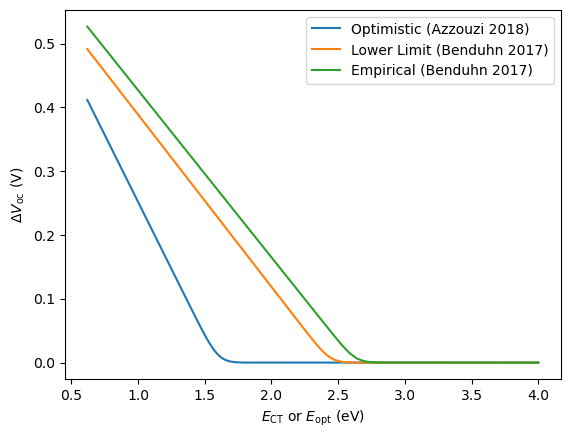

In [127]:
#plt.figure(  dpi = 200 )     # Un-hash for higher quality

for Loss_Type in Non_Radiative_Loss_Types:
    
    plt.plot( Non_Radiative_Loss_Data[ Non_Radiative_Loss_Data.columns[ 0 ] ],
             
             Non_Radiative_Loss_Data[ Loss_Type ],
            
             label = Loss_Type )
    
plt.ylabel( '$\\Delta V_\mathrm{oc}$ (V)')

plt.xlabel( '$E_\mathrm{CT}$ or $E_\mathrm{opt}$ (eV)' )

plt.legend()

#plt.yscale( 'log' )   # Un-hash to plot on a log scale

plt.show()

<br/><br/>
For the smallest optical gaps, these non-radiative losses follow can be modelled by a linear slope of the form $\Delta V_\mathrm{oc}=mE_\mathrm{g}+c$, where $m$ is the gradient of the slope and $c$ is the intercept. A function for modelling this linear graph is defined as:
<br/><br/>

In [128]:
def Linear_Delta_V_oc( E_g , m , c ) :
    
    """Modelt the open-circuit voltage loss as a straight line."""
    
    return m * E_g + c

<br/><br/>
For each of the non-radiative loss types, these gradients and intercepts are now determined using SciPy's 'curve_fit' tool:
<br/><br/>

In [129]:
Linear_Gradients = {}

Linear_Intercepts = {}

for Loss_Type in Non_Radiative_Loss_Types:
    
    E_gs = list( Non_Radiative_Loss_Data[ Non_Radiative_Loss_Data.columns[ 0 ] ] )[ ::-1 ]   # [ ::-1 ] for increasing E_g 
    
    Delta_V_ocs = list( Non_Radiative_Loss_Data[ Loss_Type ] )[ ::-1 ]
    
    Sampled_E_gs = [ E_gs[ i ] for i in range( len( E_gs ) ) if Delta_V_ocs[ i ] > 0.1 ]
    
    Sampled_Delta_V_ocs = [ Delta_V_oc for Delta_V_oc in Delta_V_ocs if Delta_V_oc > 0.1 ]

    Optimal_Parameters , Covariance = curve_fit(
    
        Linear_Delta_V_oc,
    
        Sampled_E_gs,
    
        Sampled_Delta_V_ocs )
    
    Linear_Gradients[ Loss_Type ] = Optimal_Parameters[ 0 ]
    
    Linear_Intercepts[ Loss_Type ] = Optimal_Parameters[ 1 ]

<br/><br/>
The full non-radiative open-circuit voltage loss may be modelled using the following function:
<br/><br/>
<a id="Delta_V_oc"></a>
$$\tag{25}
\Delta V_\mathrm{oc, non-rad}=A\frac{(B-E_\mathrm{g})}{1-\exp\left(-C[B-E_\mathrm{g}]\right)},
$$
<br/><br/>
where $A=-m$, the gradient of the slope in the linear regime, and $B=-\frac{c}{m}$. In the limit that the energetic gap is large, Equation ([25](#Delta_V_oc)) reduces to
<br/><br/>
<a id="Delta_V_oc_approx"></a>
$$\tag{26}
\Delta V_\mathrm{oc, non-rad}\approx A(E_\mathrm{g}-B)\exp\left(-C[E_\mathrm{g}-B]\right)= Ay\exp\left(-Cy\right),
$$
<br/><br/>
where $y=E_\mathrm{g}-B$. The parameters $A$ and $B$ are determined for each of the loss types below:
<br/><br/>

In [130]:
As = { Loss_Type : -Linear_Gradients[ Loss_Type ] for Loss_Type in Non_Radiative_Loss_Types }

Bs = { Loss_Type : -Linear_Intercepts[ Loss_Type ]/Linear_Gradients[ Loss_Type ] for Loss_Type in Non_Radiative_Loss_Types }

<br/><br/>
The parameters are then used with the following function to determine $C$. Before this, a function is defined for fitting the data:
<br/><br/>

In [131]:
def ln_NR_V_oc_Loss_Large_Eg_Approx( y , A , C ):
    
    """Compute the logarithm of the non-radiative open-circuit voltage loss in the large gap approximation."""
    
    return log( A * y ) - C * y

<br/><br/>
With the above function defined, the non-radiative open-circuit voltage losses models can be parameterised:
<br/><br/>

In [132]:
Cs = {}

for Loss_Type in Non_Radiative_Loss_Types:
    
    E_gs = list( Non_Radiative_Loss_Data[ Non_Radiative_Loss_Data.columns[ 0 ] ] )[ ::-1 ]   # [ ::-1 ] for increasing E_g 
    
    Delta_V_ocs = list( Non_Radiative_Loss_Data[ Loss_Type ] )[ ::-1 ]
    
    Sampled_E_gs = [ E_gs[ i ] for i in range( len( E_gs ) ) if Delta_V_ocs[ i ] < 1e-7 ]
    
    Sampled_Delta_V_ocs = [ Delta_V_oc for Delta_V_oc in Delta_V_ocs if Delta_V_oc < 1e-7 ]
    
    A = As[ Loss_Type ]
    
    B = Bs[ Loss_Type ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Apply Curve Fit with Parameter A Fixed to Very Small Bounds (to Prevent it from Varying)
    #-----------------------------------------------------------------------------------------------------------------------

    Small_Bound = 1E-14
    
    Optimal_Parameters , Covariance = curve_fit(
    
        ln_NR_V_oc_Loss_Large_Eg_Approx,
    
        array( Sampled_E_gs ) - B,
    
        log( array( Sampled_Delta_V_ocs ) ),
    
        bounds = ( ( A - Small_Bound , - inf ) , ( A + Small_Bound , inf ) ) )
    
    Cs[ Loss_Type ] = Optimal_Parameters[ -1 ]

<br/><br/>
The non-radiative loss parameters are then compiled into a dictionary for each loss type - this can be used to estimate the non-radiative open circuit loss at any bandgap using Equation ([25](#Delta_V_oc)):
<br/><br/>

In [133]:
Non_Radiative_Loss_Parameters = { Loss_Type : [ As[ Loss_Type ] , Bs[ Loss_Type ] , Cs[ Loss_Type ] ] 
                                 
                                 for Loss_Type in Non_Radiative_Loss_Types }

<br/><br/>
The parameters are used by the following function to estimate the non-radiative loss in a given model:
<br/><br/>

In [134]:
def Non_Radiative_Open_Circuit_Voltage_Loss( E_g , Loss_Type ):
    
    """Determine the open-circuit voltage loss at a given bandgap using the A, B, and C parameter for that loss type."""
    
    A, B, C = Non_Radiative_Loss_Parameters[ Loss_Type ]
    
    return A * ( B - E_g ) / ( 1 - exp( - C * ( B - E_g ) ) )

<br/><br/>
A widget for specifying the non-radiative loss is defined below:
<br/><br/>

In [135]:
Non_Rad_Loss_Widget = FloatText( 
    
    value = 0, 
    
    min = 0, 
    
    description = 'Non-Radiative Loss (V):',

    style = { 'description_width' : 'initial' } )

<a id="Fitting_NR_Loss_Estimation_Parabola"></a>
#### 4.2.2. Non-Radiative Loss Using Parabolic Model
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Another realistic model for non-radiative losses based on the data of Ullbrich et al. (Ullbrich, S., et al., _Nature Materials_, __2019__. 18(5): p. 459-464. https://www.nature.com/articles/s41563-019-0324-5; plotted in __Figure 4a__ in the manuscript this computational tool accompanies), 
<br/><br/>
$$\tag{27}
\Delta V_\mathrm{oc,non-rad} \approx \begin{cases}
 0.123 E_\mathrm{g}^2 - 0.64E_\mathrm{g} + 0.927, & \text{ if } E_\mathrm{g}\leq2.60\,\mathrm{eV}.\\
0.0945, & \text{ otherwise. }
\end{cases}
$$
<br/><br/>
This equation is encoded using the following Python function:
<br/><br/>

In [136]:
def Empirical_NR_V_oc_Loss_Ullbrich( E_g ):
    
    """Based on the results of Ullbrich, S., Benduhn, J., Jia, X. et al. Emissive and charge-generating donor–acceptor 
    
    interfaces for organic optoelectronics with low voltage losses. Nat. Mater. 18, 459–464 (2019). 
    
    https://doi.org/10.1038/s41563-019-0324-5"""
    
    if E_g <= 2.601:
    
        return 0.123 * E_g ** 2 - 0.64 * E_g + 0.927 
 
    else: 
        
        return 0.0945

This data is loaded using:

In [137]:
Ullbrich_Data_Path = path.join( Current_Working_Directory, 'Additional_Supporting_Data' )

Ullbrich_Data_Path = path.join( Ullbrich_Data_Path, 'Ullbrich_NR_Data.txt' )

Ullbrich_E_CTs = []

Ullrbich_Delta_V_oc_Nrs = []

with open( Ullbrich_Data_Path, 'r' ) as File:
    
    for Line in File:
        
        E_CT, Delta_V_oc_Nr = Line.split( '\t' )
        
        Ullbrich_E_CTs.append( E_CT )
        
        Ullrbich_Delta_V_oc_Nrs.append( Delta_V_oc_Nr )
        
    File.close()
    
Ullbrich_E_CTs = [ float( E_CT ) for E_CT in Ullbrich_E_CTs[ 1: ] ]

Ullrbich_Delta_V_oc_Nrs = [ float( Delta_V_oc_nr ) for Delta_V_oc_nr in Ullrbich_Delta_V_oc_Nrs[ 1: ] ]

<a id="Curve_Labels"></a>
### 4.3. Graph Labels
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, a variety of labels are defined for the output parameters of the simulations. 
<br/><br/>

In [138]:
Curve_Types = ['J_sc', 'J_0', 'V_oc', 'V_oc_rad', 'V_mpp', 'J_mpp', 'P_mpp', 'FF', 'PCE' ]

<br/><br/>
For each of these curve types, a display name is defined (to make the generated graphs more aesthetically appealing):
<br/><br/>

In [139]:
Display_Names = { 'J_sc' : '$J_\mathrm{sc}$',
                 
               'J_0' : '$J_0$',
                 
               'V_oc' : '$V_\mathrm{oc}$', 
                 
               'V_oc_rad' : '$V_\mathrm{oc}^\mathrm{rad}$',
                 
               'V_mpp': '$V_\mathrm{mpp}$', 
                 
               'J_mpp': '$J_\mathrm{mpp}$',
                 
               'P_mpp': '$P_\mathrm{mpp}$', 
                 
               'FF' : '$\mathrm{FF}$', 
                 
               'PCE' : '$\mathrm{PCE}$' }

<br/><br/>
Moreover, the units of each parameter is defined using:
<br/><br/>

In [140]:
Curve_Units = { 'J_sc' : '$\mathrm{mA}\cdot\mathrm{cm}^{-2}$',
               
               'J_0' : '$\mathrm{mA}\cdot\mathrm{cm}^{-2}$',
               
               'V_oc' : 'V', 
               
               'V_oc_rad' : 'V',
               
               'V_mpp': 'V', 
               
               'J_mpp': '$\mathrm{mA}\cdot\mathrm{cm}^{-2}$',
               
               'P_mpp': '$\mathrm{mW}\cdot\mathrm{cm}^{-2}$', 
               
               'FF' : '', 
               
               'PCE' : '' }

<br/><br/>
Finally, full labels are defined for each of the parameters (using their display names and units):
<br/><br/>

In [141]:
Full_Curve_Labels = { Key : Display_Names[ Key ] + ' (' + Curve_Units[ Key ] + ')' for Key in Curve_Types }

Full_Curve_Labels[ 'EQE' ] = 'EQE'

Full_Curve_Labels[ 'Delta_V_oc_nr' ] = '$\\Delta V_\mathrm{oc}^\mathrm{nr}$ (V)'

<br/><br/>
Following this, lists containing the labels for saving the data (e.g., to Excel files) are specified, starting with the column titles:
<br/><br/>

In [142]:
Column_Titles = [ 'E_opt', 
                 
                 'J_sc', 
                 
                 'J_0', 
                 
                 'V_oc', 
                 
                 'V_mpp', 
                 
                 'J_mpp', 
                 
                 'P_mpp', 
                 
                 'FF', 
                 
                 'PCE' ]

<br/><br/>
Followed by the column units:
<br/><br/>

In [143]:
Column_Units_Dictionary = { 
    
    'Irradiance (W/m2)' : 'W/m2',
    
    'Irradiance (mW/cm2)' : 'mW/cm2',
    
    'Illuminance (lx)' : 'lx',
    
    'E_opt' : 'eV',
    
    'E_lower' : 'eV',

    'J_sc' : 'mA/cm2',

    'J_0' : 'mA/cm2',

    'V_oc' : 'V',
    
    'V_oc_rad' : 'V',

    'Delta_V_oc_nr' : 'V',

    'V_mpp' : 'V',

    'J_mpp' : 'mA/cm2',

    'P_mpp' : 'mW/cm2',

    'FF' : '',

    'PCE' : '' }

<a id="Data_Compiler"></a>
### 4.4. Data Compiler
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, a function is defined for compiling the analysed data (to be used by the simulating tools):
<br/><br/>

In [144]:
def Analysed_Data_Compiler( Analysed_Data ):
    
    """Compile the data according to lux value."""
    
    EQE_Spectra = list( Analysed_Data.keys() )
    
    Intensity_Values = list( Analysed_Data[ EQE_Spectra[ 0 ] ].keys() )
    
    Compiled_Analysed_Data = { JV_Parameter : 
                              
        { EQE_Spectrum :
            
            [ Analysed_Data[ EQE_Spectrum ][ Intensity ][ JV_Parameter ] for Intensity in Intensity_Values ] 
            
            for EQE_Spectrum in EQE_Spectra }
                              
        for JV_Parameter in Curve_Types }
    
    return Intensity_Values , Compiled_Analysed_Data

<a id="EQE_Simulator"></a>
### 4.5. Sub-Gap Photovoltaic Quantum Efficiency Simulator 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In the simulated $\mathrm{EQE}_\mathrm{PV}$ component of the tool, the photvoltaic quantum efficiency may be modelled in three ways. Firstly, it may be modelled as a step function with some above-gap and below-gap value, it may be modelled as a pseudo-step function (with an exponential tail), or it may be modelled using energetic disorder-dependent exciton absorption (Kaiser, C., et al.  _Nat Commun_ 12, 3988 (__2021__), https://www.nature.com/articles/s41467-021-24202-9; Kay, A., et al., _Adv. Funct. Mater._ __2022__, 32, 2113181, https://onlinelibrary.wiley.com/doi/full/10.1002/adfm.202113181). 
<a id="SQ_EQE_Simulator"></a>
#### 4.5.1. Step Function Photovoltaic Quantum Efficiency Simulator 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The first of these models for the photovoltaic quantum efficiencies is a step function simulator (used to calculate the Shockley-Queisser limit), where all photon of energy greater than some threshold bandgap ($E_\mathrm{opt}$) generate an electron-hole pair at efficiency $\mathrm{EQE}_{\mathrm{max}}$, whereas photons of energy less than the threshold bandgap generate at efficiency $\mathrm{EQE}_\mathrm{min}$:
<br/><br/>
<a id="SQ_abs"></a>
$$\tag{28}
\mathrm{EQE}_\mathrm{PV}^\mathrm{SQ}(E)=\begin{cases} 
\mathrm{EQE}_\mathrm{max} , \mathrm{\quad if    \quad  } E\geq E_\mathrm{opt},\\
\mathrm{EQE}_\mathrm{min}, \mathrm{\quad otherwise. \quad}
\end{cases}
$$
<br/><br/>
In the Shockley-Queisser limit, the above-gap photovoltaic quantum efficiency $\mathrm{EQE}_\mathrm{max}=1$ and the below-gap photovoltaic quantum efficiency $\mathrm{EQE}_\mathrm{min}=0$. These values are left arbitrary here such that the User may customise them. Equation ([25](#SQ_abs)) is encoded using:
<br/><br/>

In [145]:
def SQ_EQE_Simulator( Energies , Energetic_Gap , Below_Gap_EQE , Above_Gap_EQE ):
    
    """Simulate an EQE sppectrum for a list of energies using values for the above-gap and below-gap EQEs (for the Shockley-
    
    Queisser limit)."""
    
    return array( [ Above_Gap_EQE if E > Energetic_Gap else Below_Gap_EQE for E in Energies ] )

<a id="Urbach_EQE_Simulator"></a>
#### 4.5.2. Urbach Tail Photovoltaic Quantum Efficiency Simulator 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Next comes a pseudo-step function, where the sub-gap plateau is replaced with an exponential tail; a more realistic model for absorption described in the work of Urbach (Urbach, F., _Physical Review_, __1953__. 92(5): p. 1324-1324, https://journals.aps.org/pr/abstract/10.1103/PhysRev.92.1324). This exponential tail may be characterised with arbitary Urbach energy $E_\mathrm{U}$), giving a total photovoltaic quantum efficiency of the form
<br/><br/>
<a id="Urbach_abs"></a>
$$\tag{29}
\mathrm{EQE}_\mathrm{PV}^\mathrm{U}(E)=
\mathrm{EQE}_\mathrm{max}\begin{cases} 
1 , \mathrm{\quad if    \quad  } E\geq E_\mathrm{opt},\\
\exp\left(\frac{E-E_\mathrm{opt}}{E_\mathrm{U}}\right) , \mathrm{\quad otherwise. \quad}
\end{cases}
$$
<br/><br/>
In organic semiconductors, a reasonable mininum value for the Urbach energy is the thermal energy, $E_\mathrm{U}=k_\mathrm{B}T$ (Kaiser, C., et al. A universal Urbach rule for disordered organic semiconductors. _Nat Commun_ 12, 3988 (__2021__). https://doi.org/10.1038/s41467-021-24202-9), where $T$ and $k_\mathrm{B}$ were defined in the first section as the temperature and the Boltzmann constant, respectively. In this tool, the temperature is specified using the following widget:
<br/><br/>

In [146]:
Temperature_Widget = FloatText( value = 293.15,
                               
                               description = 'Temperature, T (K):',
                              
                                style = { 'description_width' : 'initial' } )

<br/><br/>
A function for simulating the photovoltaic external quantum efficiency in the sub-gap Urbach tail is defined below:
<br/><br/>

In [147]:
def E_U_Tail_EQE_Simulator( Energies , Energetic_Gap , Urbach_Energy , Above_Gap_EQE ):
    
    """Simulate an EQE spectrum for a list of energies using values for the above-gap EQE and the Urbach energy."""
    
    return Above_Gap_EQE * array( [ 1 if E > Energetic_Gap else 
                                   
                                   exp( ( E - Energetic_Gap ) / Urbach_Energy ) for E in Energies ] )

<a id="SE_EQE_Simulator"></a>
#### 4.5.3. Organic Semiconductor Photovoltaic Quantum Efficiency Simulator 
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Finally, we have a model describing the absorption of organic semiconductors, in which singlet excitons (SEs) with a disordered density of states (of energetic disorder $\sigma_\mathrm{s}$) and a mean optical gap $E_\mathrm{opt}$ have a photovoltaic external quantum efficiency of the form
<br/><br/>
<a id="SE_abs"></a>
$$\tag{30}
\mathrm{EQE}_\mathrm{PV}^\mathrm{SE}(E)=\frac{\mathrm{EQE}_\mathrm{max}}{2}\left\{\exp\left(\frac{E-E_\mathrm{opt}+\frac{\sigma_\mathrm{s}^2}{2k_\mathrm{B}T}}{k_\mathrm{B}T}\right)
\mathrm{erfc}\left(\frac{E-E_\mathrm{opt}+\frac{\sigma_\mathrm{s}^2}{k_\mathrm{B}T}}{\sigma_\mathrm{s}\sqrt{2}}\right)+
\mathrm{erf}\left(\frac{E_\mathrm{opt}}{\sigma_\mathrm{s}\sqrt{2}}\right)+\mathrm{erf}\left(\frac{E-E_\mathrm{opt}}{\sigma_\mathrm{s}\sqrt{2}}\right)\right\}
\approx\frac{\mathrm{EQE}_\mathrm{max}}{2}\left\{\exp\left(\frac{E-E_\mathrm{opt}+\frac{\sigma_\mathrm{s}^2}{2k_\mathrm{B}T}}{k_\mathrm{B}T}\right)
\mathrm{erfc}\left(\frac{E-E_\mathrm{opt}+\frac{\sigma_\mathrm{s}^2}{k_\mathrm{B}T}}{\sigma_\mathrm{s}\sqrt{2}}\right)+
\mathrm{erfc}\left(\frac{E_\mathrm{opt}-E}{\sigma_\mathrm{s}\sqrt{2}}\right)\right\},
$$
<br/><br/>
where $\mathrm{erf}$ and $\mathrm{erfc}$ denote the error function and complementary error function, respectively. This equation is defined using the following function:
<br/><br/>

In [148]:
from scipy.special import erf, erfc

def SE_EQE_Simulator( Energies , Energetic_Gap , Energetic_Disorder , Above_Gap_EQE , Temperature ):
    
    """Simulate an EQE spectrum for a list of energies using values for the above-gap EQE, the energetic gap, the energetic
    
    disorder, and the temperature."""
    
    kT = k * Temperature / e
    
    if Energetic_Disorder != 0:
        
        Exponential_Term = exp( ( Energies - Energetic_Gap + Energetic_Disorder ** 2 / 2 / kT  ) / kT )

        Erfc_Term = erfc( ( Energies - Energetic_Gap + Energetic_Disorder ** 2 / kT  ) / Energetic_Disorder / 2 ** 0.5 )
        
        Erf_Term_1 = erf( ( Energetic_Gap ) / Energetic_Disorder / 2 ** 0.5 )
        
        Erf_Term_2 = erf( ( Energies - Energetic_Gap ) / Energetic_Disorder / 2 ** 0.5 ) 
        
        return Above_Gap_EQE / 2 * ( Exponential_Term * Erfc_Term + Erf_Term_1 + Erf_Term_2 )
        
    else:
        
        return E_U_Tail_EQE_Simulator( Energies , Energetic_Gap , kT , Above_Gap_EQE )

<a id="Data_Saving"></a>
### 4.6 Data Saving and Copying Tools
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Throughout this section, the tools needed to compile and save the data generated by the simulations are defined, starting with the tools for the optical gap-dependent simulations in [Section 4.6.1](#E_opt_Data_Saving) and intensity-dependent simulations in [Section 4.6.2](#I_Data_Saving). Firstly, some functions are defined for compiling the figures of merit in each case:

In [149]:
def Figures_of_Merit_Compiler( Energetic_Gaps , Figures_of_Merit_Dictionary ):
    
    """For energetic gap-dependent simulations, compile the figures of merit."""
    
    Compiled_Figures_of_Merit = { 'E_opt' : list( Energetic_Gaps ) }
    
    for Curve_Type in Curve_Types:
        
        Compiled_Figures_of_Merit[ Curve_Type ] = [
            
            Figures_of_Merit_Dictionary[ Gap ][ Curve_Type ] for Gap in Energetic_Gaps ]
    
    return Compiled_Figures_of_Merit

def Figures_of_Merit_Compiler_vs_Lux( Intensities , Figures_of_Merit_Dictionary ):
    
    """For intensity-dependent simulations, compile the figures of merit."""
    
    Compiled_Figures_of_Merit = { 'Intensities' : list( Intensities ) }
    
    for Curve_Type in Curve_Types:
        
        Compiled_Figures_of_Merit[ Curve_Type ] = [
            
            Figures_of_Merit_Dictionary[ Intensity ][ Curve_Type ] for Intensity in Intensities ]
    
    return Compiled_Figures_of_Merit

<a id="E_opt_Data_Saving"></a>
#### 4.6.1. Saving Data for Optical Gap-Dependent Simulations
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
To save the data, a Pandas data frame must be created because this can be saved directly to an Excel file. This file path must first be generated; the following imports are therefore made:
<br/><br/>

In [150]:
from os import mkdir 
from pandas import DataFrame

<br/><br/>
The following function is now defined for saving the figure-of-merit versus optical gap data to an excel file:
<br/><br/>

In [151]:
def On_Click_Figure_of_Merit_vs_E_opt_Saver( Button ):
    
    """On click, save the compiled figures of merit dictionary as a text document in a Folder."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Output Directory
    #-----------------------------------------------------------------------------------------------------------------------
    
    Output_Directory_Path = path.join( Current_Working_Directory , 'Output_Data' )
    
    if 'Output_Data' not in listdir( Current_Working_Directory ):
        
        mkdir( Output_Directory_Path )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Output Directory (to be converted to a dataframe) and Export Data
    #-----------------------------------------------------------------------------------------------------------------------
    
    Loss_Types_to_Export = list( Compiled_Figures_of_Merit.keys() )

    for Loss_Type in Loss_Types_to_Export:
        
        File_Name = 'Figures_of_Merit_vs_E_opt_' + Loss_Type + '.txt'
        
        File_Path = path.join( Output_Directory_Path , File_Name )
        
        Output_DataFrame = DataFrame( Compiled_Figures_of_Merit[ Loss_Type ] )
    
        #-------------------------------------------------------------------------------------------------------------------
        # Add Column Titles and Units 
        #-------------------------------------------------------------------------------------------------------------------
    
        Title_DataFrame = DataFrame( data = None , 
                                    
                                    columns = Output_DataFrame.columns )
        
        Title_DataFrame.loc[ 0 ] = Output_DataFrame.columns 
        
        Title_DataFrame.loc[ 1 ] = [ Column_Units_Dictionary[ Key ] for Key in Output_DataFrame.columns ] 
        
        with open( File_Path , 'w' ) as Output_File:
            
            savetxt( Output_File , 
                 
                 Title_DataFrame.values , 
                
                 fmt = '%s',
                                 
                 delimiter = '\t', 
                 
                 newline = '\n' )
            
        Output_File.close()
        
        #-------------------------------------------------------------------------------------------------------------------
        # Save Data
        #-------------------------------------------------------------------------------------------------------------------
    
        with open( File_Path , 'a' ) as Output_File:
            
            savetxt( Output_File , 
                 
                 Output_DataFrame.values , 
                                 
                 delimiter = '\t', 
                 
                 newline = '\n' )
            
        Output_File.close()

<a id="I_Data_Saving"></a>
#### 4.6.2. Saving Data for Intensity-Dependent Simulations
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In a similar way to the above function, the following function will save the figures-of-merit for intensity-dependent simulations:
<br/><br/>

In [152]:
def On_Click_Figure_of_Merit_vs_Intensity_Saver( Button ):
    
    """On click, save the compiled figures of merit dictionary as a text document in a Folder."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Output Directory
    #-----------------------------------------------------------------------------------------------------------------------
    
    Output_Directory_Path = path.join( Current_Working_Directory , 'Output_Data' )
    
    if 'Output_Data' not in listdir( Current_Working_Directory ):
        
        mkdir( Output_Directory_Path )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Output Directory and Export Data
    #-----------------------------------------------------------------------------------------------------------------------
    
    Loss_Types_to_Export = list( Compiled_Figures_of_Merit_vs_Intensity.keys() )

    for Loss_Type in Loss_Types_to_Export:
        
        File_Name = 'Figures_of_Merit_vs_Intensity_' + Loss_Type + '.txt'
        
        File_Path = path.join( Output_Directory_Path , File_Name )
        
        Output_DataFrame = DataFrame( Compiled_Figures_of_Merit_vs_Intensity[ Loss_Type ] )
    
        #-------------------------------------------------------------------------------------------------------------------
        # Add Column Titles and Units 
        #-------------------------------------------------------------------------------------------------------------------
    
        Title_DataFrame = DataFrame( data = None , 
                                    
                                    columns = Output_DataFrame.columns )
        
        Title_DataFrame.loc[ 0 ] = Output_DataFrame.columns 
        
        Title_DataFrame.loc[ 1 ] = [ Column_Units_Dictionary[ Intensity_Type.value ] ] + [ 
            
            Column_Units_Dictionary[ Key ] for Key in list( Output_DataFrame.columns )[ 1: ] ] 
        
        savetxt( File_Path , 
                 
                 Title_DataFrame.values , 
                
                 fmt = '%s',
                                 
                 delimiter = '\t', 
                 
                 newline = '\n' )
        
        #-------------------------------------------------------------------------------------------------------------------
        # Save Data
        #-------------------------------------------------------------------------------------------------------------------
    
        with open( File_Path , 'a' ) as Output_File:
            
            savetxt( Output_File , 
                 
                 Output_DataFrame.values , 
                                 
                 delimiter = '\t', 
                 
                 newline = '\n' )
            
        Output_File.close()

<a id="E_opt_Data_Copying"></a>
#### 4.6.3. Copying Data for Optical Gap-Dependent Simulations
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Following this, functions are defined for optical gap-dependent copying data (to the User's clipboard), allowing the data to be readily pasted into another program (like, e.g., Excel). These functions rely on the following function for copying Python arrays to the clipboard:
<br/><br/>

In [153]:
import win32clipboard as clipboard

def toClipboard( Array ):
    
    """Copies an array into a string format acceptable by Excel. Columns separated by \t, rows separated by \n. From
    
    https://stackoverflow.com/questions/22488566/how-to-paste-a-numpy-array-to-excel"""
    
    # Create string from array
    
    Line_Strings = []
    
    for line in Array:
    
        Line_Strings.append( "\t".join( line.astype( str ) ).replace( "\n" , "" ) )
    
    Array_String = "\r\n".join( Line_Strings )

    # Put string into clipboard (open, clear, set, close)
    
    clipboard.OpenClipboard()
    
    clipboard.EmptyClipboard()
    
    clipboard.SetClipboardText( Array_String )
    
    clipboard.CloseClipboard()

<br/><br/>
The following function can then be used to copy optical gap-dependent data to the clipboard (for the simulated $\mathrm{EQE}_\mathrm{PV}$ case). It identifies how many loss types the user has enabled, before creating an output array containing the headers, the units, the loss types, and the data (including the optical gap data): 
<br/><br/>

In [154]:
def On_Click_E_opt_Dep_Data_to_Clipboard_Copier( Button ):
    
    """Copy E_opt-dependent data to clipboard."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Prepare Output Array
    #-----------------------------------------------------------------------------------------------------------------------    
    
    Loss_Types = list( Compiled_Figures_of_Merit.keys() ) 
    
    Number_of_Entries = len( Compiled_Figures_of_Merit[ Loss_Types[ 0 ] ].keys() )
    
    Array_Width = Number_of_Entries * len( Loss_Types )
    
    Array_Length = len( Compiled_Figures_of_Merit[ Loss_Types[ 0 ] ][ 'E_opt' ] )
    
    Output_Array = zeros( [ Array_Length , Array_Width ] )
    
    Header_Array = []
    
    Title_Array = []
    
    Unit_Array = []
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Populate Output Array
    #-----------------------------------------------------------------------------------------------------------------------        
    
    for i in range( len( Loss_Types ) ): 
        
        Data_Set_i = Compiled_Figures_of_Merit[ Loss_Types[ i ] ]
        
        Keys_i = list( Data_Set_i.keys() )
        
        for j in range( Number_of_Entries ):
            
            Header_Array.append( Loss_Types[ i ] )
            
            Key_j = Keys_i[ j ]
            
            Title_Array.append( Key_j )
            
            Unit_Array.append( Column_Units_Dictionary[ Key_j ] )
            
            Output_Array[ : , Number_of_Entries * i + j ] = Data_Set_i[ Key_j ]
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Copy Output Array to Clipboard
    #-----------------------------------------------------------------------------------------------------------------------    
        
    New_Output_Array = concatenate( ( 
        
        array( [ Title_Array , Unit_Array , Header_Array ] ),
        
        Output_Array ) )
    
    toClipboard( New_Output_Array )

<br/><br/>
On the other hand, the function that comes next copies optical gap-dependent data to the clipboard in the case of experimental  $\mathrm{EQE}_\mathrm{PV}$. It identifies how many loss types the user has enabled, before creating an output array containing the headers, the units, the loss types, and the data (including the optical gap data): 
<br/><br/>

In [155]:
def On_Click_EQE_Versus_E_Lower_to_Clipboard_Copier( Button ):
    
    """Copy E_opt-dependent data to clipboard."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Prepare Output Array
    #-----------------------------------------------------------------------------------------------------------------------        
        
    Key = Button.style._view_name
        
    Limit_Dep_Figures_of_Merit = Limit_Dep_Figures_of_Merits[ Key ]

    Column_Titles = list( Limit_Dep_Figures_of_Merit.keys() )
    
    Array_Width = len( Column_Titles )
    
    Array_Length = len( Limit_Dep_Figures_of_Merit[ Column_Titles[ 0 ] ] )
    
    Output_Array = zeros( [ Array_Length , Array_Width ] )
    
    Header_Array = []
    
    Title_Array = []
    
    Unit_Array = []
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Populate Output Array
    #-----------------------------------------------------------------------------------------------------------------------            
    
    for j in range( Array_Width ):
        
        Column_Title = Column_Titles[ j ]
            
        Header_Array.append( Key )
            
        Title_Array.append( Column_Title )
        
        if Column_Titles[ j ] == 'Intensity':
            
            Unit_Array.append( Intensity_Type.value )
            
        else:
            
            Unit_Array.append( Column_Units_Dictionary[ Column_Title ] )
            
        Output_Array[ : , j ] = Limit_Dep_Figures_of_Merit[ Column_Title ]
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Copy Output Array to Clipboard
    #-----------------------------------------------------------------------------------------------------------------------        
            
    New_Output_Array = concatenate( ( 
        
        array( [ Title_Array , Unit_Array , Header_Array ] ),
        
        Output_Array ) )
    
    toClipboard( New_Output_Array )

<a id="I_Data_Copying"></a>
#### 4.6.4. Copying Data for Intensity-Dependent Simulations
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this sub-section, functions are defined for copying intensity-dependent data (to the User's clipboard), allowing the data to be readily pasted into another program (like, e.g., Excel). These functions rely on the following function for copying Python arrays to the clipboard:
<br/><br/>

In [156]:
def On_Click_Intensity_Dep_Data_to_Clipboard_Copier( Button ):
    
    """Copy Intensity-dependent data to clipboard."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Prepare Output Array
    #-----------------------------------------------------------------------------------------------------------------------            
    
    Loss_Types = list( Compiled_Figures_of_Merit_vs_Intensity.keys() ) 
    
    Number_of_Entries = len( Compiled_Figures_of_Merit_vs_Intensity[ Loss_Types[ 0 ] ].keys() )
    
    Array_Width = Number_of_Entries * len( Loss_Types )
    
    Array_Length = len( Compiled_Figures_of_Merit_vs_Intensity[ Loss_Types[ 0 ] ][ 'Intensities' ] )
    
    Output_Array = zeros( [ Array_Length , Array_Width ] )
    
    Header_Array = []
    
    Title_Array = []
    
    Unit_Array = []
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Populate Output Array
    #-----------------------------------------------------------------------------------------------------------------------            
    
    for i in range( len( Loss_Types ) ): 
        
        Data_Set_i = Compiled_Figures_of_Merit_vs_Intensity[ Loss_Types[ i ] ]
        
        Keys_i = list( Data_Set_i.keys() )
        
        for j in range( Number_of_Entries ):
            
            Header_Array.append( Loss_Types[ i ] )
            
            Key_j = Keys_i[ j ]
                
            Title_Array.append( Key_j )
            
            if Key_j == 'Intensities':
            
                Unit_Array.append( Column_Units_Dictionary[ Intensity_Type.value ] )
                
            else:
                
                Unit_Array.append( Column_Units_Dictionary[ Key_j ] )
            
            Output_Array[ : , Number_of_Entries * i + j ] = Data_Set_i[ Key_j ]
            
    #-----------------------------------------------------------------------------------------------------------------------
    # Copy Output Array to Clipboard
    #-----------------------------------------------------------------------------------------------------------------------                    
    
    New_Output_Array = concatenate( ( 
        
        array( [ Title_Array , Unit_Array , Header_Array ] ),
        
        Output_Array ) )
    
    toClipboard( New_Output_Array )  

<br/><br/>
Where the above function copied intensity-dependent data in the simulated $\mathrm{EQE}_{\mathrm{PV}}$ case, the below function copies data in the experimental $\mathrm{EQE}_{\mathrm{PV}}$ case:
<br/><br/>

In [157]:
def On_Click_EQE_Versus_Intensity_to_Clipboard_Copier( Button ):
    
    """Copy E_opt-dependent data to clipboard."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Prepare Output Array
    #-----------------------------------------------------------------------------------------------------------------------                
    
    Key = Button.style._view_name
    
    Intensity_Dep_Figures_of_Merit = Intensity_Dep_Figures_of_Merits[ Key ]

    Column_Titles = list( Intensity_Dep_Figures_of_Merit.keys() )
    
    Array_Width = len( Column_Titles )
    
    Array_Length = len( Intensity_Dep_Figures_of_Merit[ Column_Titles[ 0 ] ] )
    
    Output_Array = zeros( [ Array_Length , Array_Width ] )
    
    Header_Array = []
    
    Title_Array = []
    
    Unit_Array = []
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Populate Output Array
    #-----------------------------------------------------------------------------------------------------------------------            
    
    for j in range( Array_Width ):
        
        Column_Title = Column_Titles[ j ]
            
        Header_Array.append( Key )
            
        Title_Array.append( Column_Title )
        
        if Column_Titles[ j ] == 'Intensity':
            
            Unit_Array.append( Intensity_Type.value )
            
        else:
            
            Unit_Array.append( Column_Units_Dictionary[ Column_Title ] )
            
        Output_Array[ : , j ] = Intensity_Dep_Figures_of_Merit[ Column_Title ]
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Copy Output Array to Clipboard
    #-----------------------------------------------------------------------------------------------------------------------                    
        
    New_Output_Array = concatenate( ( 
        
        array( [ Title_Array , Unit_Array , Header_Array ] ),
        
        Output_Array ) )
    
    toClipboard( New_Output_Array )        

<a id="ControlFunctions"></a>
### 4.7. Control Functions
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The functions defined in this section are, by far, the most involved functions of the lot. They control the simulations, update the interface, and store the data. This section starts with the functions that control the simulated $\mathrm{EQE}_{\mathrm{PV}}$ case in [Section 4.7.1.](#ControlFunctionSimEQE), which is followed by the functions that control the experimental $\mathrm{EQE}_\mathrm{PV}$ case in [Section 4.7.2.](#ControlFunctionExpEQE). 
<a id="ControlFunctionSimEQE"></a>
<br/><br/>
#### 4.7.1. Controlling in the Simulated EQE Case
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The following two functions conduct simulate the figures of merit in the simulated $\mathrm{EQE}_\mathrm{PV}$ case, before storing the data, generating the graphs, and updating the interface. These functions tie together all the other functions of the script - they are therefore the biggest. The first function controls simulations versus the optical gap:
<br/><br/>

In [158]:
def On_Click_Limit_vs_E_opt_Computer( Button ):
    
    """Compute the limits versus optical gap on click of the correct button."""

    #----------------------------------------------------------------------------------------------------------------------
    # Load in Photon Flux Spectrum
    #----------------------------------------------------------------------------------------------------------------------
    
    Spectrum_Type = Spectrum_Selector.value
    
    Energies = linspace( Min_Sim_Energy.value , Max_Sim_Energy.value , N_Sim_Energies.value )[ ::-1 ]
    
    Wavelengths = Energy_Wavelength_Converter( Energies )
    
    #----------------------------------------------------------------------------------------------------------------------
    # Determine Bandgaps
    #----------------------------------------------------------------------------------------------------------------------
    
    Calculation_Types = [ Type for Type in PCE_Calculation_Types if PCE_Calculation_Select_Widgets[ Type ].value == True ] 
    
    Energetic_Gaps = linspace( Min_Energetic_Gap.value , Max_Energetic_Gap.value , N_Energetic_Gaps.value )
    
    global Compiled_Figures_of_Merit
    
    Compiled_Figures_of_Merit = {}
    
    Peak_Performance_Labels = []
    
    for Type in Calculation_Types:
                
        if EQE_Simulation_Type.value == 'Step Function':
            
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Step Function Like
            #--------------------------------------------------------------------------------------------------------------
                
            EQE_Spectra = { Energetic_Gap : 
                           
                array( [ Wavelengths,
                    
                    SQ_EQE_Simulator( Energies, 
                                                             
                        Energetic_Gap, 
                                                             
                        Below_Gap_Value.value,
                                                            
                        Above_Gap_Value.value ) ] )
                           
                for Energetic_Gap in Energetic_Gaps }
        
        if EQE_Simulation_Type.value == 'Urbach Tail (Inorganics & Perovskites)':
        
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Urbach Tail Discontinuous Transition
            #--------------------------------------------------------------------------------------------------------------
                
            if Use_Thermal_Energy_Checkbox.value == True:
                
                    E_U = Temperature_Widget.value * k / e
                    
            else:
                
                E_U = Urbach_Energy_Value.value
                
            EQE_Spectra = { Energetic_Gap : 
                           
                array( [ Wavelengths,
                    
                    E_U_Tail_EQE_Simulator( Energies, 
                                                             
                        Energetic_Gap, 
                                                             
                        E_U,
                                                            
                        Above_Gap_Value.value ) ] )
                           
                for Energetic_Gap in Energetic_Gaps }
            
        if EQE_Simulation_Type.value == 'Exciton Absorption (Organics)':
        
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Excitonic Absorption
            #--------------------------------------------------------------------------------------------------------------
                
            EQE_Spectra = { Energetic_Gap : 
                           
                array( [ Wavelengths,
                    
                    SE_EQE_Simulator( Energies , 
                                     
                        Energetic_Gap, 
                                     
                        Energetic_Disorder_Value.value, 
                                     
                        Above_Gap_Value.value , 
                                     
                        Temperature_Widget.value ) ] )
                           
                for Energetic_Gap in Energetic_Gaps }
        
        #--------------------------------------------------------------------------------------------------------------
        # Determine Non-Radiative Loss
        #--------------------------------------------------------------------------------------------------------------
            
        if Type == 'Radiative Limit':
                
            V_oc_Losses = { Energetic_Gap : 0 for Energetic_Gap in Energetic_Gaps }
            
        else:
        
            if Type == 'Quadratic (Optimistic OPV)':
            
                V_oc_Losses = { Energetic_Gap : 
                           
                    Empirical_NR_V_oc_Loss_Ullbrich( Energetic_Gap ) for Energetic_Gap in Energetic_Gaps  }
                
            else:
                
                if Type == 'Linear Empirical (Benduhn 2017)':
            
                    V_oc_Losses = { Energetic_Gap : 
                           
                        NR_Loss_Linear_Empirical_Benduhn( Energetic_Gap ) for Energetic_Gap in Energetic_Gaps  }                
                else:
                
                    V_oc_Losses = { Energetic_Gap : 
                               
                        Non_Radiative_Open_Circuit_Voltage_Loss( Energetic_Gap , Type )
                               
                        for Energetic_Gap in Energetic_Gaps }
                
        #--------------------------------------------------------------------------------------------------------------
        # Determine New Light Power
        #--------------------------------------------------------------------------------------------------------------

        if Intensity_Type.value == 'Irradiance (W/m2)':
            
            Scale_Factor = 0.1
                        
        if Intensity_Type.value == 'Irradiance (mW/cm2)':
                        
            Scale_Factor = 1
            
        if Intensity_Type.value == 'Illuminance (lx)':
            
            Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ 'V 2-deg' ] / 10 
     
        New_Light_Power = Scale_Factor * Intensity_Input.value
        
        #--------------------------------------------------------------------------------------------------------------
        # Determine Figures of Merit
        #--------------------------------------------------------------------------------------------------------------
        
        Figures_of_Merit = { Energetic_Gap : 
                                
            Data_Analyser( EQE_Spectra[ Energetic_Gap ],
                              
                Spectrum_Type, 
                              
                New_Light_Power,
                          
                Temperature_Widget.value, 
                             
                V_oc_Losses[ Energetic_Gap ] )
                                
            for Energetic_Gap in Energetic_Gaps }
                    
        Compiled_Figures_of_Merit_Local = Figures_of_Merit_Compiler( Energetic_Gaps , Figures_of_Merit )
            
        Compiled_Figures_of_Merit[ Type ] = Compiled_Figures_of_Merit_Local
            
        #--------------------------------------------------------------------------------------------------------------
        # Determine Maximum PCE
        #--------------------------------------------------------------------------------------------------------------
    
        PCEs = Compiled_Figures_of_Merit_Local[ 'PCE' ]
            
        Optimal_Index = where( PCEs == max( PCEs ) )[ 0 ][ 0 ] 
            
        Optimal_Gap = Energetic_Gaps[ Optimal_Index ] 
            
        Loss_Type_Label = Label( value = Type + ':' )
        
        Optimal_Gap_Label = Label( value = 'Optimal Gap = ' + str( Optimal_Gap ) + ' eV')
        
        Max_PCE_Label = Label( value = 'Max PCE = ' + str( PCEs[ Optimal_Index ] ) )
        
        Peak_Performance_Labels.append( 
            
            VBox( [ 
        
                Loss_Type_Label,
            
                Optimal_Gap_Label,
            
                Max_PCE_Label ] ) )
        
    #--------------------------------------------------------------------------------------------------------------
    # Generate Graphs
    #--------------------------------------------------------------------------------------------------------------
    
    global Output_Graphs
    
    Output_Graphs = { Curve_Type : Output() for Curve_Type in Curve_Types }
    
    for Curve_Type in Curve_Types:
                
        if Curve_Units[ Curve_Type ] != '':
                    
            Unit = ' (' + Curve_Units[ Curve_Type ] + ')'
                    
        else:
                    
            Unit = ''
                
        with Output_Graphs[ Curve_Type ]:
                    
            plt.figure( dpi = 100 )
        
            for Type in Calculation_Types:
                    
                plt.plot( Energetic_Gaps , Compiled_Figures_of_Merit[ Type ][ Curve_Type ] , label = Type )
                                        
            plt.ylabel( Display_Names[ Curve_Type ] + Unit  )
            
            plt.xlabel( '$E_\mathrm{g}$ (eV)')
                    
            if Curve_Type == 'J_0':
                        
                plt.yscale( 'log' )
            
            plt.legend()
                    
            plt.show()
                    
        Output_Graphs[ Curve_Type ]
                    
        Output_Graphs[ Curve_Type ].layout.display = 'none'

    #--------------------------------------------------------------------------------------------------------------
    # Output Graphs and Enable Save Data Button
    #--------------------------------------------------------------------------------------------------------------
    
    Save_E_opt_Dep_Data_Button.disabled = False
    
    Copy_Limit_vs_E_opt_Data_to_Clipboard_Button.disabled = False
        
    #Output_Graphs[ Curve_Types[ 0 ] ].layout.display = None
            
    Curve_Control = RadioButtons( 
                
        options = Curve_Types,
            
        value = Curve_Types[ 0 ] )
            
    Compiled_Box = VBox( 
        
        [ Curve_Control ] + 
        
        [ Output_Graphs[ Curve_Type ] for Curve_Type in Curve_Types ] +
    
        [ Label_Box for Label_Box in Peak_Performance_Labels ] )
            
    Curve_Control.observe( On_Change_Output_Graph_Revealer, names = 'value' )
            
    Curve_Control.value = 'PCE'
                
    Varied_E_opt_Box.children = Varied_E_opt_Box.children[ :-1 ]
            
    Varied_E_opt_Box.children = Varied_E_opt_Box.children + ( Compiled_Box , )

<br/><br/>
This first function relies on one further external function to change which graph is currently revealed on the interface:
<br/><br/>


In [159]:
def On_Change_Output_Graph_Revealer( Change ):
    
    """Change which graph is revealed in the simulation pane.""" 
    
    for Curve_Type in Curve_Types:
        
        Output_Graphs[ Curve_Type ].layout.display = 'none'
        
    Output_Graphs[ Change[ 'new' ] ].layout.display = None

<br/><br/>
The second function, on the other hand, controls simulations versus intensity:
<br/><br/>

In [160]:
def On_Click_Limit_vs_Intensity_Computer( Button ):
    
    """Compute the limits versus intensity on click of the correct button."""

    #----------------------------------------------------------------------------------------------------------------------
    # Load in Photon Flux Spectrum
    #----------------------------------------------------------------------------------------------------------------------
    
    Spectrum_Type = Spectrum_Selector.value
    
    Energies = logspace( log10( Min_Sim_Energy.value ) , log10( Max_Sim_Energy.value ) , N_Sim_Energies.value )[ ::-1 ]
    
    Wavelengths = Energy_Wavelength_Converter( Energies )
    
    #----------------------------------------------------------------------------------------------------------------------
    # Find Optimal Gap
    #----------------------------------------------------------------------------------------------------------------------
    
    Calculation_Types = [ Type for Type in PCE_Calculation_Types if PCE_Calculation_Select_Widgets[ Type ].value == True ] 
    
    if Determine_Optimal_Gap_Checkbox.value == False:
    
        Energetic_Gaps = { Type : E_opt_Value.value
                          
                          for Type in Calculation_Types }
        
    else:
        
        Decimal_Places = int( E_opt_Value.value )
        
        Energetic_Gaps = {}
        
        for Type in Calculation_Types:
            
            Best_E_opt = 1.5
        
            for i in range( Decimal_Places ):
            
                Scale_Factor = 1 / 10 ** i      # Scale factor is 1 is i = 0, 1/10 if i = 1 , etc.
            
                Sample_E_opts = linspace( - 1 , 1 , 21 ) * Scale_Factor + Best_E_opt 
                
                Sample_E_opts = array( [ E_opt for E_opt in Sample_E_opts if E_opt > 0 ] ) # Remove any negative gaps
                
                if EQE_Simulation_Type.value == 'Step Function':
            
                    #------------------------------------------------------------------------------------------------------
                    # Simulate Spectra - Step Function Like
                    #------------------------------------------------------------------------------------------------------
                
                    EQE_Spectra = { Energetic_Gap : 
                           
                        array( [ Wavelengths,
                    
                            SQ_EQE_Simulator( Energies, 
                                                             
                                Energetic_Gap, 
                                                             
                                Below_Gap_Value.value,
                                                            
                                Above_Gap_Value.value ) ] )
                           
                        for Energetic_Gap in Sample_E_opts }
        
                if EQE_Simulation_Type.value == 'Urbach Tail (Inorganics & Perovskites)':
        
                    #------------------------------------------------------------------------------------------------------
                    # Simulate Spectra - Urbach Tail Discontinuous Transition
                    #------------------------------------------------------------------------------------------------------
                
                    if Use_Thermal_Energy_Checkbox.value == True:
                
                        E_U = Temperature_Widget.value * k / e
                    
                    else:
                
                        E_U = Urbach_Energy_Value.value
                
                    EQE_Spectra = { Energetic_Gap : 
                           
                        array( [ Wavelengths,
                    
                            E_U_Tail_EQE_Simulator( Energies, 
                                                             
                                Energetic_Gap, 
                                                             
                                E_U,
                                                            
                                Above_Gap_Value.value ) ] )
                           
                        for Energetic_Gap in Sample_E_opts }
            
                if EQE_Simulation_Type.value == 'Exciton Absorption (Organics)':
        
                    #------------------------------------------------------------------------------------------------------
                    # Simulate Spectra - Excitonic Absorption
                    #------------------------------------------------------------------------------------------------------
                
                    EQE_Spectra = { Energetic_Gap : 
                           
                        array( [ Wavelengths,
                    
                            SE_EQE_Simulator( Energies , 
                                     
                            Energetic_Gap, 
                                     
                            Energetic_Disorder_Value.value, 
                                     
                            Above_Gap_Value.value , 
                                     
                            Temperature_Widget.value ) ] )
                           
                        for Energetic_Gap in Sample_E_opts }
        
                #----------------------------------------------------------------------------------------------------------
                # Determine Non-Radiative Loss
                #----------------------------------------------------------------------------------------------------------
            
                if Type == 'Radiative Limit':
                
                    V_oc_Losses = { Energetic_Gap : 0 for Energetic_Gap in Sample_E_opts }
            
                else:
        
                    if Type == 'Quadratic (Optimistic OPV)':
            
                        V_oc_Losses = { Energetic_Gap : 
                           
                        Empirical_NR_V_oc_Loss_Ullbrich( Energetic_Gap ) for Energetic_Gap in Sample_E_opts }
            
                    else:
                    
                        if Type == 'Linear Empirical (Benduhn 2017)':
            
                            V_oc_Losses = { Energetic_Gap : 
                           
                            NR_Loss_Linear_Empirical_Benduhn( Energetic_Gap ) for Energetic_Gap in Energetic_Gaps  }       
                
                        else:
                
                            V_oc_Losses = { Energetic_Gap : 
                               
                            Non_Radiative_Open_Circuit_Voltage_Loss( Energetic_Gap , Type )
                               
                            for Energetic_Gap in Sample_E_opts }
                
                #----------------------------------------------------------------------------------------------------------
                # Determine New Light Power
                #----------------------------------------------------------------------------------------------------------

                if Intensity_Type.value == 'Irradiance (W/m2)':
                            
                    Scale_Factor = 0.1               
            
                if Intensity_Type.value == 'Irradiance (mW/cm2)':
                            
                    Scale_Factor = 1              
            
                if Intensity_Type.value == 'Illuminance (lx)':
                    
                    V_Type = Luminous_Efficiency_Type_Selector.value
        
                    Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ V_Type ] / 10 # Convert to mW/cm2
                                      
                New_Light_Power = Scale_Factor * Intensity_Input.value
        
                #----------------------------------------------------------------------------------------------------------
                # Determine Figures of Merit
                #----------------------------------------------------------------------------------------------------------
        
                Figures_of_Merit = { Energetic_Gap : 
                                
                    Data_Analyser( EQE_Spectra[ Energetic_Gap ],
                              
                        Spectrum_Type, 
                              
                        New_Light_Power,
                                  
                        Temperature_Widget.value, 
                             
                        V_oc_Losses[ Energetic_Gap ] )
                                
                    for Energetic_Gap in Sample_E_opts }
                    
                Compiled_Figures_of_Merit_Local = Figures_of_Merit_Compiler( Sample_E_opts , Figures_of_Merit )
            
                #----------------------------------------------------------------------------------------------------------
                # Determine Maximum PCE
                #----------------------------------------------------------------------------------------------------------
    
                PCEs = Compiled_Figures_of_Merit_Local[ 'PCE' ]
            
                Optimal_Index = where( PCEs == max( PCEs ) )[ 0 ][ 0 ] 
            
                Optimal_Gap = Sample_E_opts[ Optimal_Index ] 
        
                Best_E_opt = Optimal_Gap
            
            Energetic_Gaps[ Type ] = Best_E_opt
                        
    #----------------------------------------------------------------------------------------------------------------------
    # Determine Intensities
    #----------------------------------------------------------------------------------------------------------------------  
    
    Intensities = logspace( log10( Min_Irradiance.value ) , log10( Max_Irradiance.value ) , N_Irradiances.value )
    
    global Compiled_Figures_of_Merit_vs_Intensity
    
    Compiled_Figures_of_Merit_vs_Intensity = {}
    
    for Type in Calculation_Types:
        
        Energetic_Gap = Energetic_Gaps[ Type ]
                
        if EQE_Simulation_Type.value == 'Step Function':
            
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Step Function Like
            #--------------------------------------------------------------------------------------------------------------
                
            EQE_Spectrum = array( [
                
                Wavelengths ,
                
                SQ_EQE_Simulator( Energies, 
                                                             
                    Energetic_Gap, 
                                                             
                    Below_Gap_Value.value,
                                                            
                    Above_Gap_Value.value ) ] )
        
        if EQE_Simulation_Type.value == 'Urbach Tail (Inorganics & Perovskites)':
        
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Urbach Tail Discontinuous Transition
            #--------------------------------------------------------------------------------------------------------------
                
            if Use_Thermal_Energy_Checkbox.value == True:
                
                    E_U = Temperature_Widget.value * k / e
                    
            else:
                
                E_U = Urbach_Energy_Value.value
                
            EQE_Spectrum = array( [
                
                Wavelengths ,
                
                E_U_Tail_EQE_Simulator( Energies, 
                                                             
                    Energetic_Gap, 
                                                             
                    E_U,
                                                            
                    Above_Gap_Value.value ) ] )
            
        if EQE_Simulation_Type.value == 'Exciton Absorption (Organics)':
        
            #--------------------------------------------------------------------------------------------------------------
            # Simulate Spectra - Excitonic Absorption
            #--------------------------------------------------------------------------------------------------------------
                
            EQE_Spectrum = array( [
                
                Wavelengths ,
                
                SE_EQE_Simulator( Energies , 
                                     
                    Energetic_Gap, 
                                     
                    Energetic_Disorder_Value.value, 
                                     
                    Above_Gap_Value.value , 
                                     
                    Temperature_Widget.value ) ] )
        
        #--------------------------------------------------------------------------------------------------------------
        # Determine Non-Radiative Loss
        #--------------------------------------------------------------------------------------------------------------
            
        if Type == 'Radiative Limit':
                
            V_oc_Loss = 0
            
        else:
        
            if Type == 'Quadratic (Optimistic OPV)':
            
                V_oc_Loss = Empirical_NR_V_oc_Loss_Ullbrich( Energetic_Gap )
                
            else:
                
                if Type == 'Linear Empirical (Benduhn 2017)':
            
                    V_oc_Loss = NR_Loss_Linear_Empirical_Benduhn( Energetic_Gap )
      
                else:
                
                    V_oc_Loss = Non_Radiative_Open_Circuit_Voltage_Loss( Energetic_Gap , Type )
                               
        #--------------------------------------------------------------------------------------------------------------
        # Determine New Light Power
        #--------------------------------------------------------------------------------------------------------------

        if Intensity_Type.value == 'Irradiance (W/m2)':
            
            Scale_Factor = 0.1
            
        if Intensity_Type.value == 'Irradiance (mW/cm2)':
                        
            Scale_Factor = 1
            
        if Intensity_Type.value == 'Illuminance (lx)':
            
            V_Type = Luminous_Efficiency_Type_Selector.value
        
            Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ V_Type ] / 10 # Convert to mW/cm2
                 
        Scaled_Intensities = Scale_Factor * Intensities
        
        #--------------------------------------------------------------------------------------------------------------
        # Determine Figures of Merit
        #--------------------------------------------------------------------------------------------------------------
        
        Figures_of_Merit = { Intensities[ i ] : 
                                
            Data_Analyser( EQE_Spectrum,
                              
                Spectrum_Type, 
                              
                Scaled_Intensities[ i ],
                          
                Temperature_Widget.value,
                             
                V_oc_Loss )
                                
            for i in range( len( Intensities ) ) }
                    
        Compiled_Figures_of_Merit_Local = Figures_of_Merit_Compiler_vs_Lux( Intensities , Figures_of_Merit )
            
        Compiled_Figures_of_Merit_vs_Intensity[ Type ] = Compiled_Figures_of_Merit_Local
            
    #--------------------------------------------------------------------------------------------------------------
    # Generate Graphs
    #--------------------------------------------------------------------------------------------------------------
    
    global Output_Graphs_vs_Intensity
    
    Output_Graphs_vs_Intensity = { Curve_Type : Output() for Curve_Type in Curve_Types }
    
    for Curve_Type in Curve_Types:
                
        if Curve_Units[ Curve_Type ] != '':
                    
            Unit = ' (' + Curve_Units[ Curve_Type ] + ')'
                    
        else:
                    
            Unit = ''
                
        with Output_Graphs_vs_Intensity[ Curve_Type ]:
                    
            plt.figure( dpi = 100 )
        
            for Type in Calculation_Types:
                    
                plt.plot( Intensities , Compiled_Figures_of_Merit_vs_Intensity[ Type ][ Curve_Type ] , label = Type )
                                        
            plt.ylabel( Display_Names[ Curve_Type ] + Unit  )
            
            plt.xlabel( Intensity_Type.value )
                    
            if Curve_Type == 'J_0':
                        
                plt.yscale( 'log' )
            
            plt.xscale( 'log' )
            
            plt.legend()
                    
            plt.show()
                    
        Output_Graphs_vs_Intensity[ Curve_Type ]
                    
        Output_Graphs_vs_Intensity[ Curve_Type ].layout.display = 'none'

    #--------------------------------------------------------------------------------------------------------------
    # Output Graphs and Enable Save Data Button
    #--------------------------------------------------------------------------------------------------------------
    
    Save_Intensity_Dep_Data_Button.disabled = False
    
    Copy_Limit_vs_Intensity_Data_to_Clipboard_Button.disabled = False
                    
    Curve_Control = RadioButtons( 
                
        options = Curve_Types,
            
        value = Curve_Types[ 0 ] )
           
    Compiled_Box = VBox( 
        
        [ Curve_Control ] + 
        
        [ Output_Graphs_vs_Intensity[ Curve_Type ] for Curve_Type in Curve_Types ]  )
    
    
    if Determine_Optimal_Gap_Checkbox.value == True:
    
        Loss_Type_Labels = { Loss_Type : Label( value = Loss_Type + ':') for Loss_Type in Calculation_Types }
    
        Best_Energetic_Gap_Labels = { Loss_Type : 
                                 
                                 Label( value = 'E_opt = ' + str( Energetic_Gaps[ Loss_Type ] ) + ' eV' ) 
                                 
                                 for Loss_Type in Calculation_Types }
        
        for Loss_Type in Calculation_Types:
            
            Compiled_Box.children = Compiled_Box.children + ( 
                
                Loss_Type_Labels[ Loss_Type ] , Best_Energetic_Gap_Labels[ Loss_Type ] )

            
    Curve_Control.observe( On_Change_Output_Graph_vs_Intensity_Revealer, names = 'value' )
            
    Curve_Control.value = 'PCE'
                
    Varied_Intensity_Box.children = Varied_Intensity_Box.children[ :-1 ]
            
    Varied_Intensity_Box.children = Varied_Intensity_Box.children + ( Compiled_Box , )

<br/><br/>
Similar to the previous function, the intensity-dependent graph that is revealed will be controlled by the following external function: 
<br/><br/>

In [161]:
def On_Change_Output_Graph_vs_Intensity_Revealer( Change ):
    
    """Change which graph is revealed in the simulation pane.""" 
    
    for Curve_Type in Curve_Types:
        
        Output_Graphs_vs_Intensity[ Curve_Type ].layout.display = 'none'
        
    Output_Graphs_vs_Intensity[ Change[ 'new' ] ].layout.display = None

<a id="ControlFunctionExpEQE"></a>
<br/><br/>
#### 4.7.2. Controlling in the Experimentally-Determined EQE Case
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the functions that control the simulations in the loaded-in photovoltaic quantum efficiency case are defined. Firstly, two dictionaries are globally defined (such that they can be updated each time the user analyses a spectrum):
<br/><br/>

In [162]:
Limit_Dep_Figures_of_Merits = {}

Intensity_Dep_Figures_of_Merits = {}

<br/><br/>
Following this, a function is defined for conducting simulations with respect to the lower limit of the integral (with respect to photon energy); this is performed by varying the lower limit from data point to data point - no interpolation is performed on the finite data:
<br/><br/>

In [163]:
def On_Click_Lower_Limit_EQE_Data_Analyser( Button ):
    
    """Analyse the experimental EQE data on click of a button."""
    
    Key = Button.style._view_name
    
    Prior_Graph = Lower_Limit_Graph_Specifiers[ Key ].value

    #-----------------------------------------------------------------------------------------------------------------------
    # Load the Data to Analyse
    #-----------------------------------------------------------------------------------------------------------------------
      
    Wavelengths = EQE_Spectra_to_Investigate[ Key ][ 0 ]
    
    Energies = Energy_Wavelength_Converter( Wavelengths )
    
    EQEs = EQE_Spectra_to_Investigate[ Key ][ 1 ]
    
    EQEs = EQE_Scale_Factors[ Key ].value * EQEs

    #-----------------------------------------------------------------------------------------------------------------------
    # Load Widget Choices
    #-----------------------------------------------------------------------------------------------------------------------
    
    Temperature = Temperature_Widgets[ Key ].value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Loss Type
    #-----------------------------------------------------------------------------------------------------------------------
      
    if Non_Radiative_Loss_Selections[ Key ].value == 'Non-Radiative Loss (V):':
        
        NR_Loss = Voltage_Inputs[ Key ].value
        
    if Non_Radiative_Loss_Selections[ Key ].value == 'Electroluminescent Quantum Efficiency:':
        
        NR_Loss = k * Temperature / e * log( Voltage_Inputs[ Key ].value )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Spectrum Type and Power
    #-----------------------------------------------------------------------------------------------------------------------
    
    Spectrum_Type = Spectrum_Selector.value
    
    if Intensity_Type.value == 'Irradiance (W/m2)':
        
        Scale_Factor = 1 / 10 
        
    if Intensity_Type.value == 'Irradiance (mW/cm2)':
        
        Scale_Factor = 1
                
    if Intensity_Type.value == 'Illuminance (lx)':
        
        V_Type = Luminous_Efficiency_Type_Selector.value
        
        Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ V_Type ] / 10 # Convert to mW/cm2

    Light_Power = Scale_Factor * Intensity_Values[ Key ].value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Photon Fluxes
    #-----------------------------------------------------------------------------------------------------------------------
    
    Photon_Fluxes = Photon_Flux_Interpolator( Spectrum_Type , Wavelengths , Light_Power )
    
    BB_Fluxes = Planck_Photon_Flux_Wavelength( Wavelengths , Temperature )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # If one-sun V_oc has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Non_Radiative_Loss_Selections[ Key ].value == 'Experimental Open-Circuit Voltage (V):':
    
        Limit_Dep_Figures_of_Merit = [
        
            One_Sun_V_oc_Data_Analyser( 
                
                array( [ Wavelengths[ :i + 1 ]  , EQEs[ :i + 1 ] ] ), 
            
                Spectrum_Type, 
            
                Light_Power, 
            
                Temperature,
            
                Voltage_Inputs[ Key ].value ) 
    
            for i in range( len( Wavelengths ) ) ]

    #-----------------------------------------------------------------------------------------------------------------------
    # If Non-Radiative Loss or EQE_EL has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
        
    else:
                
        Limit_Dep_Figures_of_Merit = [
        
            Data_Analyser( 
                
                array( [ Wavelengths[ :i + 1 ]  , EQEs[ :i + 1 ] ] ), 
            
                Spectrum_Type, 
            
                Light_Power, 
            
                Temperature,
            
                NR_Loss ) 
    
            for i in range( len( Wavelengths ) ) ]
    
    Current_Curve_Types = list( Limit_Dep_Figures_of_Merit[ 0 ].keys() )     # May Include Delta_V_oc_nr
    
    Limit_Dep_Figures_of_Merit = { Curve_Type :
                                 
        [ Limit_Dep_Figures_of_Merit[ i ][ Curve_Type ] for i in range( len( Wavelengths ) ) ] 
                                 
        for Curve_Type in Current_Curve_Types }
    
    Limit_Dep_Figures_of_Merits[ Key ] = { 'E_lower' : list( Energies ) } | Limit_Dep_Figures_of_Merit
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Graphs
    #-----------------------------------------------------------------------------------------------------------------------
    
    Lower_Limit_Graphs = { Graph_Key : Output() for Graph_Key in Current_Curve_Types }
        
    for Graph_Key in Current_Curve_Types:
        
        with Lower_Limit_Graphs[ Graph_Key ]:
            
            plt.plot( Energies , Limit_Dep_Figures_of_Merit[ Graph_Key ] )
            
            plt.xlabel( 'Lower Limit of Integral, E_lower (eV)' )
            
            plt.ylabel( Full_Curve_Labels[ Graph_Key ] )
            
            plt.show()
            
    for Graph_Key in Current_Curve_Types:
        
        Lower_Limit_Graphs[ Graph_Key ].layout.display = 'none'
        
    Lower_Limit_FoM_Graphs[ Key ] = Lower_Limit_Graphs
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add Graphs to Box
    #-----------------------------------------------------------------------------------------------------------------------
    
    Graph_Selector = Lower_Limit_Graph_Specifiers[ Key ]
    
    Graph_Selector.observe( Lower_Limit_EQE_Figure_of_Merit_Graph_Selection , names = 'value' )
    
    Graph_Selector.options = Graph_Selector.options[ :1 ]
    
    for Curve_Type in Curve_Types:
        
        Graph_Selector.options = Graph_Selector.options + ( Curve_Type, )
        
    if Non_Radiative_Loss_Selections[ Key ].value == 'Experimental Open-Circuit Voltage (V):':
    
        Graph_Selector.options = Graph_Selector.options[ :3 ] + ( 'Delta_V_oc_nr', ) + Graph_Selector.options[ 3: ]
        
    if Prior_Graph in Current_Curve_Types:
        
        Graph_Selector.value = Prior_Graph
        
    Lower_Limit_Graph_Boxes[ Key ].children = Lower_Limit_Graph_Boxes[ Key ].children[ :1 ] + tuple( [ Lower_Limit_Graphs[ Key ] for Key in Current_Curve_Types ] )
    
    Copy_Data_Buttons[ Key ].disabled = False

<br/><br/>
Similarly, at a given lower limit of the integral, the following function will conduct simulations with respect to the intensity of the incident light:
<br/><br/>

In [164]:
def On_Click_Intensity_EQE_Data_Analyser( Button ):
    
    """Analyse the experimental EQE data on click of a button."""
    
    Key = Button.style._view_name
    
    Prior_Graph = Vs_Intensity_Graph_Specifiers[ Key ].value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Load the Data to Analyse
    #-----------------------------------------------------------------------------------------------------------------------
      
    Wavelengths = EQE_Spectra_to_Investigate[ Key ][ 0 ]
    
    Energies = Energy_Wavelength_Converter( Wavelengths )
    
    EQEs = EQE_Spectra_to_Investigate[ Key ][ 1 ]
    
    EQEs = EQE_Scale_Factors[ Key ].value * EQEs
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Trim the Spectra
    #-----------------------------------------------------------------------------------------------------------------------
          
    Lower_Energy = Vs_Intensity_Lower_Limit_Values[ Key ].value
    
    Good_Indices = [ i for i in range( len( Energies ) ) if Energies[ i ] > Lower_Energy ]
    
    Trimmed_Wavelengths = Wavelengths[ Good_Indices ]
    
    Trimmed_Energies = Energies[ Good_Indices ]
    
    Trimmed_EQEs = EQEs[ Good_Indices ]

    #-----------------------------------------------------------------------------------------------------------------------
    # Load Widget Choices
    #-----------------------------------------------------------------------------------------------------------------------
    
    Temperature = Temperature_Widgets[ Key ].value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Loss Type
    #-----------------------------------------------------------------------------------------------------------------------
      
    if Non_Radiative_Loss_Selections[ Key ].value == 'Non-Radiative Loss (V):':
        
        NR_Loss = Voltage_Inputs[ Key ].value
        
    if Non_Radiative_Loss_Selections[ Key ].value == 'Electroluminescent Quantum Efficiency:':
        
        NR_Loss = k * Temperature / e * log( Voltage_Inputs[ Key ].value )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Spectrum Type and Power
    #-----------------------------------------------------------------------------------------------------------------------
    
    Spectrum_Type = Spectrum_Selector.value
    
    if Intensity_Type.value == 'Irradiance (W/m2)':
        
        Scale_Factor = 1 / 10 
        
    if Intensity_Type.value == 'Irradiance (mW/cm2)':
        
        Scale_Factor = 1
                
    if Intensity_Type.value == 'Illuminance (lx)':
        
        V_Type = Luminous_Efficiency_Type_Selector.value
        
        Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ V_Type ] / 10 # Convert to mW/cm2
      
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Light Powers
    #-----------------------------------------------------------------------------------------------------------------------
    
    Intensities_to_Investigate = logspace( 
    
        log10( Min_Irradiance.value ),
    
        log10( Max_Irradiance.value ), 
        
        N_Irradiances.value )
    
    Correct_Units_Intensities = Scale_Factor * Intensities_to_Investigate
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Photon Fluxes
    #-----------------------------------------------------------------------------------------------------------------------
    
    Photon_Fluxes = [ Photon_Flux_Interpolator( Spectrum_Type , Wavelengths , Light_Power )
                     
        for Light_Power in Correct_Units_Intensities ]
    
    BB_Fluxes = Planck_Photon_Flux_Wavelength( Wavelengths , Temperature )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # If one-sun V_oc has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Non_Radiative_Loss_Selections[ Key ].value == 'Experimental Open-Circuit Voltage (V):':
    
        Intensity_Dep_Figures_of_Merit = [
        
            One_Sun_V_oc_Data_Analyser( 
                
                array( [ Trimmed_Wavelengths  , Trimmed_EQEs ] ), 
            
                Spectrum_Type, 
            
                Light_Power, 
            
                Temperature,
            
                Voltage_Inputs[ Key ].value ) 
    
            for Light_Power in Correct_Units_Intensities ]

    #-----------------------------------------------------------------------------------------------------------------------
    # If Non-Radiative Loss or EQE_EL has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
        
    else:
                
        Intensity_Dep_Figures_of_Merit = [
        
            Data_Analyser( 
                
                array( [ Trimmed_Wavelengths  , Trimmed_EQEs ] ), 
            
                Spectrum_Type, 
            
                Light_Power, 
            
                Temperature,
            
                NR_Loss ) 
    
            for Light_Power in Correct_Units_Intensities ]
    
    Current_Curve_Types = list( Intensity_Dep_Figures_of_Merit[ 0 ].keys() )     # May Include Delta_V_oc_nr
    
    Intensity_Dep_Figures_of_Merit = { Curve_Type :
                                 
        [ Intensity_Dep_Figures_of_Merit[ i ][ Curve_Type ] for i in range( len( Correct_Units_Intensities ) ) ] 
                                 
        for Curve_Type in Current_Curve_Types }
    
    Intensity_Dep_Figures_of_Merits[ Key ] = { Intensity_Type.value : list( Intensities_to_Investigate ) } | Intensity_Dep_Figures_of_Merit
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Graphs
    #-----------------------------------------------------------------------------------------------------------------------
    
    Intensity_Graphs = { Graph_Key : Output() for Graph_Key in Current_Curve_Types }
        
    for Graph_Key in Current_Curve_Types:
        
        with Intensity_Graphs[ Graph_Key ]:
            
            plt.plot( Intensities_to_Investigate , Intensity_Dep_Figures_of_Merit[ Graph_Key ] )
            
            plt.xlabel( Intensity_Type.value )
            
            plt.ylabel( Full_Curve_Labels[ Graph_Key ] )
            
            plt.xscale( 'log' )
            
            plt.show()
            
    for Graph_Key in Current_Curve_Types:
        
        Intensity_Graphs[ Graph_Key ].layout.display = 'none'
        
    Intensity_FoM_Graphs[ Key ] = Intensity_Graphs
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add Graphs to Box
    #-----------------------------------------------------------------------------------------------------------------------
    
    Graph_Selector = Vs_Intensity_Graph_Specifiers[ Key ]

    Graph_Selector.observe( Intensity_EQE_Figure_of_Merit_Graph_Selection , names = 'value' )
    
    Graph_Selector.options = Graph_Selector.options[ :1 ]
    
    for Curve_Type in Curve_Types:
        
        Graph_Selector.options = Graph_Selector.options + ( Curve_Type, )
        
    if Non_Radiative_Loss_Selections[ Key ].value == 'Experimental Open-Circuit Voltage (V):':
    
        Graph_Selector.options = Graph_Selector.options[ :3 ] + ( 'Delta_V_oc_nr', ) + Graph_Selector.options[ 3: ]
        
    if Prior_Graph in Current_Curve_Types:
        
        Graph_Selector.value = Prior_Graph
        
    Vs_Intensity_Graph_Boxes[ Key ].children = Vs_Intensity_Graph_Boxes[ Key ].children[ :1 ] + tuple( [ Intensity_Graphs[ Key ] for Key in Current_Curve_Types ] )
    
    Copy_Data_Button_vs_Is[ Key ].disabled = False

<a id="Spectrum_Analysing_Tab_Maker"></a>
#### 4.7.3. Spectrum Analysing Tab Generator
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The final control function generates an $\mathrm{EQE}_{\mathrm{PV}}$ spectrum-analysing tab each time the user loads in a spectrum.
<br/><br/>

In [165]:
def EQE_Spectrum_Analysing_Tab_Generator( EQE_Spectrum_Label ):
    
    """Generate the tab for analysing a given EQE spectrum."""
    
    EQE_Spectrum_Analysing_Tab.layout.display = None
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Load the Data to Generate the Plot 
    #-----------------------------------------------------------------------------------------------------------------------
      
    Wavelengths = EQE_Spectra_to_Investigate[ EQE_Spectrum_Label ][ 0 ]
    
    Energies = Energy_Wavelength_Converter( Wavelengths )
    
    EQEs = EQE_Spectra_to_Investigate[ EQE_Spectrum_Label ][ 1 ]

    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Widget for Specifying Whether the Input Voltage is Experimetnal V_oc, or non-rad V_oc loss, or EQE_EL
    #-----------------------------------------------------------------------------------------------------------------------
    
    Non_Radiative_Loss_Selection = RadioButtons( 
        
        options = Non_Rad_Loss_Calc_Types,
        
        value = Non_Rad_Loss_Calc_Types[ 0 ],
    
        style = { '_view_name' : EQE_Spectrum_Label } )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add to the List
    #-----------------------------------------------------------------------------------------------------------------------
    
    Non_Radiative_Loss_Selections[ EQE_Spectrum_Label ] = Non_Radiative_Loss_Selection
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Tell the Widget to Observe the Function for Changing What the User Input is
    #-----------------------------------------------------------------------------------------------------------------------
    
    Non_Radiative_Loss_Selection.observe( Voltage_Input_Changer , names = 'value' )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Widget for Specifying the "Voltage" Input (Can Be EQE_EL depending on above )
    #-----------------------------------------------------------------------------------------------------------------------
    
    Voltage_Input = FloatText(
    
        value = 0.2,
    
        description = 'Non-Radiative Voltage Loss (V):',
        
        style = { 'description_width' : 'initial' } )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add it to the List
    #-----------------------------------------------------------------------------------------------------------------------
    
    Voltage_Inputs[ EQE_Spectrum_Label ] = Voltage_Input
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Widget for Specifying the Temperature and Add it to the List
    #-----------------------------------------------------------------------------------------------------------------------
    
    Temperature_Widget = FloatText( 
    
        value = 293.15 ,
    
        description = 'Temperature (K):',
    
        style = { 'description_width' : 'initial' } )
    
    Temperature_Widgets[ EQE_Spectrum_Label ] = Temperature_Widget
    
    #-----------------------------------------------------------------------------------------------------------------------
    # EQE Scale factor
    #-----------------------------------------------------------------------------------------------------------------------

    EQE_Scale_Factor = FloatText( 
    
        value = 1,
    
        description = 'EQE Scale Factor:',
    
        style = { 'description_width' : 'initial' } )
    
    EQE_Scale_Factors[ EQE_Spectrum_Label ] = EQE_Scale_Factor
    
    #-----------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------
    # Versus Lower Limit Widgets
    #-----------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Widget for Selecting Which Graph is Shown (Figure-of-Merit Graphs Will be Added Later)
    #-----------------------------------------------------------------------------------------------------------------------

    Lower_Limit_Graph_Specifier = RadioButtons( 
    
        options = [ 'EQE' ],
    
        value = 'EQE',
    
        style = { '_view_name' : EQE_Spectrum_Label } )
    
    Lower_Limit_Graph_Specifiers[ EQE_Spectrum_Label ] = Lower_Limit_Graph_Specifier
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Plot the EQE Spectrum in a Graph and Add Graph to List
    #-----------------------------------------------------------------------------------------------------------------------

    Lower_Limit_EQE_Graph = Output()
    
    with Lower_Limit_EQE_Graph:
        
        plt.plot( Energies , EQEs )
        
        plt.xlabel( 'Photon Energy, $E$ (eV)' )
        
        plt.ylabel( 'EQE' )
        
        plt.show()
    
    Lower_Limit_EQE_Graphs[ EQE_Spectrum_Label ] = Lower_Limit_EQE_Graph 
    
    Vs_Intensity_EQE_Graph = Output()
    
    with Vs_Intensity_EQE_Graph:
        
        plt.plot( Energies , EQEs )
        
        plt.xlabel( 'Photon Energy, $E$ (eV)' )
        
        plt.ylabel( 'EQE' )
        
        plt.show()
    
    Vs_Intensity_EQE_Graphs[ EQE_Spectrum_Label ] = Vs_Intensity_EQE_Graph 
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add Graph to Box, Add Box to List of Graph Boxes
    #-----------------------------------------------------------------------------------------------------------------------
    
    Lower_Limit_Graph_Box = VBox( [ Lower_Limit_EQE_Graph ] )
    
    Lower_Limit_Graph_Boxes[ EQE_Spectrum_Label ] = Lower_Limit_Graph_Box
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Two Panels - First One With Overall Input Parameters , the Other with Different Simulation Types
    #-----------------------------------------------------------------------------------------------------------------------
    
    Upper_Box = VBox( [
        
        VBox( [ 
            
            Spectrum_Selector_Box,
        
            Temperature_Widget,
        
            EQE_Scale_Factor,
        
            Non_Radiative_Loss_Selection,
        
            Voltage_Input
        
        ] ) ] )
            
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Two Panels - Second One with Different Simulation Types (vs lower limit and vs intensity)
    #-----------------------------------------------------------------------------------------------------------------------
  
    Intensity_Value = FloatText( 
        
        value = 100,
    
        description = Intensity_Type.value,
    
        style = { 'description_width' : 'initial' } )
    
    Intensity_Values[ EQE_Spectrum_Label ] = Intensity_Value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Button for Analysing the Data and Add it to the List
    #-----------------------------------------------------------------------------------------------------------------------

    Analyse_Lower_Limit_Data_Button = Button( 
        
        description = 'Analyse Data' , 
    
        style = { '_view_name' : EQE_Spectrum_Label } )
    
    if Spectrum_Selector.value == None:
        
        Analyse_Lower_Limit_Data_Button.disabled = True
    
    Analyse_Lower_Limit_Data_Button.on_click( On_Click_Lower_Limit_EQE_Data_Analyser )

    Analyse_Lower_Limit_Data_Buttons[ EQE_Spectrum_Label ] = Analyse_Lower_Limit_Data_Button
    
    Copy_Data_Button = Button( 
        
        description = 'Copy to Clipboard',
        
        style = { '_view_name' : EQE_Spectrum_Label },
    
        disabled = True )
    
    Copy_Data_Button.on_click( On_Click_EQE_Versus_E_Lower_to_Clipboard_Copier )
    
    Copy_Data_Buttons[ EQE_Spectrum_Label ] = Copy_Data_Button
        
    Lower_Box_vs_E_lower = VBox( [ 
            
        Intensity_Type,
            
        Intensity_Value,
            
        HBox( [ Analyse_Lower_Limit_Data_Button, Copy_Data_Button ] ),
        
        Spectrum_Not_Selected_Warning,
            
        Lower_Limit_Graph_Specifier,
            
        Lower_Limit_Graph_Box ] )
    
    #-----------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------
    # Versus Intensity Widgets
    #-----------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------
    
    Vs_Intensity_Lower_Limit_Value = FloatText(
    
        value = 1,
    
        description = 'Lower Limit of Integral, E_lower (eV):',
        
        style = { 'description_width' : 'initial' } )
    
    Vs_Intensity_Lower_Limit_Values[ EQE_Spectrum_Label ] = Vs_Intensity_Lower_Limit_Value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Widget for Selecting Which Graph is Shown (Figure-of-Merit Graphs Will be Added Later)
    #-----------------------------------------------------------------------------------------------------------------------

    Vs_Intensity_Graph_Specifier = RadioButtons( 
    
        options = [ 'EQE' ],
    
        value = 'EQE',
    
        style = { '_view_name' : EQE_Spectrum_Label } )
    
    Vs_Intensity_Graph_Specifiers[ EQE_Spectrum_Label ] = Vs_Intensity_Graph_Specifier
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate Graph Box
    #-----------------------------------------------------------------------------------------------------------------------
    
    Vs_Intensity_Graph_Box = VBox( [ Vs_Intensity_EQE_Graph ] )
    
    Vs_Intensity_Graph_Boxes[ EQE_Spectrum_Label ] = Vs_Intensity_Graph_Box
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create the Button for Analysing the Data and Add it to the List
    #-----------------------------------------------------------------------------------------------------------------------

    Analyse_Intensity_Data_Button = Button( 
        
        description = 'Analyse Data' , 
    
        style = { '_view_name' : EQE_Spectrum_Label } )
    
    if Spectrum_Selector.value == None:
        
        Analyse_Intensity_Data_Button.disabled = True    
    
    Analyse_Intensity_Data_Button.on_click( On_Click_Intensity_EQE_Data_Analyser )

    Analyse_Intensity_Data_Buttons[ EQE_Spectrum_Label ] = Analyse_Intensity_Data_Button
    
    Copy_Data_Button_vs_I = Button(
        
        description = 'Copy to Clipboard',
                                   
        style = { '_view_name' : EQE_Spectrum_Label },
    
        disabled = True )
    
    Copy_Data_Button_vs_I.on_click( On_Click_EQE_Versus_Intensity_to_Clipboard_Copier )
    
    Copy_Data_Button_vs_Is[ EQE_Spectrum_Label ] = Copy_Data_Button_vs_I
    
    Lower_Box_vs_Intensity = VBox( [ 
            
        Vs_Intensity_Lower_Limit_Value,
            
        Intensity_Type,
            
        Min_Irradiance, 
            
        Max_Irradiance, 
            
        N_Irradiances,
            
        HBox( [ Analyse_Intensity_Data_Button , Copy_Data_Button_vs_I ] ),
        
        Spectrum_Not_Selected_Warning,
            
        Vs_Intensity_Graph_Specifier,
            
        Vs_Intensity_Graph_Box ] ) 
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Create Tab
    #-----------------------------------------------------------------------------------------------------------------------

    Lower_Box = Tab()
    
    Lower_Box.children = (
        
        Lower_Box_vs_E_lower,
        
        Lower_Box_vs_Intensity )
    
    Lower_Box.set_title( 0 , 'Versus Lower Limit' )

    Lower_Box.set_title( 1 , 'Versus Intensity' )
    
    Output_Box = VBox( [ Upper_Box , Lower_Box ] )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Add Box to Analysis Tab
    #-----------------------------------------------------------------------------------------------------------------------
    
    EQE_Spectrum_Analysing_Tab.children = EQE_Spectrum_Analysing_Tab.children + ( Output_Box , )
    
    N_Contents = len( EQE_Spectrum_Analysing_Tab.children )
    
    EQE_Spectrum_Analysing_Tab.set_title( N_Contents - 1 , EQE_Spectrum_Label )

<a id="Interface"></a>
## 5. The User Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The user interface is essentially broken into two main parts - the simulated photovoltaic external quantum efficiency spectrum-analysing part and the experimental one; the former is then broken into three further parts. The first of these are overall inputs like which photon energies should be used to simulate the EQE spectra, the second are inputs for the optical gap-dependent simulations, and the third are the inputs for the irradiance/illuminance-dependent simulations.
<br/><br/>
<a id="PCE_Interface"></a>
### 5.1. Simulated EQE Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The power conversion efficiency-simulating interface is broken into three parts - the first part includes the inputs for the simulation, the second simulates power conversion efficiency versus optical gap at a particular lux value, whereas the other simulates power conversion efficiency versus lux at a particular optical gap. Both do their respective jobs using one of the particular models outlined above.
<br/><br/>
<a id="Overall_Inputs"></a>
#### 5.1.1. Overall Inputs
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The overall inputs for the power conversion efficiency-simulating tool are (i) the incident spectrum type, (ii) the intensity unit, (iii) the temperature,(iv) the model for the sub-gap photovoltaic quantum efficiency and (v) the photon energies to simulate it at, and (vi) the non-radiative loss type. The widget for selecting the spectrum was defined as "Spectrum_Selector" in the previous section, as was the intensity unit-selecting widget (as "Intensity_Type") and the temperature-specifying widget. The first new collection of widgets defined in this section are those needed to simulate the photovoltaic external quantum efficiency spectrum and photon energies. The minimum photon energy widget is specified as:
<br/><br/>

In [166]:
Min_Sim_Energy = FloatText( 
    
    value = 0.001 ,
    
    min = 0.01,
                          
    description = 'Minimum Photon Energy (eV):',

    style = { 'description_width' : 'initial' } )

<br/><br/>
The maximum photon energy widget is created uing:
<br/><br/>

In [167]:
Max_Sim_Energy = FloatText( 
    
    min = 0.01,
    
    value = 8 ,
                          
    description = 'Maximum Photon Energy (eV):',

    style = { 'description_width' : 'initial' } )

<br/><br/>
Following this, the widget for customising the number of points to simulate at is created using:
<br/><br/>

In [168]:
N_Sim_Energies = IntText( 
    
    value = 1001 ,
    
    min = 5,
                          
    description = 'Number of Photon Energies:',

    style = { 'description_width' : 'initial' } )

<br/><br/>
These three photon energy-specifying widgets are then compiled into one box:
<br/><br/>

In [169]:
Simulation_Energies_Box = VBox( [
    
    Min_Sim_Energy,
    
    Max_Sim_Energy,
    
    N_Sim_Energies ] )

<br/><br/>
Following this, a function is defined to simulate the photon energies using the above widget values.
<br/><br/>

In [170]:
def Simulation_Wavelengths_Maker( Min_Sim_Energy , Max_Sim_Energy, N_points ):
    
    """Create linearly-spaced wavelengths in nanometres."""
    
    Energies = linspace( Min_Sim_Energy , Max_Sim_Energy , N_points )
    
    return Energy_Wavelength_Converter( Energies )[ ::-1 ]

<br/><br/>
A radio button widget is now defined for specifying whether the absorption is being modelled as a step function (Shockley-Queisser mode), a sub-gap "Urbach tail" model, or the exciton absorption model:
<br/><br/>

In [171]:
EQE_Simulation_Type = RadioButtons( 
    
    options = [ 'Step Function', 'Urbach Tail (Inorganics & Perovskites)', 'Exciton Absorption (Organics)' ],

    description = 'EQE Model:',

    style = { 'description_width' : 'initial' },

    layout = { 'width': 'max-content' } ) 

<br/><br/>
In the most rudimental of the models for the photovoltaic external quantum efficiency, a step function is used. The above-gap value for this step function is specified as:
<br/><br/>

In [172]:
Above_Gap_Value = FloatText( 
    
    min = 0,
    
    max = 1,

    value = 0.8,

    description = 'Above-Gap EQE:',

    style = { 'description_width' : 'initial' } )

<br/><br/>
Whereas the below-gap value is specified using:
<br/><br/>

In [173]:
Below_Gap_Value = FloatText( 

    value = 0,
    
    min = 0,
    
    max = 1,
    
    description = 'Below-Gap EQE:',

    style = { 'description_width' : 'initial' } )

<br/><br/>
On the other, if a sub-gap "Urbach tail" model is used, the corresponding Urbach energy of the tail can be specified using:
<br/><br/>

In [174]:
Urbach_Energy_Value = FloatText( 

    value = 0.05,
    
    min = 0,
    
    max = 1,
    
    description = 'Urbach Energy (eV):',

    style = { 'description_width' : 'initial' } )

<br/><br/>
As written in the manuscript, previous works by the authors suggest that the Urbach energy is equal to the thermal energy in organic semiconductors. For this reason, the following checkbox is defined to set the Urbach energy equal to the thermal energy <br/><br/> 

In [175]:
Use_Thermal_Energy_Checkbox = Checkbox(

    value = False,

    description = 'Use Thermal Energy' )

<br/><br/>
Initially, the script assumes that the User wants to use a step function-type EQE. These widgets for controlling the the Urbach tail parameters are therefore initially hidden using:
<br/><br/> 

In [176]:
Use_Thermal_Energy_Checkbox.layout.display = 'none'

Urbach_Energy_Value.layout.display = 'none'

<br/><br/>
The following function is defined such that, if the the User chooses to set the Urbach enegy equal to the thermal energy, the Urbach energy input widget is disabled:
<br/><br/> 

In [177]:
def On_Change_Use_Thermal_Energy( Change ):
    
    """Disable the option to customise the Urbach energy if the thermal energy is to be used."""
    
    if Change[ 'new' ] == True:
        
        Urbach_Energy_Value.disabled = True
        
    if Change[ 'new' ] == False:
        
        Urbach_Energy_Value.disabled = False

<br/><br/>
The checkbox widget is then told to obey this function using:
<br/><br/> 

In [178]:
Use_Thermal_Energy_Checkbox.observe( On_Change_Use_Thermal_Energy , names = 'value' )

<br/><br/>
With the widgets for customising the sub-gap Urbach tail complete, one last widgets is defined for customising the energetic disorder associated with the sub-gap EQE in the excitonic absorption model:
<br/><br/> 

In [179]:
Energetic_Disorder_Value = FloatText( 

    value = 0.05,
    
    min = 0,
    
    description = 'Excitonic Static Disorder (eV):',

    style = { 'description_width' : 'initial' } )

Energetic_Disorder_Value.layout.display = 'none'

<br/><br/>
With all the widgets for customising the EQE now specified, they are compiled into a single box alongside an illustration of the EQE itself at an optical gap of 1.5 eV:
<br/><br/> 

In [180]:
Simulated_EQE_Graph = Output()

T = Temperature_Widget.value
    
Energies = linspace( Min_Sim_Energy.value, Max_Sim_Energy.value, N_Sim_Energies.value )
    
if EQE_Simulation_Type.value == 'Step Function':
        
    Simulated_EQEs = SQ_EQE_Simulator( Energies, 1.5, Below_Gap_Value.value, Above_Gap_Value.value )
                                   
if EQE_Simulation_Type.value == 'Urbach Tail (Inorganics & Perovskites)':
        
    if Use_Thermal_Energy_Checkbox.value == True:
                
        E_U = T * k / e
                    
    else:
                
        E_U = Urbach_Energy_Value.value
                
    Simulated_EQEs = E_U_Tail_EQE_Simulator( Energies, 1.5, E_U, Above_Gap_Value.value )
        
if EQE_Simulation_Type.value == 'Exciton Absorption (Organics)':
        
    Simulated_EQEs = SE_EQE_Simulator( Energies , 1.5, Energetic_Disorder_Value.value, Above_Gap_Value.value , T )

with Simulated_EQE_Graph:
    
    plt.plot( Energies, Simulated_EQEs )
    
    plt.yscale( 'log' )
    
    plt.xlabel( 'Photon Energy, $E$ (eV)' )
    
    plt.ylabel( '$\mathrm{EQE}_{\mathrm{PV}}$')
    
    plt.title( 'Example EQE Spectrum at E_opt = 1.5 eV')
    
    plt.show()

EQE_Simulating_Box = VBox( [
    
    EQE_Simulation_Type,
    
    Simulation_Energies_Box,    
    
    Above_Gap_Value,
    
    Below_Gap_Value,

    Urbach_Energy_Value , 
    
    Use_Thermal_Energy_Checkbox,

    Energetic_Disorder_Value, 

    Temperature_Widget,

    Simulated_EQE_Graph ] )

<br/><br/> 
The following function is defined for updating the graph each time the user changes a parameter:
<br/><br/> 

In [181]:
def On_Change_EQE_Spectrum_Illustration_Updater( Change ):
    
    """On change, update the EQE spectrum illustrated in the box."""
    
    Simulated_EQE_Graph = Output()

    T = Temperature_Widget.value
    
    Energies = linspace( Min_Sim_Energy.value, Max_Sim_Energy.value, N_Sim_Energies.value )
    
    if EQE_Simulation_Type.value == 'Step Function':
        
        Simulated_EQEs = SQ_EQE_Simulator( Energies, 1.5, Below_Gap_Value.value, Above_Gap_Value.value )
                                   
    if EQE_Simulation_Type.value == 'Urbach Tail (Inorganics & Perovskites)':
        
        if Use_Thermal_Energy_Checkbox.value == True:
                
            E_U = T * k / e
                    
        else:
                
            E_U = Urbach_Energy_Value.value
                
        Simulated_EQEs = E_U_Tail_EQE_Simulator( Energies, 1.5, E_U, Above_Gap_Value.value )
        
    if EQE_Simulation_Type.value == 'Exciton Absorption (Organics)':
        
        Simulated_EQEs = SE_EQE_Simulator( Energies , 1.5, Energetic_Disorder_Value.value, Above_Gap_Value.value , T )

    with Simulated_EQE_Graph:
    
        plt.plot( Energies, Simulated_EQEs )
    
        plt.yscale( 'log' )
    
        plt.xlabel( 'Photon Energy, $E$ (eV)' )
    
        plt.ylabel( '$\mathrm{EQE}_{\mathrm{PV}}$')
    
        plt.title( 'Example EQE Spectrum at E_opt = 1.5 eV')
    
        plt.show()
        
    global Spectrum_Selector_Box
    
    EQE_Simulating_Box.children = EQE_Simulating_Box.children[ :-1 ] + ( Simulated_EQE_Graph, )

<br/><br/> 
This function is called when needed using:
<br/><br/> 

In [182]:
EQE_Simulation_Type.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Above_Gap_Value.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Below_Gap_Value.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Urbach_Energy_Value.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Use_Thermal_Energy_Checkbox.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Energetic_Disorder_Value.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Temperature_Widget.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Min_Sim_Energy.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

Max_Sim_Energy.observe( On_Change_EQE_Spectrum_Illustration_Updater, names = 'value' )    

<br/><br/>
The following function is used to change which input boxes are revealed, depending on which EQE model the user has selected: <br/><br/> 

In [183]:
def On_Change_EQE_Input_Box_Hider( Change ):
    
    """Hide/reveal the input widgets according to the type of sub-gap absorption."""
    
    New_Option = Change[ 'new' ]
    
    if New_Option == 'Step Function':
                
        Below_Gap_Value.layout.display = None
        
        Urbach_Energy_Value.layout.display = 'none'
        
        Use_Thermal_Energy_Checkbox.layout.display = 'none'

        Energetic_Disorder_Value.layout.display = 'none'
        
    if New_Option == 'Urbach Tail (Inorganics & Perovskites)':
        
        Below_Gap_Value.layout.display = 'none'
        
        Urbach_Energy_Value.layout.display = None
        
        Use_Thermal_Energy_Checkbox.layout.display = None
        
        Energetic_Disorder_Value.layout.display = 'none'
        
    if New_Option == 'Exciton Absorption (Organics)':
        
        Below_Gap_Value.layout.display = 'none'
        
        Urbach_Energy_Value.layout.display = 'none'
        
        Use_Thermal_Energy_Checkbox.layout.display = 'none'
        
        Energetic_Disorder_Value.layout.display = None

EQE_Simulation_Type.observe( On_Change_EQE_Input_Box_Hider , names = 'value' )

<br/><br/>
With the widgets for simulating the photovoltaic external quantum efficiency defined, a pseudo-widget for controlling the non-radiative open-circuit voltage calculation type is defined as a list of checkbox widgets. This allows multiple types of open-circuit voltage losses to be considered in a single plot:
<br/><br/> 

In [184]:
def NR_Loss_Linear_Empirical_Benduhn( Optical_Gap ):
    
    """Calculate the non-radiative open-circuit voltage loss using the empirical model described by Benduhn et al. in the
    
    2017 Nature Energy publication "Intrinsic Non-Radiative Voltage Losses in Fullerene-Based Organic Solar Cells." Assume
    
    that the reorganisation energy is nought - a best case scenario. Typical reorganisation energies on the order of 10-40 
    
    meV don't contribute much more loss. The optical gap should be input in units of electronvolts."""
    
    Delta_V = 0.574 - 0.184 * Optical_Gap
    
    return max( 0 , Delta_V )

<br/><br/>
The following widgets are defined for selecting the calculation type (i.e., the non-radiative loss model):
<br/><br/> 

In [185]:
PCE_Calculation_Types = [ 'Radiative Limit' ] +  Non_Radiative_Loss_Types + [ 'Quadratic (Optimistic OPV)' , 'Linear Empirical (Benduhn 2017)' ]

PCE_Calculation_Select_Widgets = { Type : 
                                 
    Checkbox( value = False,
            
            description = Type,
            
            style = { 'description_width' : 'initial' ,
                    
                    '_view_name' : Type } )
                                 
    for Type in PCE_Calculation_Types }

<br/><br/>
These widgets are compiled into a box algonside a graph:
<br/><br/> 

In [186]:
NR_V_oc_Loss_E_opts = linspace( 0.7, 2.7, 101 )

NR_V_oc_Loss_Graph = Output()

with NR_V_oc_Loss_Graph:
    
    plt.plot( Ullbrich_E_CTs, Ullrbich_Delta_V_oc_Nrs, '.', label = 'Ullbrich et al. Organics (2019)' )
    
    # Radiative limit inially assumed
    plt.plot( NR_V_oc_Loss_E_opts, [ 0 for E in NR_V_oc_Loss_E_opts ] , label = 'Radiative Limit' )
             
    plt.ylabel( '$\Delta V_{\mathrm{oc}}^{\mathrm{nr}}$ (V)' )
             
    plt.xlabel( '$E_{\mathrm{CT}}\approx E_{\mathrm{opt}}$ (eV)' )
    
    plt.legend()
    
    plt.show()

PCE_Calculation_Selection_Box = VBox( [
    
    Label( value = 'Non-Radiative Loss Model:' ) ] +
    
    [ PCE_Calculation_Select_Widgets[ Type ] for Type in PCE_Calculation_Types ] +

    [ NR_V_oc_Loss_Graph ] )

<br/><br/>
The following function is defined for updating the graph:
<br/><br/> 

In [187]:
def On_Change_Non_Radiative_Loss_Graph_Updater( Change ):
    
    """On change, update the graph illustrating the non-radiative open-circuit voltage loss."""
    
    Calculation_Types = [ Type for Type in PCE_Calculation_Types if PCE_Calculation_Select_Widgets[ Type ].value == True ] 
        
    NR_V_oc_Loss_Graph = Output()

    with NR_V_oc_Loss_Graph:
        
        plt.plot( Ullbrich_E_CTs, Ullrbich_Delta_V_oc_Nrs, '.', label = 'Ullbrich et al. Organics (2019)' )
        
        for Type in Calculation_Types:
    
            if Type == 'Radiative Limit':
            
                plt.plot( NR_V_oc_Loss_E_opts, 
                         
                         [ 0 for E in NR_V_oc_Loss_E_opts ] , 
                         
                         label = Type )
                
            else: 
                
                if Type == 'Quadratic (Optimistic OPV)':
            
                    plt.plot( NR_V_oc_Loss_E_opts, 
                             
                            [ Empirical_NR_V_oc_Loss_Ullbrich( E ) for E in NR_V_oc_Loss_E_opts ] ,
                             
                            label = Type )
            
                else:
                    
                    if Type == 'Linear Empirical (Benduhn 2017)':
                
                        plt.plot( NR_V_oc_Loss_E_opts, 
                             
                                [ NR_Loss_Linear_Empirical_Benduhn( E ) for E in NR_V_oc_Loss_E_opts ] ,
                             
                                label = Type )                
                         
                    else:
                
                        plt.plot( NR_V_oc_Loss_E_opts, 
                             
                                [ Non_Radiative_Open_Circuit_Voltage_Loss( E, Type ) for E in NR_V_oc_Loss_E_opts ] ,
                             
                                label = Type )   
                
        plt.ylabel( '$\Delta V_{\mathrm{oc}}^{\mathrm{nr}}$ (V)' )
             
        plt.xlabel( '$E_{\mathrm{CT}}\approx E_{\mathrm{opt}}$ (eV)' )
    
        plt.legend()
    
        plt.show()
        
    PCE_Calculation_Selection_Box.children = PCE_Calculation_Selection_Box.children[ :-1 ] + ( NR_V_oc_Loss_Graph , )    

In [188]:
for Type in PCE_Calculation_Types:
    
    PCE_Calculation_Select_Widgets[ Type ].observe( On_Change_Non_Radiative_Loss_Graph_Updater, names = 'value' )

<br/><br/>
Initially, only the radiative limit is assumed to be wanted, so the corresponding checkbox's value is set as 'True':
<br/><br/> 

In [189]:
PCE_Calculation_Select_Widgets[ 'Radiative Limit' ].value = True 

<br/><br/>
These overall inputs are now compiled into a single 'tab' widget using:
<br/><br/> 

In [190]:
Overall_Inputs = Tab()

Overall_Inputs.children = tuple( [
    
    Spectrum_Selector_Box,
    
    EQE_Simulating_Box,
    
    PCE_Calculation_Selection_Box ] )

<br/><br/>
The tab titles are specified using:
<br/><br/> 

In [191]:
Overall_Inputs_Titles = [ 'Spectrum'  , 'EQE' , 'Non-Radiative Loss' ]

for i in range( len( Overall_Inputs_Titles ) ):
    
    Overall_Inputs.set_title( i , Overall_Inputs_Titles[ i ] )

<a id="PCE_Interface_E_opt"></a>
#### 5.1.2. Power Conversion Efficiency-Simulating Interface for Varied Optical Gaps
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
With the overall inputs now specified, widgets can be created for simulating as a function of the optical gap. Firstly, a widget is created for specifying the total irradiance/illuminance value of the simulation:
<br/><br/>

In [192]:
Intensity_Input = FloatText(

    value = 100,

    description = 'Intensity (W/m2):',

    style = { 'description_width' : 'initial' } )

<br/><br/>
Next, three widgets are defined for specifying the minimum optimal gap, the maximum optical gap, and the number of optical gaps to simulate photovoltaic external quantum efficiency (and PCE values) for:
<br/><br/>

In [193]:
Min_Energetic_Gap = FloatText(
    
    value = 0.7,

    description = 'Min. Energetic Gap (eV)',

    style = { 'description_width' : 'initial' } )

Max_Energetic_Gap = FloatText(
    
    value = 3,

    description = 'Max. Energetic Gap (eV)',

    style = { 'description_width' : 'initial' } )

N_Energetic_Gaps = IntText(
    
    value = 101,

    description = 'Number of Energetic Gaps',

    style = { 'description_width' : 'initial' } )

<br/><br/>
These values are compiled into a box to make calling all of them at once a bit easier:
<br/><br/>

In [194]:
Energetic_Gaps = VBox( [ 
    
    Min_Energetic_Gap,
    
    Max_Energetic_Gap,

    N_Energetic_Gaps] )

<br/><br/>
All the widgets needed to simulate figures-of-merit as a function of bandgap are now compiled into a single box (with a placeholder for graphs and three buttons - one for calculating, one for saving data, and the last for copying data to clipboard):
<br/><br/>

In [195]:
Calculate_Limit_Button = Button( description = 'Compute Limits' )

Calculate_Limit_Button.on_click( On_Click_Limit_vs_E_opt_Computer )

Save_E_opt_Dep_Data_Button = Button( description = 'Save Data' , disabled = True )

Save_E_opt_Dep_Data_Button.on_click( On_Click_Figure_of_Merit_vs_E_opt_Saver )

Copy_Limit_vs_E_opt_Data_to_Clipboard_Button = Button( description = 'Copy to Clipboard' , disabled = True )

Copy_Limit_vs_E_opt_Data_to_Clipboard_Button.on_click( On_Click_E_opt_Dep_Data_to_Clipboard_Copier )

<br/><br/>
All these widgets are then compiled into one box:
<br/><br/>

In [196]:
Varied_E_opt_Box = VBox( [ 
    
    Intensity_Type , 
    
    Intensity_Input, 
    
    Placeholder_Label,
    
    Energetic_Gaps , 

    HBox( [ Calculate_Limit_Button , Copy_Limit_vs_E_opt_Data_to_Clipboard_Button , Save_E_opt_Dep_Data_Button ] ),
    
    Spectrum_Not_Selected_Warning,

    Placeholder_Label ] )

<a id="PCE_Interface_I_light"></a>
#### 5.1.3. Power Conversion Efficiency-Simulating Interface for Varied Irradiances
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
Similar to above, widgets are defined for minimum and maximum values, and number of points, but for intensity rather than optical gap:
<br/><br/>

In [197]:
Min_Irradiance = FloatText( 
    
    value = 1 ,
    
    min = 1e-40,
                          
    description = 'Minimum Irradiance (W/m2):',

    style = { 'description_width' : 'initial' } )

Max_Irradiance = FloatText( 
    
    value = 10000 ,
                          
    description = 'Maximum Irradiance (W/m2):',

    style = { 'description_width' : 'initial' } )

N_Irradiances = IntText( 
    
    value = 201 ,
    
    min = 5,
                          
    description = 'Number of Irradiances:',

    style = { 'description_width' : 'initial' } )

<br/><br/>
These widgets are also compiled into an irradiance controlling box:
<br/><br/>

In [198]:
Irradiances_Box = VBox( [
    
    Min_Irradiance,
    
    Max_Irradiance,
    
    N_Irradiances ] )

<br/><br/>
In addition, an optical gap specifying widget is created:
<br/><br/>


In [199]:
E_opt_Value = FloatText( 
    
    value = 1.5 ,
    
    min = 0,
                          
    description = 'Optical Gap (eV):',

    style = { 'description_width' : 'initial' } )

<br/><br/>
One final checkbox widget is defined, which instructs the code to find the optimal optical gap, and plot PCE versus lux for this optimal gap.
<br/><br/>


In [200]:
Determine_Optimal_Gap_Checkbox = Checkbox( 
    
    value = False,

    description = 'Find and Use Best Gap',

    style = { 'description_width' : 'initial' } )

<br/><br/>
If the User chooses for the code to find the best optical gap (that gives the highest PCE), the option to enter a cutomised value is disabled:
<br/><br/>

In [201]:
def On_Change_Find_Best_Gap( Change ):
    
    """Disable the option to customise the Urbach energy if the thermal energy is to be used."""
    
    if Change[ 'new' ] == True:
        
        E_opt_Value.description = 'Decimal Precision:'
        
        E_opt_Value.value = 5
        
    if Change[ 'new' ] == False:
        
        E_opt_Value.description = 'Optical Gap (eV):'
        
        E_opt_Value.value = 1.5

<br/><br/>
The above function is implemented using:
<br/><br/>

In [202]:
Determine_Optimal_Gap_Checkbox.observe( On_Change_Find_Best_Gap , names = 'value' ) 

<br/><br/>
Three more buttons are now defined to finish this section, one for carrying out the calculations, one for saving data, and the other for copying the data quickly to the clipboard:
<br/><br/>

In [203]:
Calculate_Limit_vs_Intensity_Button = Button( description = 'Compute Limits' )

Calculate_Limit_vs_Intensity_Button.on_click( On_Click_Limit_vs_Intensity_Computer )

Save_Intensity_Dep_Data_Button = Button( description = 'Save Data' , disabled = True )

Save_Intensity_Dep_Data_Button.on_click( On_Click_Figure_of_Merit_vs_Intensity_Saver )

Copy_Limit_vs_Intensity_Data_to_Clipboard_Button = Button( description = 'Copy to Clipboard' , disabled = True )

Copy_Limit_vs_Intensity_Data_to_Clipboard_Button.on_click( On_Click_Intensity_Dep_Data_to_Clipboard_Copier )

<br/><br/>
All these widgets are then compiled into a single box:
<br/><br/>

In [204]:
Varied_Intensity_Box = VBox( [
    
    E_opt_Value,
    
    Determine_Optimal_Gap_Checkbox,
    
    Placeholder_Label,
    
    Intensity_Type,
    
    Irradiances_Box,
    
    HBox( [ 
        
        Calculate_Limit_vs_Intensity_Button , 
        
        Copy_Limit_vs_Intensity_Data_to_Clipboard_Button ,
        
        Save_Intensity_Dep_Data_Button ] ),
    
    Spectrum_Not_Selected_Warning,
    
    Placeholder_Label ] )

<a id="EQE_Analysing_Interface"></a>
### 5.2. EQE-Spectrum Analysing Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the interface for analysing imported $\mathrm{EQE}_{\mathrm{PV}}$ spectra is woven together. This begins by defining the ways to quantify non-radiative open-circuit voltage losses:
<br/><br/>

In [205]:
Non_Rad_Loss_Calc_Types = [ 'Non-Radiative Loss (V):' , 
                           
                           'Experimental Open-Circuit Voltage (V):',
                          
                           'Electroluminescent Quantum Efficiency:' ]

<br/><br/>
The above options will be unique to each imported spectrum, the input value is altered through the following function:
<br/><br/>

In [206]:
def Voltage_Input_Changer( Change ):
    
    """Change the name of the input voltage parameter."""
    
    Key = Change[ 'owner' ].style._view_name
    
    V_in  = Voltage_Inputs[ Key ]
    
    if Change[ 'new' ] == 'Non-Radiative Loss (V):':
        
        V_in.value  = 0.2
        
        V_in.description = 'Non-Radiative Voltage Loss (V):'
        
    if Change[ 'new' ] == 'Experimental Open-Circuit Voltage (V):':
        
        V_in.value = 1
        
        V_in.description = 'Experimental Open-Circuit Voltage (V):'
        
    if Change[ 'new' ] == 'Electroluminescent Quantum Efficiency:':
        
        V_in.value = 1E-3
        
        V_in.description = 'Electroluminescent Quantum Efficiency:'

<br/><br/>
Two functions are now defined for updating the graphs displayed in the spectrum-analysing interface. The first of these changes the graphs in the case of a varied lower limit at fixed intensity: 
<br/><br/>

In [207]:
def Lower_Limit_EQE_Figure_of_Merit_Graph_Selection( Change ):
    
    """Change which graph is revealed in the EQE-analyser toolbox."""
    
    Key = Change[ 'owner' ].style._view_name
    
    Current_Curve_Types = list( Lower_Limit_Graph_Specifiers[ Key ].options )
    
    Current_Curve_Types.remove( 'EQE' )
    
    if Change[ 'new' ] == 'EQE':
        
        Lower_Limit_EQE_Graphs[ Key ].layout.display = None
        
        for Curve_Type in Current_Curve_Types:
            
            Lower_Limit_FoM_Graphs[ Key ][ Curve_Type ].layout.display == 'none'
            
    else:
            
        Lower_Limit_EQE_Graphs[ Key ].layout.display = 'none'
        
        New_Type = Change[ 'new' ]

        for Curve_Type in Current_Curve_Types:
            
            if Curve_Type != New_Type:
                
                Lower_Limit_FoM_Graphs[ Key ][ Curve_Type ].layout.display = 'none'
                
            else:
                
                Lower_Limit_FoM_Graphs[ Key ][ Curve_Type ].layout.display = None

<br/><br/>
Whereas the other changes the graphs in the case of a varied intensity (at fixed optical gap):
<br/><br/>

In [208]:
def Intensity_EQE_Figure_of_Merit_Graph_Selection( Change ):
    
    """Change which graph is revealed in the EQE-analyser toolbox."""
    
    Key = Change[ 'owner' ].style._view_name
    
    Current_Curve_Types = list( Vs_Intensity_Graph_Specifiers[ Key ].options )
    
    Current_Curve_Types.remove( 'EQE' )
    
    if Change[ 'new' ] == 'EQE':
        
        Vs_Intensity_EQE_Graphs[ Key ].layout.display = None
        
        for Curve_Type in Current_Curve_Types:
            
            Intensity_FoM_Graphs[ Key ][ Curve_Type ].layout.display == 'none'
            
    else:
            
        Vs_Intensity_EQE_Graphs[ Key ].layout.display = 'none'
        
        New_Type = Change[ 'new' ]

        for Curve_Type in Current_Curve_Types:
            
            if Curve_Type != New_Type:
                
                Intensity_FoM_Graphs[ Key ][ Curve_Type ].layout.display = 'none'
                
            else:
                
                Intensity_FoM_Graphs[ Key ][ Curve_Type ].layout.display = None

<br/><br/>
Finally, a bunch of dictionaries are defined for storing widgets, the values held by widgets, the graphs, and the compiled boxes. These dictionaries are updated with each additional spectrum that is imported into the interface:
<br/><br/>

In [209]:
Non_Radiative_Loss_Selections = {}
    
Voltage_Inputs = {}

Temperature_Widgets = {}

Intensity_Values = {}

Analyse_Lower_Limit_Data_Buttons = {}

Lower_Limit_Graph_Specifiers = {}

EQE_Scale_Factors = {}

Lower_Limit_EQE_Graphs = {}

Lower_Limit_FoM_Graphs = {}

Lower_Limit_Graph_Boxes = {} #.append FoM graphs + Hidden

Copy_Data_Buttons = {}

Vs_Intensity_EQE_Graphs = {}

Vs_Intensity_Lower_Limit_Values = {}

Vs_Intensity_Graph_Specifiers = {}

Vs_Intensity_Graph_Boxes = {}

Analyse_Intensity_Data_Buttons = {}

Intensity_FoM_Graphs = {}

Copy_Data_Button_vs_Is = {}

<br/><br/>
Finally, an empty experimental $\mathrm{EQE}_\mathrm{PV}$ spectrum-analysing tab is made (it will be populated each time the user adds a spectrum), then hidden:
<br/><br/>

In [210]:
EQE_Spectrum_Analysing_Tab = Tab()
EQE_Spectrum_Analysing_Tab.layout.display = 'none'

<a id="Bulk_Analysis_Interface"></a>
### 5.3. Bulk Analysis Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
In this section, the widgets needed to create a bulk analysis interface, which has been introudced in version 1.2 of this tool, are defined. These bulk analysis interface allows the analysis of countless pre-defined systems, provided that (i) the $\mathrm{EQE}_{\mathrm{PV}}$ corresponding spectra are stored correctly according to the assigned file name (i.e., with wavelength data in the first column and EQE data in the second, with a one-row header), and (ii) the corresponding non-radiative open-circuit voltage loss _or_ the open-circuit voltage _or_ the electroluminescent external quantum efficiency $\mathrm{EQE}_{\mathrm{EL}}$ is stored in the Bulk Analysis Excel file ('Bulk_Analysis_Input.xlsx'), again according to the assigned file name. For example, organic photovoltaic systems have been assigned an identifier "ORG_1", "ORG_2", etc., while perovskites have been assigned "PER_1", "PER_2", etc. 
<br/><br/>
To begin, the data is loaded in from the Excel file using the current working directory:
<br/><br/>

In [211]:
Bulk_Analysis_Input_File_Path = path.join( Current_Working_Directory, 'Bulk_Analysis_Input.xlsx' )

Bulk_DataFrame = read_excel( Bulk_Analysis_Input_File_Path )

Number_of_Systems = len( Bulk_DataFrame )

<br/><br/>
The data should now be loaded into a dataframe, where a few important columns are used to trim the data set. The first of these is the presence of a photovoltaic external quantum efficiency spectrum - if this is not marked as "TRUE" or "1", the row will be eliminated from the dataframe.
<br/><br/>

In [212]:
Bulk_DataFrame_EQE_Col = Bulk_DataFrame[ 'EQE Available' ]

EQE_Available = [ j for j in range( Number_of_Systems ) if Bulk_DataFrame_EQE_Col[ j ] == True ]

<br/><br/>
The data frame is now trimmed using:
<br/><br/>

In [213]:
Bulk_DataFrame = Bulk_DataFrame.iloc[ EQE_Available ]

Bulk_DataFrame = Bulk_DataFrame.drop( columns = [ 'EQE Available'] )

<br/><br/>
To ensure that the corresponding photovoltaic external quantum efficiency spectra are actually present in the data sets loaded in in Section [3.3.1.](#EQE_Loader), the intersection of the two data sets is taken:
<br/><br/>

In [214]:
System_Refs = Bulk_DataFrame[ 'System_Ref' ]

System_Refs = [ System_Ref + '.xlsx' for System_Ref in System_Refs ]

Bulk_DataFrame[ 'System_Ref' ] = System_Refs

Present_EQE_Spectra = list( set( System_Refs ).intersection( set( EQE_Spectra_Folder_Contents ) ) )

<br/><br/>
Once again, the data frame is trimmed:
<br/><br/>

In [215]:
System_Refs = Bulk_DataFrame[ 'System_Ref' ]

Intersected_Keys = [ Key for Key in System_Refs.keys() if System_Refs[ Key ] in Present_EQE_Spectra ]

Bulk_DataFrame = Bulk_DataFrame.loc[ Intersected_Keys ]

<br/><br/>
The final component required for the bulk simulations is the presence of a value for either (i) the non-radiative open-circuit voltage loss, (ii) the open-circuit voltage, or (iii) the electroluminescent external quantum efficiency. The second option is most preferable and is the default input. If the non-radiative open-circuit voltage loss present alongside the open-circuit voltage, the former should be used. To do this, firstly determine where there are no entries (NaN values):
<br/><br/>

In [216]:
EQE_EL_Systems = list( Bulk_DataFrame[ Bulk_DataFrame['EQE_EL'].isna()].index )
V_oc_Systems = list( Bulk_DataFrame[ Bulk_DataFrame['V_oc [V]'].isna()].index )
Delta_V_oc_nr_Systems = list( Bulk_DataFrame[ Bulk_DataFrame['Delta V_oc_nr [V]'].isna()].index )

<br/><br/>
Next, "invert" this list to determine where entries have been made (i.e., where the cells of the Excel file have non-NaN entries):
<br/><br/>

In [217]:
EQE_EL_Systems = [ j for j in Intersected_Keys if j not in EQE_EL_Systems ]
V_oc_Systems = [ j for j in Intersected_Keys if j not in V_oc_Systems ]
Delta_V_oc_nr_Systems = [ j for j in Intersected_Keys if j not in Delta_V_oc_nr_Systems ]

<br/><br/>
Finally, store the analysis type in a dictionary, where the order in which the following for loops are placed indicates the priority of the loss calculation method:
<br/><br/>

In [218]:
Bulk_System_Analysis_Method = {}

for j in V_oc_Systems:
    
    Bulk_System_Analysis_Method[ j ] = 'V_oc'
    
for j in EQE_EL_Systems:
    
    Bulk_System_Analysis_Method[ j ] = 'EQE_EL'
    
for j in Delta_V_oc_nr_Systems:
    
    Bulk_System_Analysis_Method[ j ] = 'Delta_V_oc_nr'

<br/><br/>
If a system has not one of these three entries, it cannot be analysed - the data frame is once again trimmed to reflect this:
<br/><br/>

In [219]:
Bulk_DataFrame = Bulk_DataFrame.loc[ list( Bulk_System_Analysis_Method.keys() ) ]

Bulk_System_Identifiers = list( Bulk_DataFrame.index )

Inorganic_System_Identifiers = [ j for j in Bulk_System_Identifiers if 'INO' in Bulk_DataFrame[ 'System_Ref' ][ j ] ]

Organic_System_Identifiers = [ j for j in Bulk_System_Identifiers if 'ORG' in Bulk_DataFrame[ 'System_Ref' ][ j ] ]
    
Perovskite_System_Identifiers = [ j for j in Bulk_System_Identifiers if 'PER' in Bulk_DataFrame[ 'System_Ref' ][ j ] ]

<br/><br/>
If the non-radiative open-circuit voltage loss needs to be calculated, the lower limit of the integral must be specified
(see https://www.nature.com/articles/s41467-020-19434-0). If one has not been entered, this must be taken to be the minimum of the data set (which is identified by the code by letting the lower limit be nought).
<br/><br/>

In [220]:
Bulk_E_lowers = dict( Bulk_DataFrame[ "E_lower [eV]" ] )

for j in list( Bulk_DataFrame[ Bulk_DataFrame["E_lower [eV]" ].isna()].index ):
    
    Bulk_E_lowers[ j ] = 0

<br/><br/>
The parameter 'E_lower' now contains the lower limits as a function of the row index - which identifies each system.
<br/><br/>
All the necessary prerequisites are now complete. The input widgets for controlling the simulation conditions are recycled from the limit simulation interface and compiled into a bulk analysis input box:
<br/><br/>

In [221]:
Bulk_Analysis_Input_Box = VBox( [ 
    
    Spectrum_Selector_Box,
    
    Intensity_Type, 
    
    Intensity_Input, 
    
    Temperature_Widget

])

<br/><br/>
Furthermore, a graph illustrating the power conversion efficiency as a function of the optical gap is initialised. Once a simulation has been complete, this graph will be updated to include the Analysed data and the Shockley-Queisser limit:
<br/><br/>


In [222]:
Bulk_Analysis_Output_Graph = Output()

with Bulk_Analysis_Output_Graph:
    
    plt.figure( dpi = 100 )
    
    plt.plot( [] , 100 * array( [] ) );

    plt.ylabel( 'PCE (%)' );

    plt.ylim( [ 0 , 100 ] );

    plt.xlabel( 'Bandgap (eV)' );

    plt.xlim( [ 0 , 4 ] );

    plt.tick_params( axis = 'y', direction = 'in' );

    plt.tick_params( axis = 'x', direction = 'in' );
    
    plt.show()

<br/><br/>
Additionally, buttons are defined for analysing the data and copying the results to the clipboard, the functions that these buttons obey are defined shortly.
<br/><br/>

In [223]:
Bulk_Analysis_Button = Button( 
    
    description = 'Analyse Data', 
    
    style = { 'description_width' : 'initial' } )

Bulk_Analysis_Copy_Button = Button( 
    
    description = 'Copy Results', 
    
    style = { 'description_width' : 'initial' },

    disabled = True )

Bulk_Analysis_Button_Box = HBox( [ Bulk_Analysis_Button, Bulk_Analysis_Copy_Button ] )

<br/><br/>
These output widgets are compiled into a box, which is then combined with the input parameter box to give the bulk analysis interface (which is integrated into the full user interface in Section [5.4](#Compiling_UI).
<br/><br/>

In [224]:
Bulk_Analysis_Output_Box = VBox( [ Bulk_Analysis_Output_Graph, Bulk_Analysis_Button_Box ] )

Bulk_Analysis_Interface = VBox( [ Bulk_Analysis_Input_Box, Bulk_Analysis_Output_Box ] )

<br/><br/>
The following functions are defined for analysing the data in bulk:
<br/><br/>

In [225]:
Analysed_Bulk_Data = {}

def Bulk_System_Analyser( Button ):
    
    """On click, analyse the EQE data in bulk, assuming that the systems have been filtered (such that a Voc loss method is
    
    identified, etc). This function assumes that the EQE is stored in units of percent, and that each Excel file contains
    
    only one data set with wavelengths in the first column, and EQE data in the second"""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Firstly, Determine the Secondary Inputs
    #----------------------------------------------------------------------------------------------------------------------- 

    Spectrum_Type = Spectrum_Selector.value
    
    if Intensity_Type.value == 'Irradiance (W/m2)':
        
        Scale_Factor = 1 / 10 
        
    if Intensity_Type.value == 'Irradiance (mW/cm2)':
        
        Scale_Factor = 1
                
    if Intensity_Type.value == 'Illuminance (lx)':
        
        V_Type = Luminous_Efficiency_Type_Selector.value
        
        Scale_Factor = 1 / Constants_of_Proportionality[ Spectrum_Type ][ V_Type ] / 10 # Convert to mW/cm2

    Light_Power = Scale_Factor * Intensity_Input.value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Following This, Store the Optical Gaps and Prepare PCE List
    #----------------------------------------------------------------------------------------------------------------------- 
    
    E_gs = Bulk_DataFrame[ 'E_g [eV]' ]
    
    PCEs = {}
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Next, Ensure the EQE Data Has Been Loaded In
    #----------------------------------------------------------------------------------------------------------------------- 

    # "For" Loop Used to Repeat the Process for All Systems That Have Been Filtered
    
    for j in Bulk_System_Identifiers:
        
        System_Ref = Bulk_DataFrame.loc[ j ][ 'System_Ref' ] 
        
        if System_Ref in EQE_Spectra_to_Investigate.keys():
            
            pass
        
        else:
            
            #---------------------------------------------------------------------------------------------------------------
            # If the data has not already been loaded, load it in
            #---------------------------------------------------------------------------------------------------------------            
            
            Filepath = EQE_File_Path_Dictionary[ System_Ref ]
            
            Loaded_EQE_Data = read_excel( Filepath )

            Column_Titles = list( Loaded_EQE_Data.keys() )

            Wavelengths = list( Loaded_EQE_Data[ Column_Titles[ 0 ] ] )

            EQEs = list( Loaded_EQE_Data[ Column_Titles[ 1 ] ] )

            EQEs = [ EQE / 100 for EQE in EQEs ]
            
            if Wavelengths[ 1 ] < Wavelengths[ 0 ]:
                
                Wavelengths = Wavelengths[ ::-1 ]
                
                EQEs = EQEs[ ::-1 ]
            
            EQE_Spectra_to_Investigate[ System_Ref ] = array( [ Wavelengths , EQEs ] )
            
    #-----------------------------------------------------------------------------------------------------------------------
    # Following This, Analyse the Data System-By-System Then Store the Data
    #----------------------------------------------------------------------------------------------------------------------- 
            
        Figures_of_Merit = Individual_System_Analyser( j, System_Ref, Spectrum_Type, Light_Power )
        
        Analysed_Bulk_Data[ j ] = Figures_of_Merit
        
        PCEs[ j ] = Figures_of_Merit[ 'PCE' ]
            
    #-----------------------------------------------------------------------------------------------------------------------
    # Ensure PCEs and Gaps Are Properly Stored
    #----------------------------------------------------------------------------------------------------------------------- 

    Inorganic_E_gs = [ E_gs[ j ] for j in Inorganic_System_Identifiers ]
    
    Inorganic_PCEs = [ PCEs[ j ] for j in Inorganic_System_Identifiers ]
    
    Organic_E_gs = [ E_gs[ j ] for j in Organic_System_Identifiers ]
    
    Organic_PCEs = [ PCEs[ j ] for j in Organic_System_Identifiers ]
    
    Perovskite_E_gs = [ E_gs[ j ] for j in Perovskite_System_Identifiers ]
    
    Perovskite_PCEs = [ PCEs[ j ] for j in Perovskite_System_Identifiers ]    
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Generate a New Graph (Including SQ Limit)
    #----------------------------------------------------------------------------------------------------------------------- 
    
    Simulated_E_gs = arange( min( E_gs ), max( E_gs ) + 0.05 , 0.05  )
    
    Photon_Energies = linspace( 0.01 , 10 , 1001 )
    
    Photon_Wavelengths = Energy_Wavelength_Converter( Photon_Energies )

    Simulated_EQEs = { E_g : SQ_EQE_Simulator( Photon_Energies , E_g , 0 , 1 ) for E_g in Simulated_E_gs }
                                                                                        
    if Photon_Wavelengths[ 1 ] < Photon_Wavelengths[ 0 ]:
        
        Photon_Wavelengths = Photon_Wavelengths[ ::-1 ]
        
        for E_g in Simulated_E_gs:
            
            Simulated_EQEs[ E_g ] = Simulated_EQEs[ E_g ][ ::-1 ]

    Simulated_Figures_of_Merit = { E_g : Data_Analyser( array( [ Photon_Wavelengths, Simulated_EQEs[ E_g ] ] ) , 
                                                       
                                                       Spectrum_Type , Light_Power, Temperature_Widget.value, 0 ) 
                                 
                                 for E_g in Simulated_E_gs }
    
    Simulated_PCEs = [ Simulated_Figures_of_Merit[ E_g ][ 'PCE' ] for E_g in Simulated_E_gs ]
        
    Bulk_Analysis_Output_Graph = Output()
    
    with Bulk_Analysis_Output_Graph:
        
        plt.figure( dpi = 100 )
        
        plt.plot( Simulated_E_gs, 100 * array( Simulated_PCEs ), label = 'SQ Limit' )
        
        plt.plot( Simulated_E_gs, 85 * array( Simulated_PCEs ), label = '85% SQ Limit' )    
        
        if len( Perovskite_E_gs ) != 0:
            
            plt.plot( Perovskite_E_gs, 100 * array( Perovskite_PCEs ), '.', label = 'Perovskites' )

        if len( Organic_E_gs ) != 0:
            
            plt.plot( Organic_E_gs, 100 * array( Organic_PCEs ), '.', label = 'Organics' )
        
        if len( Inorganic_E_gs ) != 0:
            
            plt.plot( Inorganic_E_gs, 100 * array( Inorganic_PCEs ), '.', label = 'Inorganics' )
        
        plt.ylabel( 'PCE (%)')
        
        plt.xlabel( 'Bandgap (eV)' )
        
        plt.tick_params( axis = 'y', direction = 'in' );

        plt.tick_params( axis = 'x', direction = 'in' );
        
        plt.legend()
        
        plt.show()
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Update the Interface and Replace Allow Data to be Copied
    #-----------------------------------------------------------------------------------------------------------------------         
    
    Bulk_Analysis_Output_Box.children = ( Bulk_Analysis_Output_Graph, *Bulk_Analysis_Output_Box.children[ 1: ])
    
    Bulk_Analysis_Copy_Button.disabled = False
    
Bulk_Analysis_Button.on_click( Bulk_System_Analyser )

<br/><br/>
Where each system is analysed individually using:
<br/><br/>

In [226]:
def Individual_System_Analyser( Key, System_Ref, Spectrum_Type, Light_Power ):
    
    """Analyse the experimental EQE data of a system using its key (the index of its row in the bulk data frame)."""
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Load the Data to Analyse
    #-----------------------------------------------------------------------------------------------------------------------
      
    Wavelengths = EQE_Spectra_to_Investigate[ System_Ref ][ 0 ]
    
    Energies = Energy_Wavelength_Converter( Wavelengths )
    
    EQEs = EQE_Spectra_to_Investigate[ System_Ref ][ 1 ]   # EQEs are assumed to be in % in the EQE File
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Load Widget Choices
    #-----------------------------------------------------------------------------------------------------------------------
    
    Temperature = Temperature_Widget.value
    
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Loss Type
    #----------------------------------------------------------------------------------------------------------------------- 
    
    if Bulk_System_Analysis_Method[ Key ] == 'Delta_V_oc_nr':
        
        NR_Loss = Bulk_DataFrame[ 'Delta V_oc_nr [V]' ][ Key ]
        
    if Bulk_System_Analysis_Method[ Key ] == 'EQE_EL':
        
        NR_Loss = k * Temperature / e * log( Bulk_DataFrame[ 'EQE_EL' ][ Key ] )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # Determine Photon Fluxes
    #-----------------------------------------------------------------------------------------------------------------------
    
    Photon_Fluxes = Photon_Flux_Interpolator( Spectrum_Type , Wavelengths , Light_Power )
    
    BB_Fluxes = Planck_Photon_Flux_Wavelength( Wavelengths , Temperature )
    
    #-----------------------------------------------------------------------------------------------------------------------
    # If one-sun V_oc has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
    
    if Bulk_System_Analysis_Method[ Key ] == 'V_oc':
                
        Lower_Energy_Limit = Bulk_E_lowers[ Key ]
                                
        #-------------------------------------------------------------------------------------------------------------------
        # Determine where difference is minimal
        #-------------------------------------------------------------------------------------------------------------------        
        
        Differences = abs( Energies - Lower_Energy_Limit )

        Upper_Index = where( Differences == min( Differences ) )[ 0 ][ 0 ]
                                
        Figures_of_Merit = One_Sun_V_oc_Data_Analyser( 
                
            array( [ Wavelengths[ : Upper_Index + 1 ]  , EQEs[ : Upper_Index + 1 ] ] ), 
                        
            Spectrum_Type, 
            
            Light_Power, 
            
            Temperature,
            
            Bulk_DataFrame[ 'V_oc [V]' ][ Key ] )
        
    #-----------------------------------------------------------------------------------------------------------------------
    # If Non-Radiative Loss or EQE_EL has been given, determine figures-of-merit:
    #-----------------------------------------------------------------------------------------------------------------------
        
    else:
                
        Figures_of_Merit = Data_Analyser( 
                
            array( [ Wavelengths, EQEs ] ), 
            
            Spectrum_Type, 
            
            Light_Power, 
            
            Temperature,
            
            NR_Loss )
    
    return Figures_of_Merit

<br/><br/>
The following function is defined for copying the data to the clipboard (in terms of descending PCE):
<br/><br/>

In [227]:
from pandas import concat

def Bulk_Data_Copier( Button ):
    
    """On click, copy all the data analysed in bulk to the clipboard."""
    
    MetaData_DataFrame = Bulk_DataFrame[ [ 'System_Ref', 'E_g [eV]', 'Active Material', 'E_lower [eV]', 'Link', 'V_oc [V]', 'Delta V_oc_nr [V]' , 'EQE_EL'] ]
    
    Results_DataFrame = DataFrame( Analysed_Bulk_Data ).transpose()
    
    Merged_DataFrame = concat( [ MetaData_DataFrame, Results_DataFrame ] , axis = 1)
    
    Merged_DataFrame.to_clipboard( index = False )
    
Bulk_Analysis_Copy_Button.on_click( Bulk_Data_Copier )

<a id="BF"></a>
### 5.4. Band Filling Control
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The following widget is defined for enabling/disabling band-filling effects:
<br/><br/>

In [228]:
Band_Filling_Control = Checkbox( 
    
    value = True, 
    
    description = 'Band Filling Enabled', 
    
    style = { 'description_width' : 'initial' } )

<br/><br/>
The following widget is also defined for specifying the value required for convergence:
<br/><br/>

In [229]:
Convergence_Criterion_Input = FloatText( 

    value = 1e-6, 

    description = 'Convergence criterion: ',

    style = { 'description_width' : 'initial' } )

<br/><br/>
The following function is then defined for altering the description of the band filling control widget, and the convergence criterion value:
<br/><br/>

In [230]:
def On_Change_Band_Filling_Input_Updater( Change ):
    
    if Change[ 'new' ] == True:
        
        Convergence_Criterion_Input.disabled = False
        
        Band_Filling_Control.description = 'Band Filling Enabled'
        
    else:
        
        Convergence_Criterion_Input.disabled = True
        
        Band_Filling_Control.description = 'Band Filling Disabled'
        
Band_Filling_Control.observe( On_Change_Band_Filling_Input_Updater, names = 'value' )

The widgets for controlling band-filling effects are then compiled into a single box, which is added to each tab of the UI:

In [231]:
Band_Filling_Box = VBox( [ Band_Filling_Control , Convergence_Criterion_Input ] )

<a id="Compiling_UI"></a>
### 5.5. Compiling Components of the User Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>

The simulating box is compiled as:

In [232]:
PCE_Calculating_Box = Tab()

PCE_Calculating_Box.children = [
    
    VBox( [ Band_Filling_Box, Varied_E_opt_Box ] ),
    
    VBox( [ Varied_Intensity_Box ] ) ]

PCE_Calculating_Box.set_title( 0 , 'Varied Optical Gap' )

PCE_Calculating_Box.set_title( 1 , 'Varied Intensity' )

Simulating_Interface = VBox( [ Overall_Inputs , PCE_Calculating_Box ] )

<br/><br/>
Combine this box with the simulating box to make the full interface:
<br/><br/>

In [233]:
Full_Interface = Tab()

Full_Interface.children = [
    
    Simulating_Interface,
    
    VBox( [ 
        
        Band_Filling_Box, Label( ),
        
        Compiled_Add_Spectrum_Box,
    
        EQE_Spectrum_Analysing_Tab, 
    
    ] ),

    VBox( [ Band_Filling_Box, Label( ), Bulk_Analysis_Interface ] ) ]

Full_Interface.set_title( 0 , 'Simulation' )

Full_Interface.set_title( 1 , 'Individual Analysis' )

Full_Interface.set_title( 2 , 'Bulk Analysis' )

<a id="The_Actual_Interface"></a>
### 5.6. The Interface
[Return to Table of Contents](#Table_of_Contents)
<br/><br/>
The interface should appear below after selecting "Cell" then "Run All" from the toolbar at the top of the page. If it doesn't appear, re-run the cell below.

In [234]:
Full_Interface